## Title: DSC550 Final Project 
## Date: November 15, 2022
## Author: Venkat Jagadeesh Jampani

## Milestone #1

Overview: 

For this project, I will be evaluating the overall response of cell phone reviews of a previous model of the iPhone from the dataset sourced from the Kaggle website. 
Source: https://www.kaggle.com/datasets/grikomsn/amazon-cell-phones-reviews

To be specific, this will be about iphone X/XE/XS/XR models.

I will be analyzing what features of the phones work well and which ones don't. There are different variables and columns, which make up this project. Some of them include the ASIN number, the review title, review body, the date, the helpful review counter and prices paid. My goal is to perform thorough investigation and learn more about the phones.
This is a type of practice that saves money, increases customer service satisfaction, and protects brand loyalty for a company. I believe that this is important for any company that cares about providing a responsible customer service experience, including Apple.
From the graphs, I learned that I can trust the data because there is approximately 140 verified reviews when compared to about 5 unverified reviews. Also, it seems like there are generally positive reviews. However, in another graph, I found that the graphs do change from one another. This is helpful because it tells me which areas may need extra attention. Finally, I found a number of reviews by the different Item numbber.


In [1]:
#Load required packages
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string

In [2]:
#Load dataframes from items.cvs, and items.cvs files from the data source.
items = pd.read_csv('items.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
#examining the first dataframe.(Items)
items.head()

asin     brand                                              title  \
0  B0000SX2UC       NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
1  B0009N5L7K  Motorola                                Motorola I265 phone   
2  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
3  B001AO4OUC  Motorola              Motorola i335 Cell Phone Boost Mobile   
4  B001DCJAJG  Motorola      Motorola V365 no contract cellular phone AT&T   

                                                 url  \
0  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
1  https://www.amazon.com/Motorola-i265-I265-phon...   
2  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
3  https://www.amazon.com/Motorola-i335-Phone-Boo...   
4  https://www.amazon.com/Motorola-V365-contract-...   

                                               image  rating  \
0  https://m.media-amazon.com/images/I/2143EBQ210...     3.0   
1  https://m.media-amazon.com/images/I/419WBAVDAR...     3.0   
2  https://m.media-amazon.com/images/I/71b+q3ydkI...     2.7   
3  https://m.media-amazon.com/images/I/710UO8gdT+...     3.3   
4  https://m.media-amazon.com/images/I/61LYNCVrrK...     3.1   

                                           reviewUrl  totalReviews   price  \
0  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.00   
1  https://www.amazon.com/product-reviews/B0009N5L7K             7   49.95   
2  https://www.amazon.com/product-reviews/B000SKTZ0S            22   99.99   
3  https://www.amazon.com/product-reviews/B001AO4OUC            21    0.00   
4  https://www.amazon.com/product-reviews/B001DCJAJG            12  149.99   

   originalPrice  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

In [4]:
#examining the second dataframe.(reviews)
reviews.head()

asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  
0  I had the Samsung A600 for awhile which is abs...           1.0  
1  Due to a software issue between Nokia and Spri...          17.0  
2  This is a great, reliable phone. I also purcha...           5.0  
3  I love the phone and all, because I really did...           1.0  
4  The phone has been great for every purpose it ...           1.0

In [5]:
#finding all Apple entries within the first df
AP = items['title'].str.lower().str.find('iphone x')!=-1

In [6]:
#Check how many matches exist.
AP.sum()

11

In [7]:
#creating a new df based on the search.
items_df = items.loc[AP]

In [8]:
#Seeing the list of different options.
pd.set_option('display.max_colwidth', None)
items_df['url']

312      https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT
317       https://www.amazon.com/Apple-iPhone-Fully-Unlocked-64GB/dp/B077578W38
318        https://www.amazon.com/Apple-iPhone-GSM-Unlocked-256GB/dp/B0775H5HJW
399      https://www.amazon.com/Apple-iPhone-AT-256GB-Refurbished/dp/B07D6TQP6F
490        https://www.amazon.com/Apple-iPhone-Max-Fully-Unlocked/dp/B07KFNRQ5S
493    https://www.amazon.com/Apple-iPhone-Fully-Unlocked-Renewed/dp/B07KKL5KGG
542         https://www.amazon.com/Apple-iPhone-XR-Fully-Unlocked/dp/B07P6Y8L3F
598            https://www.amazon.com/Apple-iPhone-Max-256GB-Gray/dp/B07RDMLR4V
603               https://www.amazon.com/Apple-iPhone-Xs-Max-64GB/dp/B07RKYQSRB
608             https://www.amazon.com/Apple-iPhone-XS-256GB-Gray/dp/B07RT1X4FJ
718        https://www.amazon.com/Apple-iPhone-64GB-Gray-Unlocked/dp/B081TJFVCJ
Name: url, dtype: object

In [9]:
#merging the two dataframes based on  asin#.
apple_reviews = pd.merge(items_df,reviews, on='asin')
#Dropping nan values.
apple_reviews = apple_reviews.dropna()

In [10]:
#Reviewing the new dataframe
apple_reviews.head()

asin  brand  \
0  B0775451TT  Apple   
1  B0775451TT  Apple   
2  B0775451TT  Apple   
3  B0775451TT  Apple   
4  B0775451TT  Apple   

                                                         title_x  \
0  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

                                                                      url  \
0  https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT   
1  https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT   
2  https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT   
3  https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT   
4  https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT   

                                                                image  \
0  https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg   
1  https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg   
2  https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg   
3  https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg   
4  https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg   

   rating_x                                          reviewUrl  totalReviews  \
0       3.9  https://www.amazon.com/product-reviews/B0775451TT           436   
1       3.9  https://www.amazon.com/product-reviews/B0775451TT           436   
2       3.9  https://www.amazon.com/product-reviews/B0775451TT           436   
3       3.9  https://www.amazon.com/product-reviews/B0775451TT           436   
4       3.9  https://www.amazon.com/product-reviews/B0775451TT           436   

   price  originalPrice                       name  rating_y  \
0  479.0         749.99                        Max         1   
1  479.0         749.99                  Hung D Le         1   
2  479.0         749.99  Javier Martínez Hernández         1   
3  479.0         749.99                 Raif Bucar         1   
4  479.0         749.99                 Dorothy W.         1   

                date  verified                           title_y  \
0   November 7, 2018      True     Cracked and does not turn on.   
1  November 26, 2018      True          Not a Refurbished Iphone   
2     April 20, 2019      True  Possibility to change the phone?   
3    January 8, 2019      True       Don't buy from this seller.   
4     April 16, 2019      True      THIS PHONE WAS NOT PAYED OFF   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           body  \
0                                                                                                                                                                                                                                                                                                                                                                                                                          

In [11]:
#Dropping erroneous/unwanted columns.
del apple_reviews['image']
del apple_reviews['url']
del apple_reviews['reviewUrl']
del apple_reviews['price']
del apple_reviews['name']
del apple_reviews['rating_x']

In [12]:
#Renaming columns.
apple_reviews.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple_reviews['Date'] = pd.to_datetime(apple_reviews['Date']) #Reformatting date/time format.
apple_reviews.sample(n=5)

Item #  Brand  \
772   B0775H5HJW  Apple   
1675  B07RT1X4FJ  Apple   
395   B077578W38  Apple   
1405  B07KKL5KGG  Apple   
1214  B07KFNRQ5S  Apple   

                                                                  Model  \
772              Apple iPhone X, GSM Unlocked, 256GB - Silver (Renewed)   
1675                  Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)   
395          Apple iPhone X, Unlocked 5.8", 64GB - Space Gray (Renewed)   
1405            Apple iPhone XS, 256GB, Gold - Fully Unlocked (Renewed)   
1214  Apple iPhone Xs Max, 256GB, Space Gray - Fully Unlocked (Renewed)   

      Reviews  Price  Rating       Date  Verified  \
772       139  735.0       1 2019-09-18      True   
1675      198    0.0       1 2019-07-12      True   
395       442    0.0       5 2019-11-27      True   
1405      198    0.0       5 2019-12-09      True   
1214      230    0.0       3 2019-11-27      True   

                                                           Review Title  \
772                The replacement of the guarantee paid for two years.   
1675                                                          Don’t Buy   
395                                                 Excellent Condition   
1405                                                Best phone I’ve got   
1214  It is basically buying an used phone without looking at it first.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Review  \
772                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     the screen sometimes works another no,   
1675                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Item arrived with cracked screen, no refund issue still.   
395                                                                                                                                                                                                                                                                                                                                 I received the phone and it was spotless. I may have gotten lucky and ended up with one that was purchased new and returned right away, I'm not sure, just sharing my experience. Battery health was 100% and there was not a scratch on it, seemed brand new. Very happy.   
1405                                                                                                                                                                                                                                                      

In [13]:
#Infomation about the numerical columns.
apple_reviews.describe()

Reviews       Price      Rating     Helpful
count  724.000000  724.000000  724.000000  724.000000
mean   325.430939  189.818425    3.294199   13.440608
std    126.432995  325.421083    1.816756   34.158698
min      1.000000    0.000000    1.000000    1.000000
25%    198.000000    0.000000    1.000000    1.000000
50%    436.000000    0.000000    4.000000    3.000000
75%    436.000000  735.000000    5.000000    8.000000
max    442.000000  749.990000    5.000000  436.000000

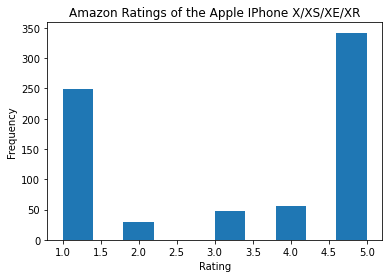

In [14]:
#Graph 1: Histogram for ratings
plt.hist(apple_reviews['Rating'])
plt.title("Amazon Ratings of the Apple IPhone X/XS/XE/XR")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot:title={'center':'Amazon Verified Count'}, xlabel='Verified', ylabel='count'>

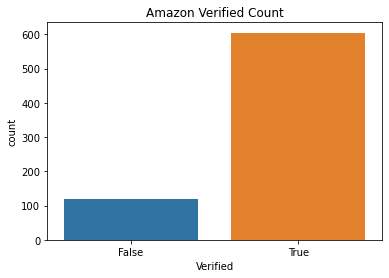

In [15]:
#Graph 2: Histogram for ratings
plt.title('Amazon Verified Count')
sns.countplot(x="Verified", data=apple_reviews)

<AxesSubplot:title={'center':'Amazon Phone Review by Count'}, xlabel='Item #', ylabel='count'>

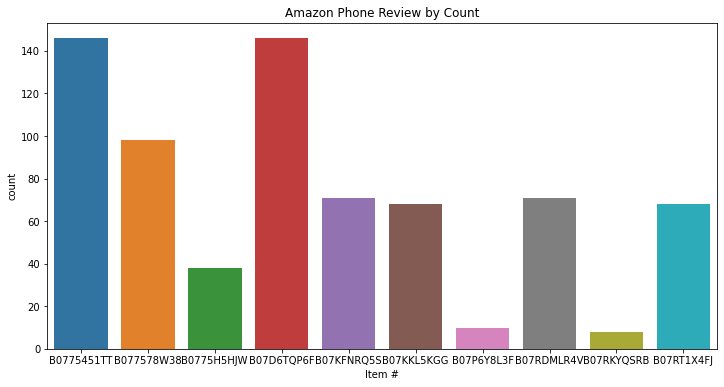

In [16]:
#Graph 3: Item # Count Plot
plt.figure(figsize=(12, 6)) #adjusting the size so it's easily seen.
plt.title('Amazon Phone Review by Count')
sns.countplot(x="Item #", data=apple_reviews)

<AxesSubplot:title={'center':'Amazon Phone Ratings by Count'}, xlabel='Item #', ylabel='Rating'>

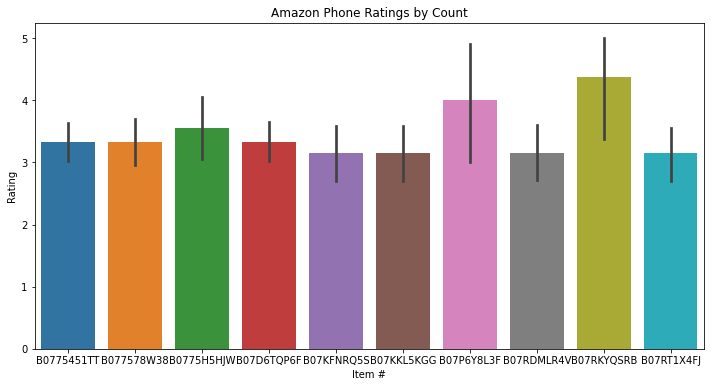

In [17]:
#Graph 4: Item # Count Plot
plt.figure(figsize=(12, 6)) #adjusting the size so it's easily seen.
plt.title('Amazon Phone Ratings by Count')
sns.barplot(x="Item #",y='Rating', data=apple_reviews)

### Completion of Milestone-1

## Title: DSC550 Final: Milestone2

Mainly I cleaned the unwanted from the data freames. There are a quite a number of unwanted columns from the original dataset. The columns being dropped are: image url, the url to the review, the price purchased, the name of the reviewer and other review from a duplicate rating, because they are not really required for sentiment analysis.

In addition, I have removed the brand and reviews category because the brand is the same for all rows, and the reviews doesn't give credence to the credibility of the review.

Post the creation of categorical columns through get_dummies function, any values that are strings or text-based have been deleted because their usefulness have been extracted and dropping these columns would give clarity.

More visualizations have been created such as time series analysis, histograms, correlation maps, and linear regression. Coefficients have also been determined and calculated.

In [18]:
# Load required packages
import datetime
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
import numpy as np
import networkx as nx
import pandas as pd
import re
import scipy
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import string
from textblob import TextBlob
from yellowbrick.features import Rank2D

In [19]:
# Load the dataframe from Milestone 1.
pd.set_option('display.max_colwidth', None)
items = pd.read_csv('items.csv')
reviews = pd.read_csv('reviews.csv')
AP = items['title'].str.lower().str.find('iphone x')!=-1
items_df = items.loc[AP]
apple_reviews = pd.merge(items_df,reviews, on='asin')
apple_reviews = apple_reviews.dropna()
del apple_reviews['image']
del apple_reviews['url']
del apple_reviews['reviewUrl']
del apple_reviews['price']
del apple_reviews['name']
del apple_reviews['rating_x']
apple_reviews.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple_reviews['Date'] = pd.to_datetime(apple_reviews['Date'])
del apple_reviews['Brand']
del apple_reviews['Review Title']
del apple_reviews['Reviews']
del apple_reviews['Helpful']
del apple_reviews['Verified']
apple_reviews.head()

Item #                                                          Model  \
0  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

    Price  Rating       Date  \
0  749.99       1 2018-11-07   
1  749.99       1 2018-11-26   
2  749.99       1 2019-04-20   
3  749.99       1 2019-01-08   
4  749.99       1 2019-04-16   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              The screen was cracked and the phone did not turn in after 24 hours of charging.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               It is not a Refurbished iphone, it is activated  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            I bought this phone and this is my

In [20]:
# Sentiment Analysis:
# change to lower case.
apple_reviews['Review'] = apple_reviews['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
apple_reviews.head()

Item #                                                          Model  \
0  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

    Price  Rating       Date  \
0  749.99       1 2018-11-07   
1  749.99       1 2018-11-26   
2  749.99       1 2019-04-20   
3  749.99       1 2019-01-08   
4  749.99       1 2019-04-16   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              the screen was cracked and the phone did not turn in after 24 hours of charging.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               it is not a refurbished iphone, it is activated  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            i bought this phone and this is my

In [21]:
#Removing punctuation.
apple_reviews['Review'] = apple_reviews['Review'].map(lambda x: re.sub(r'\W+', ' ', x))
apple_reviews.head()

Item #                                                          Model  \
0  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

    Price  Rating       Date  \
0  749.99       1 2018-11-07   
1  749.99       1 2018-11-26   
2  749.99       1 2019-04-20   
3  749.99       1 2019-01-08   
4  749.99       1 2019-04-16   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            the screen was cracked and the phone did not turn in after 24 hours of charging   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              it is not a refurbished iphone it is activated  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           i bought this phone and this is my first picture with the back camera and also when im tapping look like multitouch there is any possibility to change the phone   
3    

In [22]:
#Removing stop words.
stop = stopwords.words('english') #stop words = English.
apple_reviews['Review'] = apple_reviews['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
apple_reviews.head()

Item #                                                          Model  \
0  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

    Price  Rating       Date  \
0  749.99       1 2018-11-07   
1  749.99       1 2018-11-26   
2  749.99       1 2019-04-20   
3  749.99       1 2019-01-08   
4  749.99       1 2019-04-16   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          screen cracked phone turn 24 hours charging  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         refurbished iphone activated  
2                                                                                                                                                                                                                                                                                                                                                                                                                                 bought phone first picture back camera also im tapping look like multitouch possibility change phone  
3                                                                                                                                                                                                                                                                                                                                                                               product falsely labeled unlocked 4 weeks since informed phone still locked get excuses plus phone came really bad condition many scratches see clearly  
4  purchased refurbished iphone x arrived time came clean charger excited phone phone stolen 3 months ago got job saved able afford new one tried set service total wireless phone kept repeating message sim card compatible bought another sim card service plan mobile got thing went apple next day try see anything wrong phone turns nothing wrong phone phone already another service plan even payed wasting 10 hours time spending 60 besides 690 phone price trying set stupid phone service plan would review 0 stars could

In [23]:
#Word tokenizing
apple_reviews['Review'] = apple_reviews['Review'].apply(word_tokenize) 
apple_reviews.head()

Item #                                                          Model  \
0  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

    Price  Rating       Date  \
0  749.99       1 2018-11-07   
1  749.99       1 2018-11-26   
2  749.99       1 2019-04-20   
3  749.99       1 2019-01-08   
4  749.99       1 2019-04-16   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [screen, cracked, phone, turn, 24, hours, charging]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [refurbished, iphone, activated]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [bought, phone, first, picture, back, camera, also, im, tapping, look, like, multitouch, possibility, change, phone]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                             [product, falsely, labeled, unlocked, 4, weeks, since, informed, phone, still, locked, get, excuses, plus, phone, came, really, bad, condition, many, scratches, see, clearly]  
4  [purchased, refurbished, iphone, x, arrived, time, came, clean, charger, excited, phone, phone, stolen, 3, months, ago, got, job, saved, able, afford, new, one, tried, set, service, total, wireless, phone, kept, repeating, message, sim, card, compatible, bought, another, sim, card, service, pla

In [24]:
#word stemming
stemmer = PorterStemmer()
apple_reviews['Review'] = apple_reviews['Review'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))
apple_reviews.head()

Item #                                                          Model  \
0  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
1  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
2  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
4  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

    Price  Rating       Date  \
0  749.99       1 2018-11-07   
1  749.99       1 2018-11-26   
2  749.99       1 2019-04-20   
3  749.99       1 2019-01-08   
4  749.99       1 2019-04-16   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Review  
0                                                                                                                                                                                                                                                                                                                                                                                                                                          screen crack phone turn 24 hour charg  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                          refurbish iphon activ  
2                                                                                                                                                                                                                                                                                                                                                                                     bought phone first pictur back camera also im tap look like multitouch possibl chang phone  
3                                                                                                                                                                                                                                                                                                                                              product fals label unlock 4 week sinc inform phone still lock get excus plu phone came realli bad condit mani scratch see clearli  
4  purchas refurbish iphon x arriv time came clean charger excit phone phone stolen 3 month ago got job save abl afford new one tri set servic total wireless phone kept repeat messag sim card compat bought anoth sim card servic plan mobil got thing went appl next day tri see anyth wrong phone turn noth wrong phone phone alreadi anoth servic plan even pay wast 10 hour time spend 60 besid 690 phone price tri set stupid phone servic plan would review 0 star could

In [25]:
#List of keywords people would use to review.
Battery = ["battery", 'charge', 'juice', 'charging', 'talk time', 'hours', 'minutes', 'life', 'lasts']
Camera = ["camera", 'pixels', 'megapixels', 'pictures', 'video', 'facial', 'recognition', 'animoji', 'zoom', 'dual',
          'optical', 'front', 'rear', 'back', 'lens']
Speed = ['speed', 'fast', 'slow', 'quick', 'lag', 'ram']
Storage = ["storage", 'space', 'room', 'memory', 'gb', 'capacity', 'expandable']
Software = ["software", 'itunes', 'app store', 'app', 'ios', 'animoji', 'game', 'siri', 'touch screen']
Music = ["music", 'audio', 'song', 'sound', 'speaker']
Screen = ["screen", 'oled', 'led', 'lcd', 'scratch', 'widescreen', 'backlit', 'display', 'retina', 'glass', 'inch',
          'resolution', 'break', 'unbreakable', 'shatter', 'chip']

In [26]:
#Searching all rows for items in the lists.
batt = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Battery))]
came = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Camera))]
spee = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Speed))]
stor = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Storage))]
soft = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Software))]
musi = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Music))]
scre = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Screen))]

In [27]:
#Defining the sentiment analysis function
def ss(x):
    return TextBlob(x).sentiment 

In [28]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
batt['Score'] = batt['Review'].apply(ss)
batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
batt['Topic'] = 'Battery'
batt.head()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1898463897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batt['Score'] = batt['Review'].apply(ss)
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1898463897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1898463897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Item #                                                          Model  \
4   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
5   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
8   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
17  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
19  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

     Price  Rating       Date  \
4   749.99       1 2019-04-16   
5   749.99       5 2018-12-12   
8   749.99       1 2019-04-08   
17  749.99       2 2019-01-02   
19  749.99       5 2019-11-08   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Review  \
4                                                                                                                                                                 purchas refurbish iphon x arriv time came clean charger excit phone phone stolen 3 month ago got job save abl afford new one tri set servic total wireless phone kept repeat messag sim card compat bought anoth sim card servic plan mobil got thing went appl next day tri see anyth wrong phone turn noth wrong phone phone alreadi anoth servic plan even pay wast 10 hour time spend 60 besid 690 phone price tri set stupid phone servic plan would review 0 star could   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           love new phone look work everyth work batteri life 94 good glad purchas definit recommend buy skeptic buy product definit worth buy look good phone   
8                                                                                                                                                                                                                                                                                                                                              phone report stolen shut att seller scammer buy straight box phone lot scratch screen back phone pretti disappoint knew phone come discount basic alreadi readi screen replac phone super glitchi even sign wifi next screen also come origin box headphon one market cheap phone charger includ   
17                                                                                                                                                                                                                                                                                                                                                                                                                                  got phone came sketchi box charger paper funki wrap around got bare charg charg setup got halfway threw set turn black said hot function defiantli hot disappoint set nice phone get repetit problem refund   
19  phone sever day everyth function perfectli camera batteri life speaker face recognit etc look brand new read sever review mention turn camera click problem issu get set servic provid 

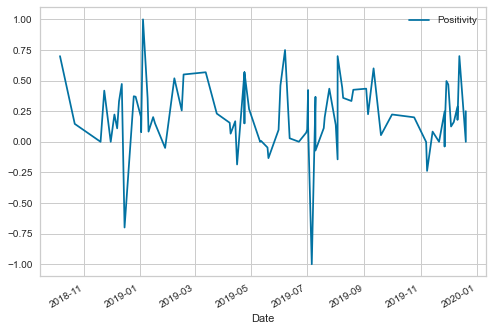

In [29]:
#Time series
batt_ts = batt.plot(x='Date', y='Positivity')

In [30]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(batt['Rating'],batt['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.30711426082030036
Probability is:
0.0002910619926631075


<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

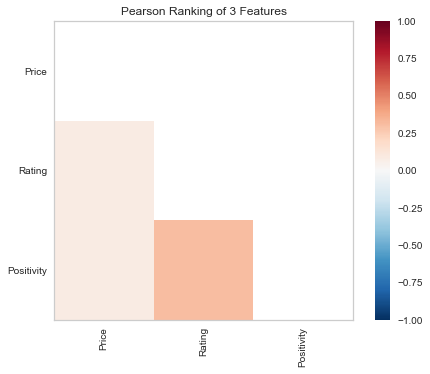

In [32]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = batt[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/Jagadeesh/Desktop/SAI_MS/SAI_550/week-12/batt.png") # Draw/show/poof the data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/40087000.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


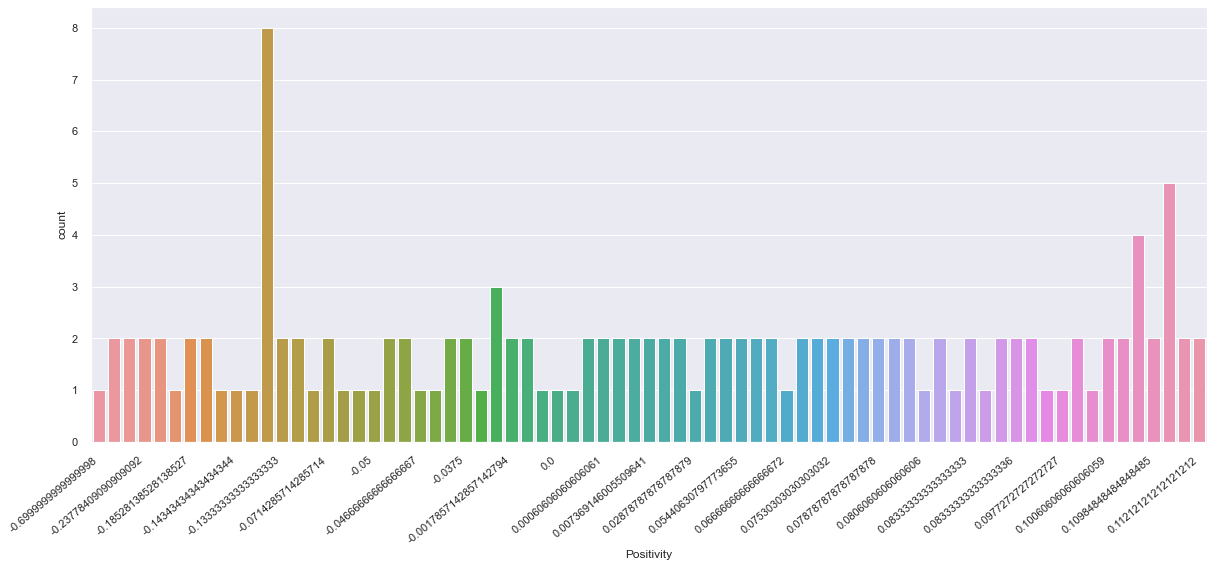

In [33]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(batt['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [34]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
came['Score'] = came['Review'].apply(ss)
came['Positivity'] = came['Score'].apply(lambda x:x[0])
came['Topic'] = 'Camera'
came.head()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/2628013651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  came['Score'] = came['Review'].apply(ss)
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/2628013651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  came['Positivity'] = came['Score'].apply(lambda x:x[0])
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/2628013651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Item #                                                          Model  \
2   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
8   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
19  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
20  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
24  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

     Price  Rating       Date  \
2   749.99       1 2019-04-20   
8   749.99       1 2019-04-08   
19  749.99       5 2019-11-08   
20  749.99       3 2019-07-25   
24  749.99       1 2019-06-19   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Review  \
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   bought phone first pictur back camera also im tap look like multitouch possibl chang phone   
8                                                                                                                                                                                                                                                                                                                                                                                                             phone report stolen shut att seller scammer buy straight box phone lot scratch screen back phone pretti disappoint knew phone come discount basic alreadi readi screen replac phone super glitchi even sign wifi next screen also come origin box headphon one market cheap phone charger includ   
19                                                                 phone sever day everyth function perfectli camera batteri life speaker face recognit etc look brand new read sever review mention turn camera click problem issu get set servic provid sprint consid buy phone base review consid thing hundr dollar cheaper buy one new amazon return servic impecc worst come worst return get anoth one also consid fact averag roughli 10 peopl even bother write amazon review major peopl leav 1 star review probabl written review everyth check like phone almost forgot write review consid fact major review gave phone 5 star begin see interest save money excel rout like go much better money   
20  phone arriv right time great condit charger includ work great howev think phone must korea japan appar illeg take digit photo without audibl shutter click absolut way turn sound even phone mute volum turn way happen everi major applic use camera art student take ton pictur camera primari reason got iphon x took multipl store told either return phone jailbreak rewrit line code affect featur jailbreak void warranti servic appl offer return big hiccup work around take pictur wed librari quiet set ideal make sure countri origin taken consider sell someon p

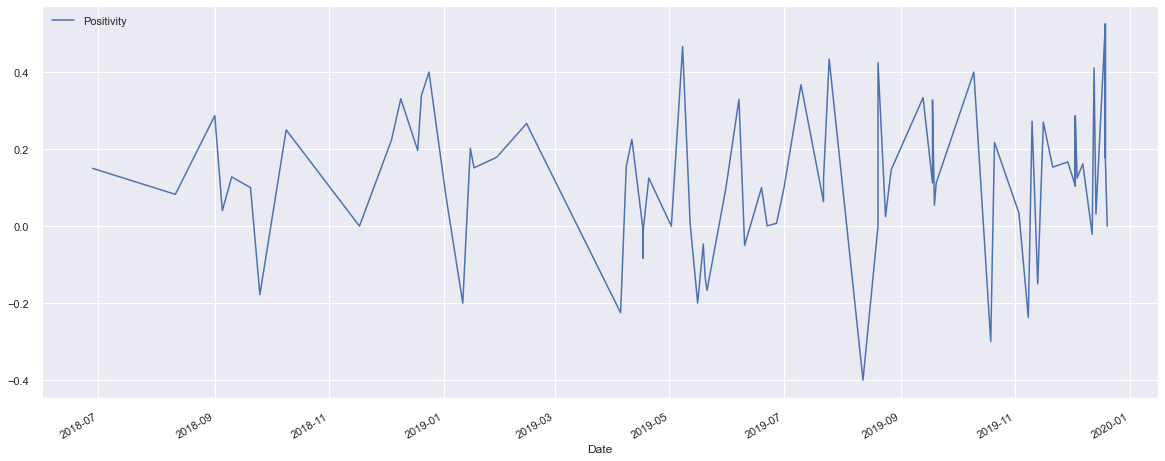

In [35]:
#Time series.
came_ts = came.plot(x='Date', y='Positivity')

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

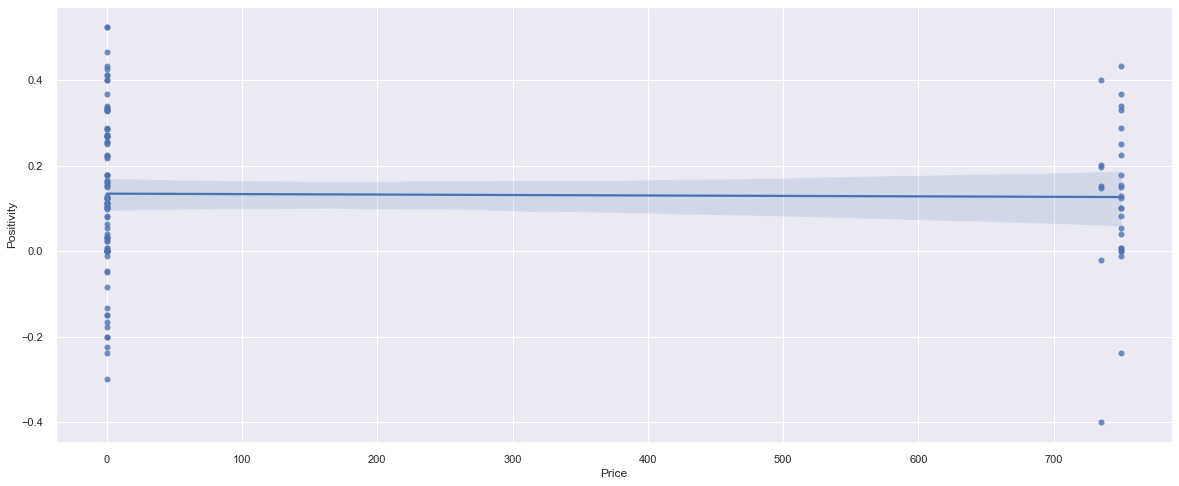

In [36]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=came)

<AxesSubplot:xlabel='Rating', ylabel='Positivity'>

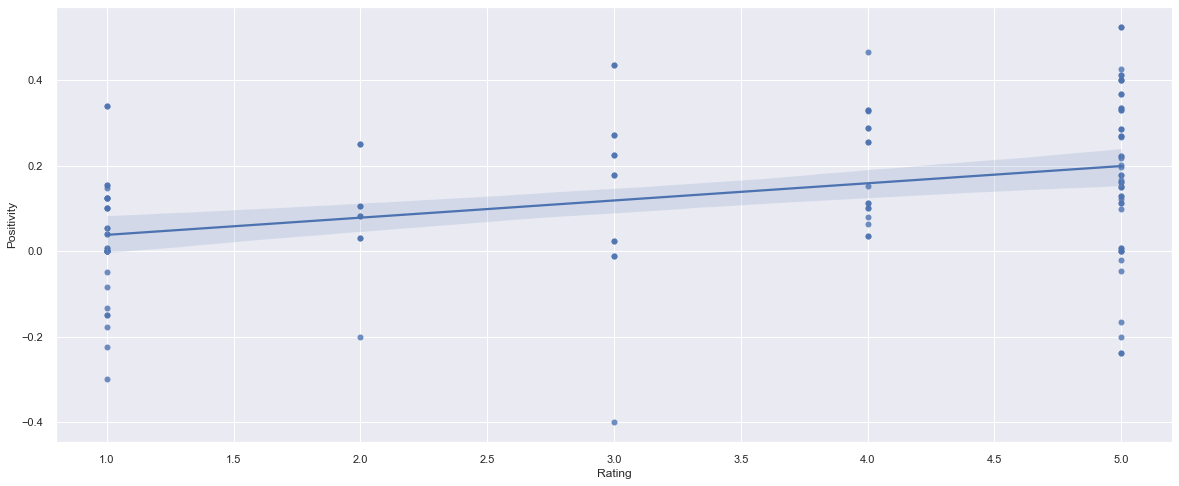

In [37]:
#Linear regression
sns.regplot(x='Rating',y="Positivity",data=came)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/2085259298.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


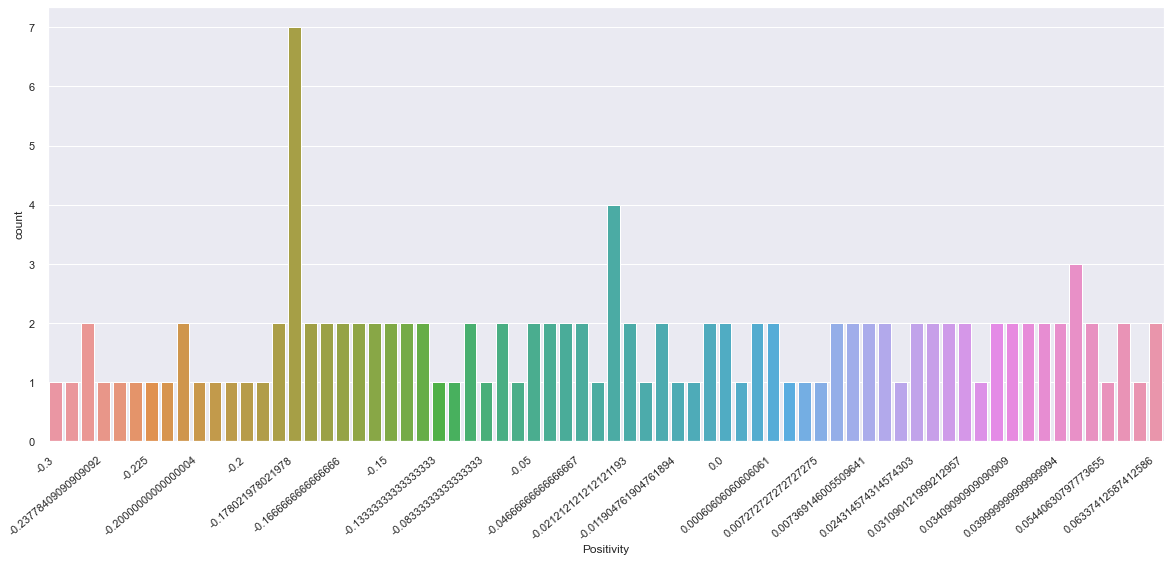

In [38]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(came['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

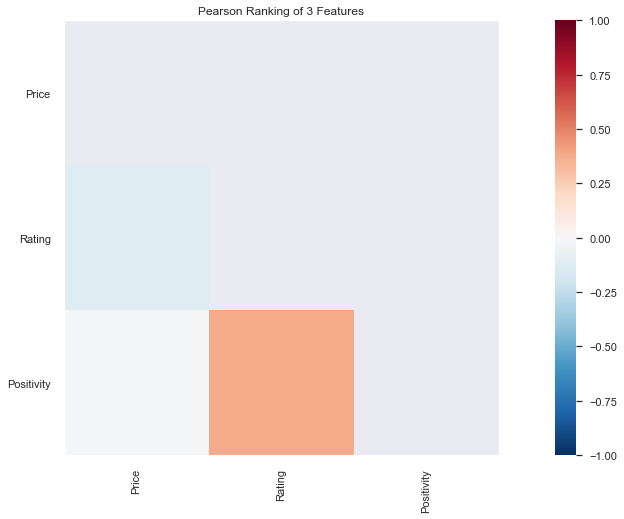

In [39]:
num_features = ['Price', 'Rating', 'Positivity']
X = came[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/Jagadeesh/Desktop/SAI_MS/SAI_550/week-12/came.png") # Draw/show/poof the data

In [40]:
#R2 info.
r, p = scipy.stats.pearsonr(came['Rating'],came['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)


R is: 
0.3750723395047132
Probability is:
2.433731176041164e-05


In [41]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
spee['Score'] = spee['Review'].apply(ss)
spee['Positivity'] = spee['Score'].apply(lambda x:x[0])
spee['Topic'] = 'Speed'
spee.head()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1344785708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spee['Score'] = spee['Review'].apply(ss)
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1344785708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spee['Positivity'] = spee['Score'].apply(lambda x:x[0])
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1344785708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Item #                                                          Model  \
7   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
22  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
23  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
24  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
25  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

     Price  Rating       Date  \
7   749.99       5 2018-10-23   
22  749.99       5 2019-01-09   
23  749.99       5 2019-07-02   
24  749.99       1 2019-06-19   
25  749.99       1 2019-09-19   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Review  \
7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         phone basic new everyth work scratch anyth fast deliveri satisfi   
22                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

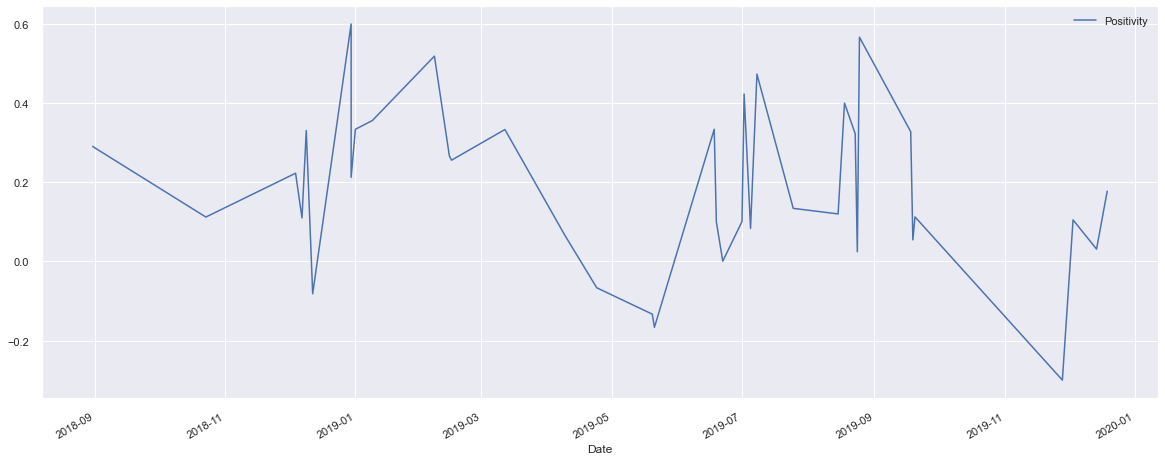

In [42]:
#Time series.
spee_ts = spee.plot(x='Date', y='Positivity')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/40087000.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


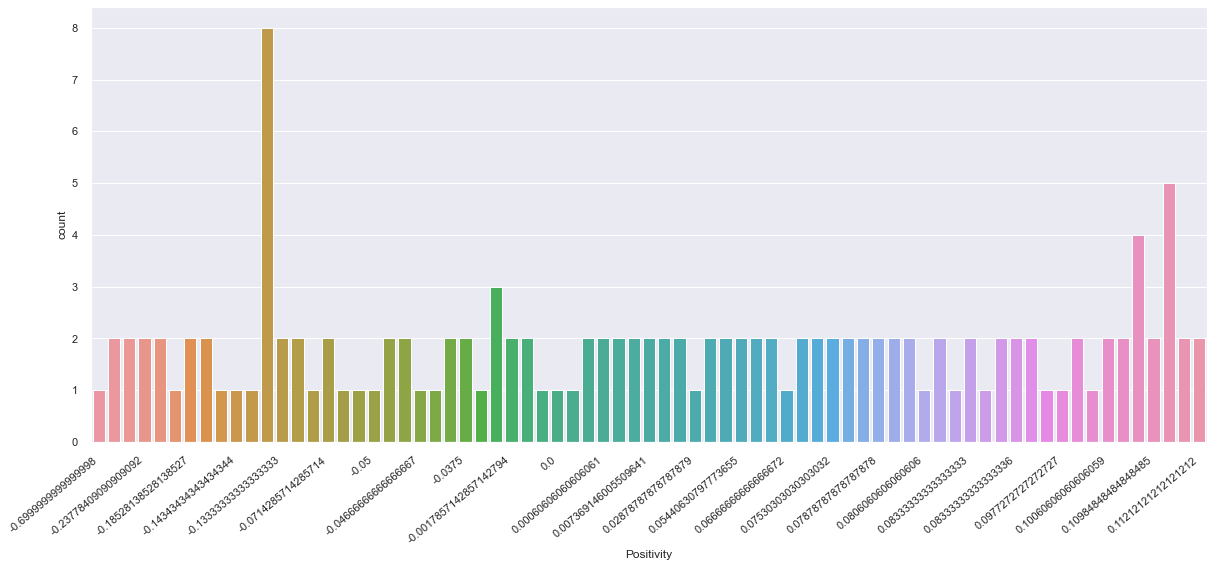

In [43]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(batt['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

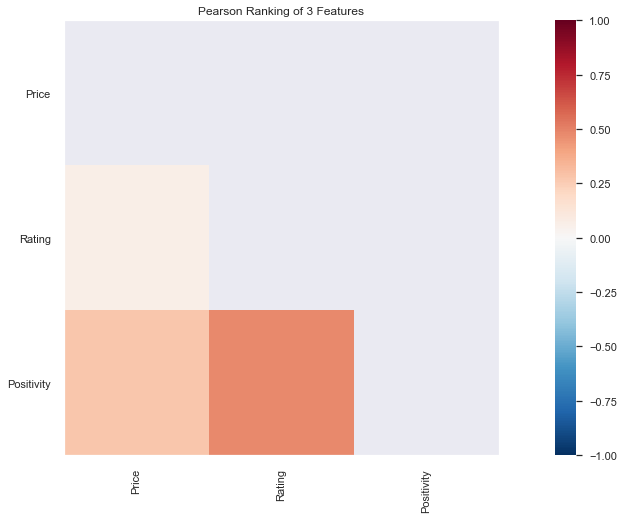

In [45]:
#Correlation map.
num_features = ['Price', 'Rating', 'Positivity']
X = spee[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/Jagadeesh/Desktop/SAI_MS/SAI_550/week-12/spee.png") # Draw/show/poof the data

In [46]:
#R2 info
r, p = scipy.stats.pearsonr(spee['Rating'],spee['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.4796129613379614
Probability is:
4.609315423501099e-05


In [47]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
stor['Score'] = stor['Review'].apply(ss)
stor['Positivity'] = stor['Score'].apply(lambda x:x[0])
stor['Topic'] = 'Storage'
stor.head()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/3312934627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stor['Score'] = stor['Review'].apply(ss)
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/3312934627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stor['Positivity'] = stor['Score'].apply(lambda x:x[0])
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/3312934627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Item #  \
55   B0775451TT   
77   B0775451TT   
90   B0775451TT   
274  B0775451TT   
291  B0775451TT   

                                                             Model   Price  \
55   Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
77   Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
90   Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
274  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
291  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   

     Rating       Date  \
55        5 2019-06-13   
77        4 2019-12-11   
90        5 2019-04-23   
274       5 2018-09-21   
291       1 2019-01-06   

                                                                                                                                                                                                                                               Review  \
55   love took 3 day get phone perfect condit almost brand new come screen protector like refurbish phone worri bought one came half way charg great regard setup speaker work receiv correct phone 256gb fulli unlock amaz phone definit worth price   
77                                              order 256 gb product came minor scuff side phone easili cover cheap case imei clean slid sim card old iphon get signal batteri life 85 solid 8 10 qualiti well worth discount buy new updat issu aris   
90                                                              phone look act like new sinc day one definit risk buy someth expens refurbish absolut work time refurbish phone come like highli recommend take advantag 400 differ new iphon x 265gb   
274                                                                                                                                                            pleas iphon x 256 gb great price great condit work great sim card phone like brand new   
291                                                                                                                                                                                           review say 64 gb 256 gb price fake 64 gb 660 256 gb 790   

                                          Score  Positivity    Topic  
55     (0.4282828282828282, 0.5118686868686869)    0.428283  Storage  
77     (0.179004329004329, 0.35064935064935066)    0.179004  Storage  
90   (0.13636363636363635, 0.45454545454545453)    0.136364  Storage  
274    (0.6340909090909091, 0.6761363636363636)    0.634091  Storage  
291                                 (-0.5, 1.0)   -0.500000  Storage

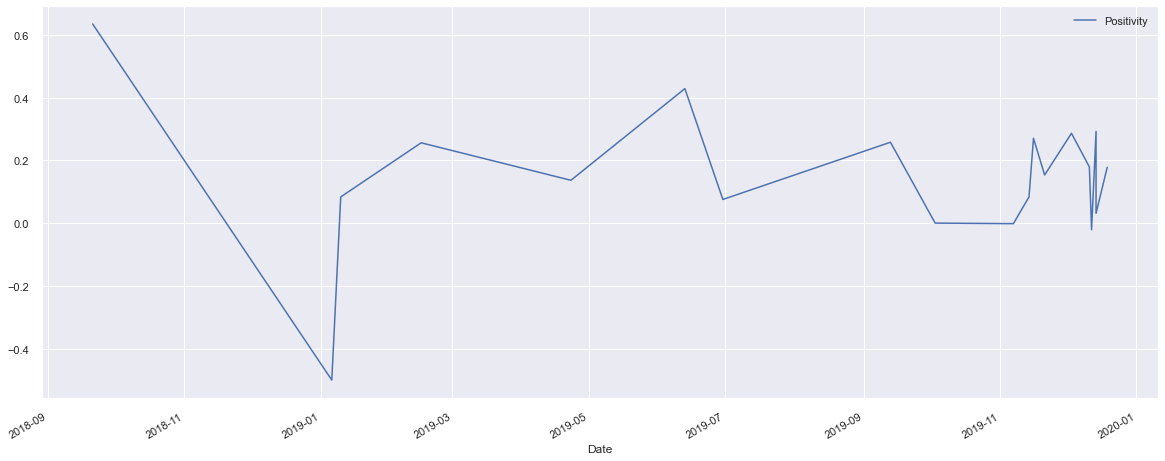

In [48]:
#Time series
stor_ts = stor.plot(x='Date', y='Positivity')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1286771051.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


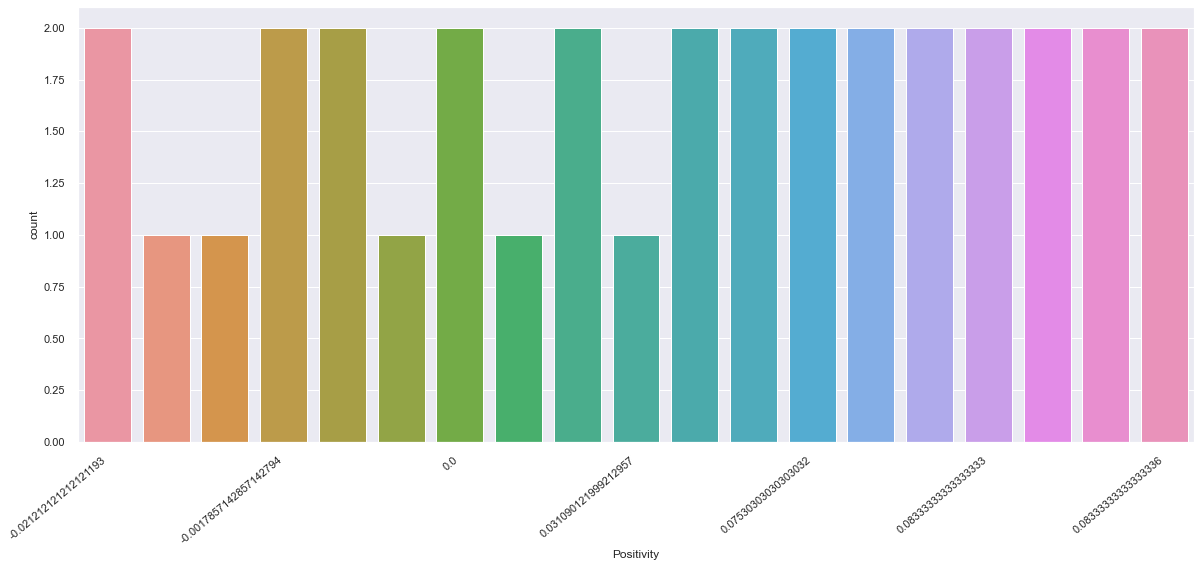

In [49]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(stor['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

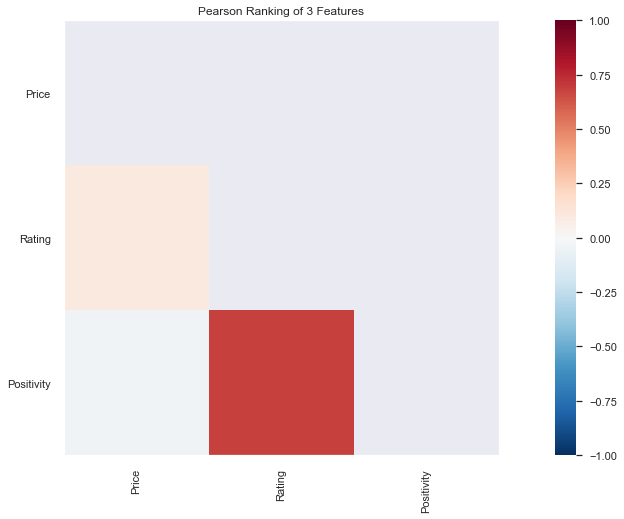

In [50]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = stor[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/Jagadeesh/Desktop/SAI_MS/SAI_550/week-12/stor.png") # Draw/show/poof the data

In [51]:
#R2 info
r, p = scipy.stats.pearsonr(stor['Rating'],stor['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.6868928796477125
Probability is:
1.0121695716791762e-05


In [52]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
soft['Score'] = soft['Review'].apply(ss)
soft['Positivity'] = soft['Score'].apply(lambda x:x[0])
soft['Topic'] = 'Software'
soft.head()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/3954275882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soft['Score'] = soft['Review'].apply(ss)
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/3954275882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soft['Positivity'] = soft['Score'].apply(lambda x:x[0])
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/3954275882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Item #                                                          Model  \
4   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
6   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
8   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
16  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
17  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

     Price  Rating       Date  \
4   749.99       1 2019-04-16   
6   749.99       5 2018-12-31   
8   749.99       1 2019-04-08   
16  749.99       1 2018-12-15   
17  749.99       2 2019-01-02   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Review  \
4   purchas refurbish iphon x arriv time came clean charger excit phone phone stolen 3 month ago got job save abl afford new one tri set servic total wireless phone kept repeat messag sim card compat bought anoth sim card servic plan mobil got thing went appl next day tri see anyth wrong phone turn noth wrong phone phone alreadi anoth servic plan even pay wast 10 hour time spend 60 besid 690 phone price tri set stupid phone servic plan would review 0 star could   
6                                                                                                                                                                                          soy de costa rica compr el x de 256 la verdad estaba algo nervioso por ser reconstruido pero lo recibo un dia ant de lo previsto considero que est es el mejor negocio que se pued hacer la bateria esta al 100 pantalla intacta funciona de maravilla es como comprarlo nuevo de appl   
8                                                                                                                                                                                phone report stolen shut att seller scammer buy straight box phone lot scratch screen back phone pretti disappoint knew phone come discount basic alreadi readi screen replac phone super glitchi even sign wifi next screen also come origin box headphon one market cheap phone charger includ   
16                                                                                                                                                                                                                                                                                                 screen iphon lot scratch remov screen protector seller put found poor state screen refurbish mean product renew screen without scratch would much appreci given high price tag   
17                                                                                                                                                                                                                                                                    got phone came sketchi box charger paper funki wrap around got bare charg charg setup got halfway threw set turn black said hot function defiantli hot disappoint set nice phone get repetit problem refund   

                                         Score  Positivity     Topic  
4   (-0.18528138528138527, 0.6720779220779222)   -0.185281  Software  
6                                   (0.0, 0.0)    0.000000  Software  
8   (0.15555555555555556, 0.31527777777777777)    0.155556  Software  
16            (-0.08812499999999998, 0.506875)   -0.088125  Software  
17   (0.19666666666666668, 0.6466666666666667)    0.196667  Software

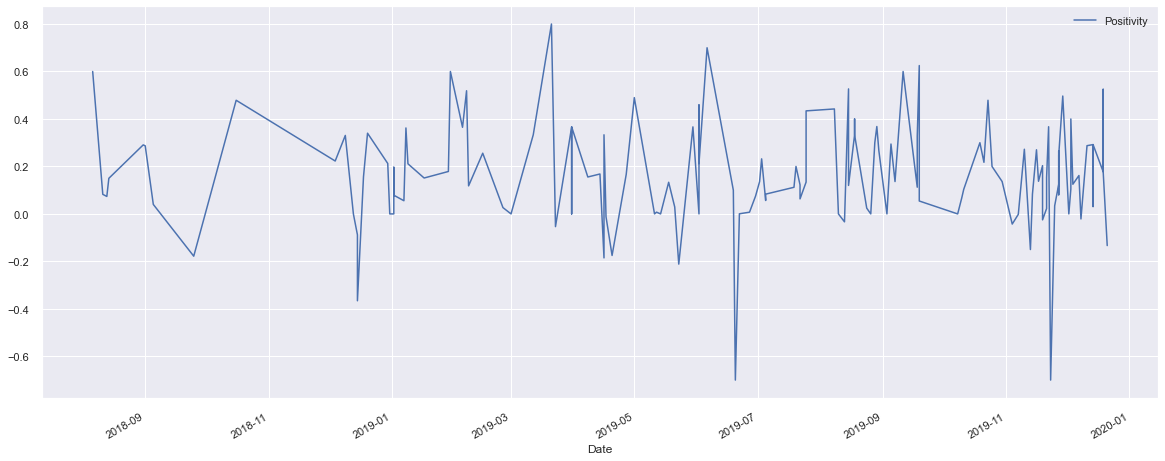

In [53]:
#Time series
soft_ts = soft.plot(x='Date', y='Positivity')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1209118829.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


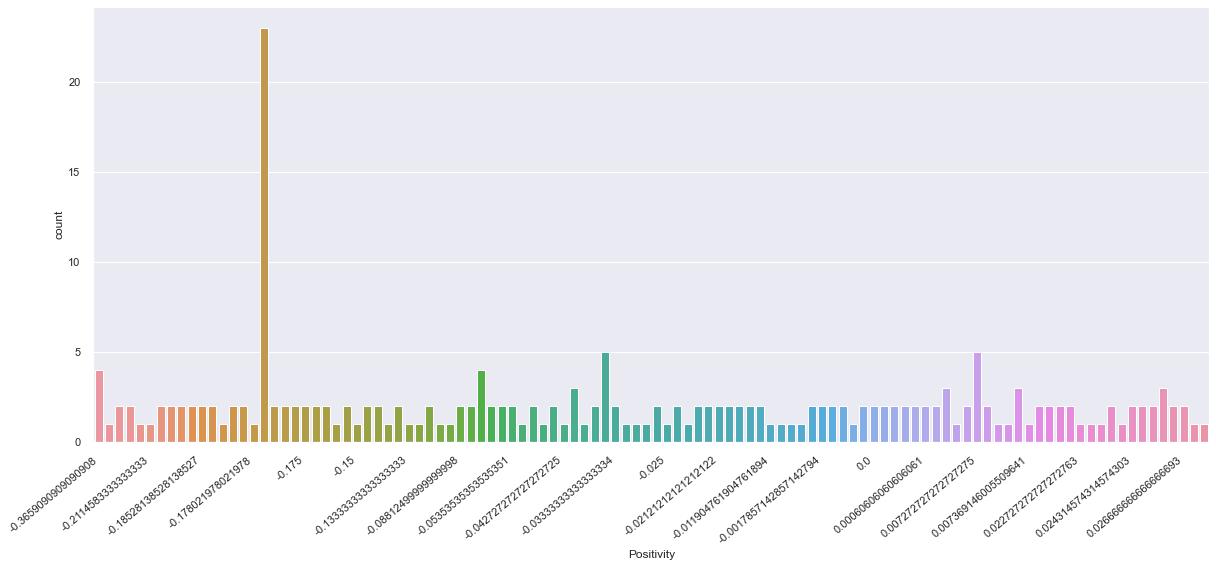

In [54]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(soft['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

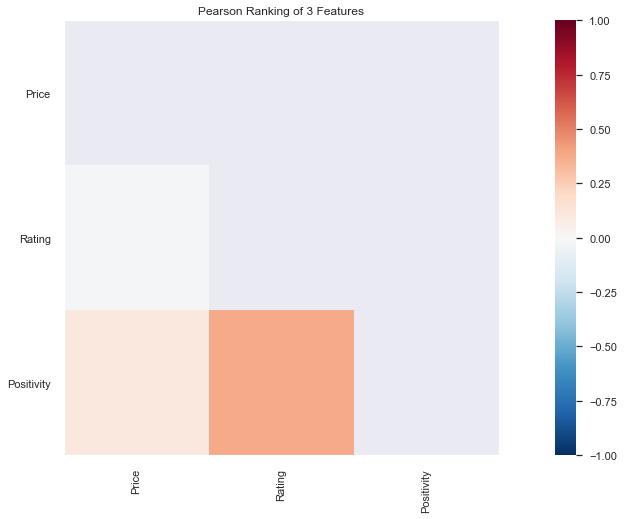

In [55]:
num_features = ['Price', 'Rating', 'Positivity']
X = soft[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/Jagadeesh/Desktop/SAI_MS/SAI_550/week-12/soft.png") # Draw/show/poof the data

In [56]:
#R2 info
r, p = scipy.stats.pearsonr(soft['Rating'],soft['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.3773781371440641
Probability is:
1.1043466015637111e-08


In [57]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
musi['Score'] = musi['Review'].apply(ss)
musi['Positivity'] = musi['Score'].apply(lambda x:x[0])
musi['Topic'] = 'Music'
musi.head()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/990020117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musi['Score'] = musi['Review'].apply(ss)
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/990020117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  musi['Positivity'] = musi['Score'].apply(lambda x:x[0])
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/990020117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

Item #                                                          Model  \
19  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
20  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
35  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
45  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
55  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

     Price  Rating       Date  \
19  749.99       5 2019-11-08   
20  749.99       3 2019-07-25   
35  749.99       2 2018-10-09   
45  749.99       5 2019-08-08   
55  749.99       5 2019-06-13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Review  \
19                                                                 phone sever day everyth function perfectli camera batteri life speaker face recognit etc look brand new read sever review mention turn camera click problem issu get set servic provid sprint consid buy phone base review consid thing hundr dollar cheaper buy one new amazon return servic impecc worst come worst return get anoth one also consid fact averag roughli 10 peopl even bother write amazon review major peopl leav 1 star review probabl written review everyth check like phone almost forgot write review consid fact major review gave phone 5 star begin see interest save money excel rout like go much better money   
20  phone arriv right time great condit charger includ work great howev think phone must korea japan appar illeg take digit photo without audibl shutter click absolut way turn sound even phone mute volum turn way happen everi major applic use camera art student take ton pictur camera primari reason got iphon x took multipl store told either return phone jailbreak rewrit line code affect featur jailbreak void warranti servic appl offer return big hiccup work around take pictur wed librari quiet set ideal make sure countri origin taken consider sell someon product go major featur differ tldr nice phone great condit good price came time particular phone unus anyon like take pictur   
35                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            get hot listen music watch video   
45                                                                                                                                                                                                                                                                                                  incred satisfi phone came perfect condit 80 batteri life upon arriv phone sync devic smoothli sim card immedi work put phone came scratch look brand new think worth photo great storag 64g like order came adapt phone charger siim tray eject updat two day later found coul

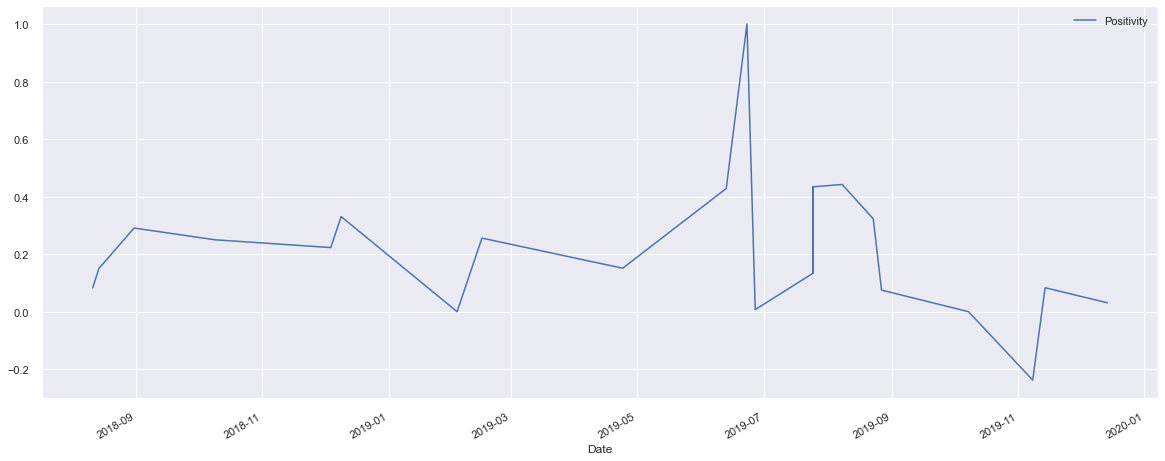

In [58]:
#Time series
musi_ts = musi.plot(x='Date', y='Positivity')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/2386641243.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


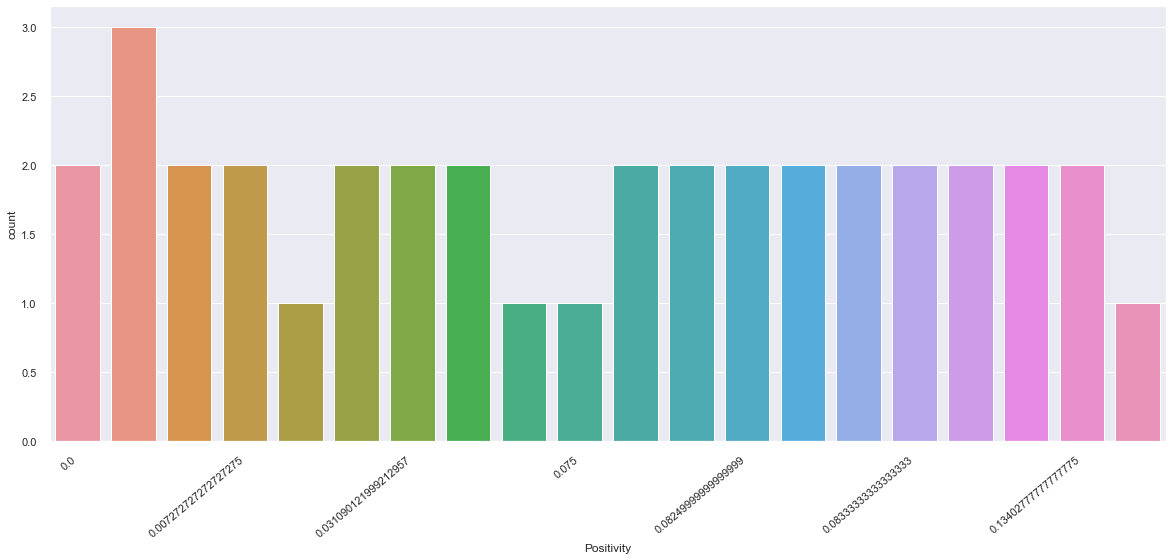

In [59]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(musi['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

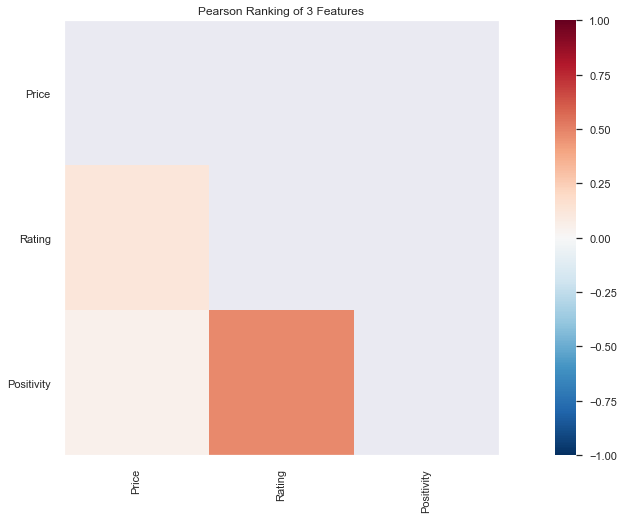

In [60]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = musi[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/Jagadeesh/Desktop/SAI_MS/SAI_550/week-12/musi.png") # Draw/show/poof the data

In [61]:
#R2 info
r, p = scipy.stats.pearsonr(musi['Rating'],musi['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.4769872999917155
Probability is:
0.0028365759129784706


In [62]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
scre['Score'] = scre['Review'].apply(ss)
scre['Positivity'] = scre['Score'].apply(lambda x:x[0])
scre['Topic'] = 'Screen'
scre.head()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/4204929618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scre['Score'] = scre['Review'].apply(ss)
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/4204929618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scre['Positivity'] = scre['Score'].apply(lambda x:x[0])
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/4204929618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Item #                                                          Model  \
0   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
3   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
7   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
8   B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   
14  B0775451TT  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

     Price  Rating       Date  \
0   749.99       1 2018-11-07   
3   749.99       1 2019-01-08   
7   749.99       5 2018-10-23   
8   749.99       1 2019-04-08   
14  749.99       3 2018-12-08   

                                                                                                                                                                                                                                                                                              Review  \
0                                                                                                                                                                                                                                                              screen crack phone turn 24 hour charg   
3                                                                                                                                                                  product fals label unlock 4 week sinc inform phone still lock get excus plu phone came realli bad condit mani scratch see clearli   
7                                                                                                                                                                                                                                   phone basic new everyth work scratch anyth fast deliveri satisfi   
8   phone report stolen shut att seller scammer buy straight box phone lot scratch screen back phone pretti disappoint knew phone come discount basic alreadi readi screen replac phone super glitchi even sign wifi next screen also come origin box headphon one market cheap phone charger includ   
14                                                                                                                                                                                                        devic support lte plu poor hous box arriv thing work fine breakdown price necessari receiv   

                                         Score  Positivity   Topic  
0                                   (0.0, 0.0)    0.000000  Screen  
3    (-0.6999999999999998, 0.6666666666666666)   -0.700000  Screen  
7   (0.11212121212121212, 0.39318181818181824)    0.112121  Screen  
8   (0.15555555555555556, 0.31527777777777777)    0.155556  Screen  
14                (0.008333333333333331, 0.55)    0.008333  Screen

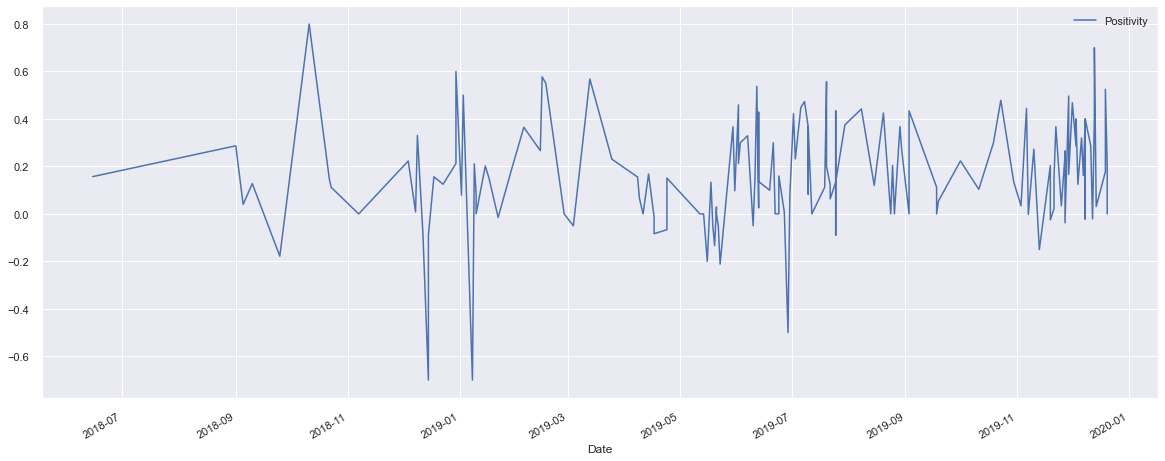

In [63]:
#Time series
scre_ts = scre.plot(x='Date', y='Positivity')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/704352520.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


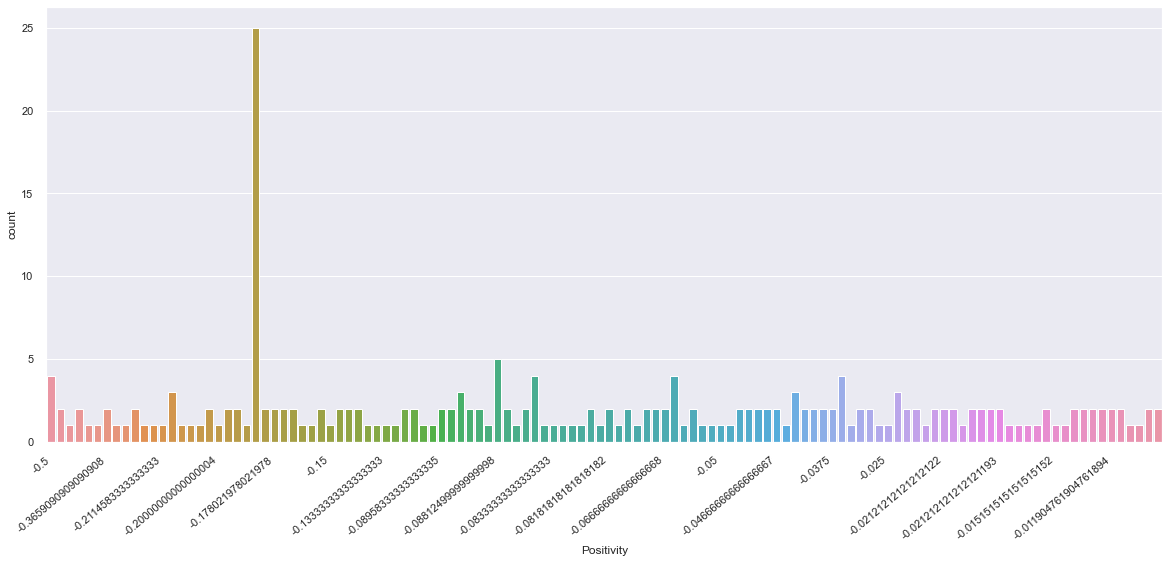

In [64]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(scre['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 6
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

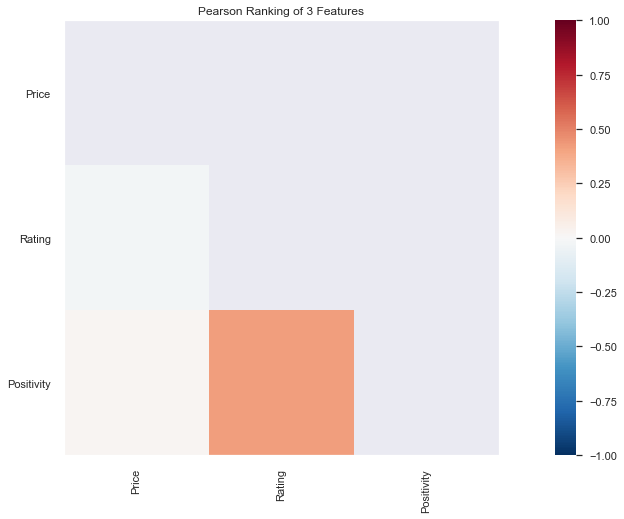

In [65]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = scre[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/Jagadeesh/Desktop/SAI_MS/SAI_550/week-12/scre.png") # Draw/show/poof the data

In [66]:
#R2 info
r, p = scipy.stats.pearsonr(scre['Rating'],scre['Positivity']) #Pearson's R coefficient
print("R is: ")
print(r)
print("Probability is:")
print(p)

R is: 
0.4188954879265039
Probability is:
4.6527993203220594e-11


In [67]:
#Merging the dataframes into one..
a_df = [batt, came, spee, stor, soft, musi, scre]
a_df = pd.concat(a_df, axis=0, join='inner').reset_index()

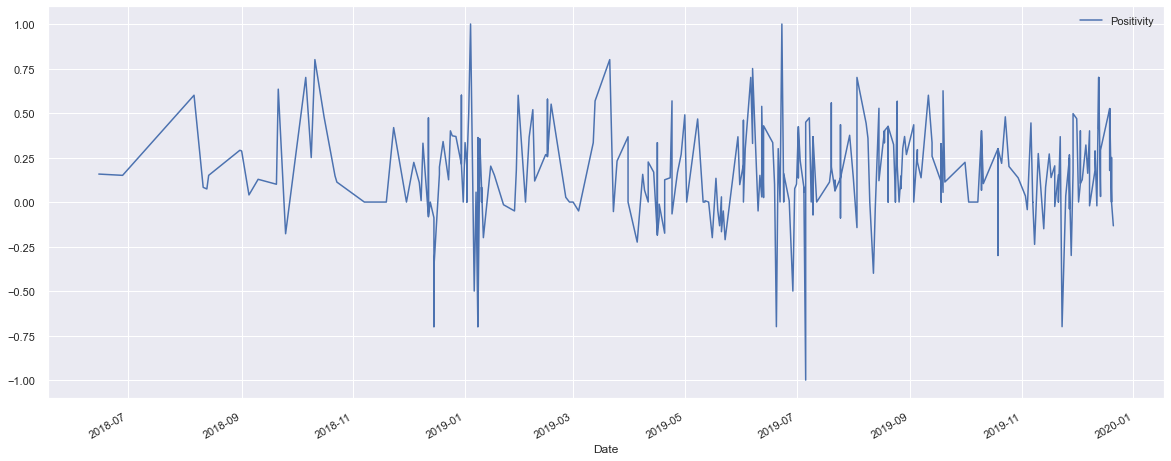

In [50]:
#Time series info
a_df_ts = a_df.plot(x='Date', y='Positivity')

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

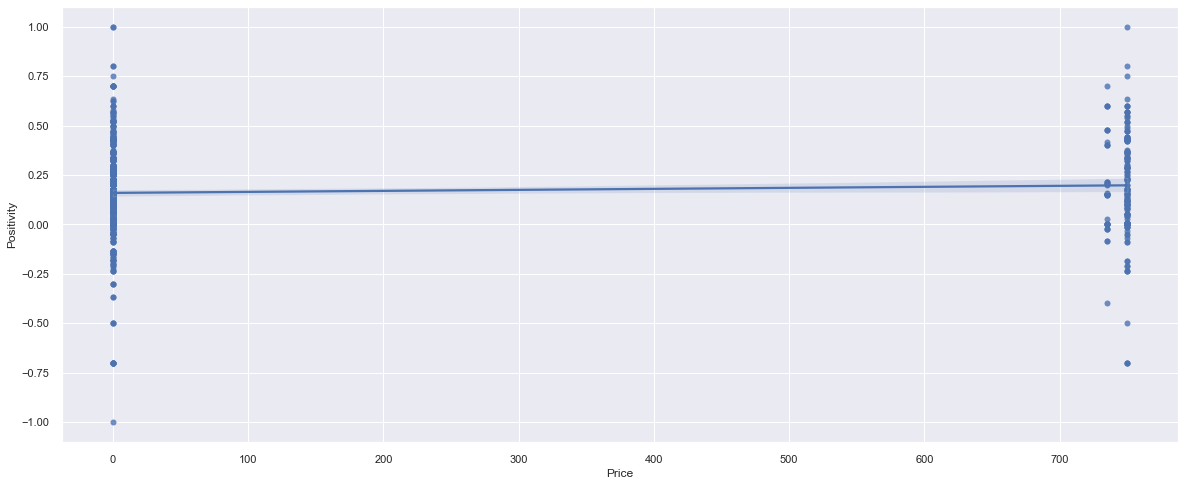

In [68]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=a_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1237994794.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


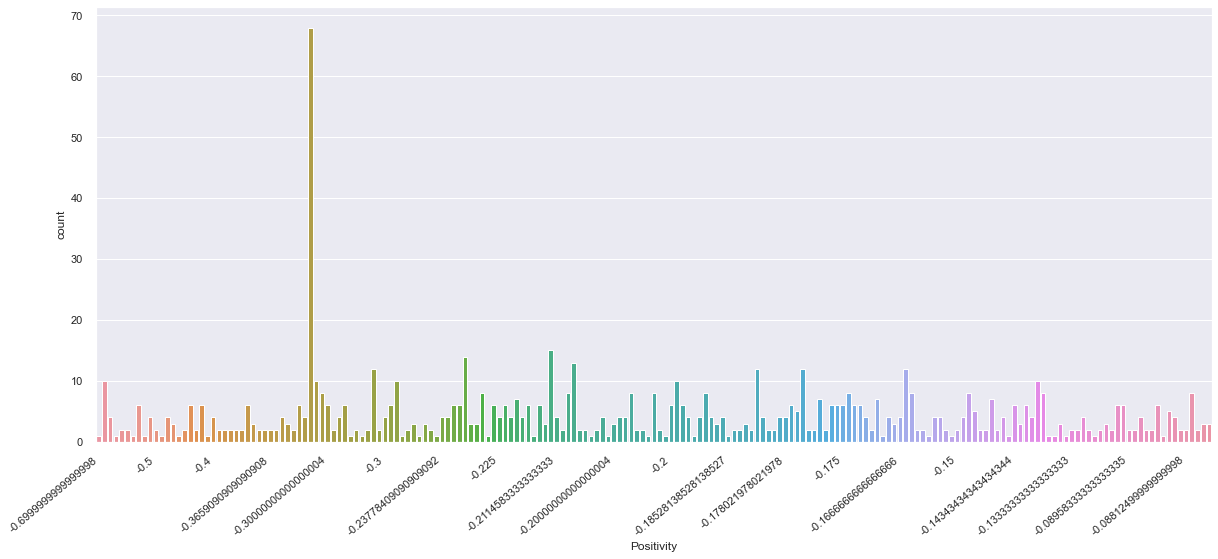

In [69]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(a_df['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

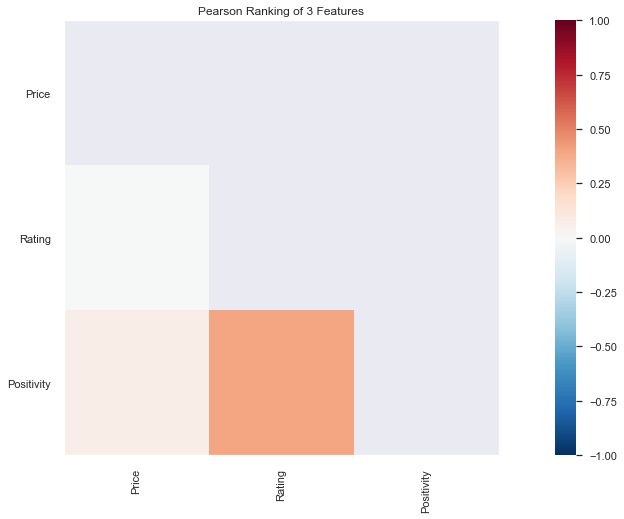

In [70]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity']
X = a_df[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/Users/Jagadeesh/Desktop/SAI_MS/SAI_550/week-12/adf.png") # Draw/show/poof the data

In [71]:
#Get dummies categorical values binary
categorical = ['Topic','Item #']
a_df_cat = pd.get_dummies(a_df[categorical])
a_df_cat.head()

Topic_Battery  Topic_Camera  Topic_Music  Topic_Screen  Topic_Software  \
0              1             0            0             0               0   
1              1             0            0             0               0   
2              1             0            0             0               0   
3              1             0            0             0               0   
4              1             0            0             0               0   

   Topic_Speed  Topic_Storage  Item #_B0775451TT  Item #_B077578W38  \
0            0              0                  1                  0   
1            0              0                  1                  0   
2            0              0                  1                  0   
3            0              0                  1                  0   
4            0              0                  1                  0   

   Item #_B0775H5HJW  Item #_B07D6TQP6F  Item #_B07KFNRQ5S  Item #_B07KKL5KGG  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Item #_B07P6Y8L3F  Item #_B07RDMLR4V  Item #_B07RKYQSRB  Item #_B07RT1X4FJ  
0                  0                  0                  0                  0  
1                  0                  0                  0                  0  
2                  0                  0                  0                  0  
3                  0                  0                  0                  0  
4                  0                  0                  0                  0

In [72]:
#Listing the columns
list(a_df_cat.columns)

['Topic_Battery',
 'Topic_Camera',
 'Topic_Music',
 'Topic_Screen',
 'Topic_Software',
 'Topic_Speed',
 'Topic_Storage',
 'Item #_B0775451TT',
 'Item #_B077578W38',
 'Item #_B0775H5HJW',
 'Item #_B07D6TQP6F',
 'Item #_B07KFNRQ5S',
 'Item #_B07KKL5KGG',
 'Item #_B07P6Y8L3F',
 'Item #_B07RDMLR4V',
 'Item #_B07RKYQSRB',
 'Item #_B07RT1X4FJ']

In [73]:
#Getting the list from columns
a_df[list(a_df_cat.columns)] = a_df_cat[list(a_df_cat.columns)]

In [74]:
#Reviewing the new dataset
a_df.head()

index      Item #  \
0      4  B0775451TT   
1      5  B0775451TT   
2      8  B0775451TT   
3     17  B0775451TT   
4     19  B0775451TT   

                                                           Model   Price  \
0  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
1  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
2  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
3  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   
4  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)  749.99   

   Rating       Date  \
0       1 2019-04-16   
1       5 2018-12-12   
2       1 2019-04-08   
3       2 2019-01-02   
4       5 2019-11-08   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Review  \
0                                                                                                                                                                purchas refurbish iphon x arriv time came clean charger excit phone phone stolen 3 month ago got job save abl afford new one tri set servic total wireless phone kept repeat messag sim card compat bought anoth sim card servic plan mobil got thing went appl next day tri see anyth wrong phone turn noth wrong phone phone alreadi anoth servic plan even pay wast 10 hour time spend 60 besid 690 phone price tri set stupid phone servic plan would review 0 star could   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          love new phone look work everyth work batteri life 94 good glad purchas definit recommend buy skeptic buy product definit worth buy look good phone   
2                                                                                                                                                                                                                                                                                                                                             phone report stolen shut att seller scammer buy straight box phone lot scratch screen back phone pretti disappoint knew phone come discount basic alreadi readi screen replac phone super glitchi even sign wifi next screen also come origin box headphon one market cheap phone charger includ   
3                                                                                                                                                                                                                                                                                                                                                                                                                                  got phone came sketchi box charger paper funki wrap around got bare charg charg setup got halfway threw set turn black said hot function defiantli hot disappoint set nice phone get repetit problem refund   
4  phone sever day everyth function perfectli camera batteri life speaker face recognit etc look brand new read sever review m

In [75]:
#Cleaning the new datasets of columns we no longer need.
del a_df['Item #']
del a_df['Model']
del a_df['Review']
del a_df['Topic']
del a_df['index']
a_df.head()

Price  Rating       Date                                       Score  \
0  749.99       1 2019-04-16  (-0.18528138528138527, 0.6720779220779222)   
1  749.99       5 2018-12-12   (0.47272727272727266, 0.5590909090909091)   
2  749.99       1 2019-04-08  (0.15555555555555556, 0.31527777777777777)   
3  749.99       2 2019-01-02   (0.19666666666666668, 0.6466666666666667)   
4  749.99       5 2019-11-08  (-0.23778409090909092, 0.6761363636363636)   

   Positivity  Topic_Battery  Topic_Camera  Topic_Music  Topic_Screen  \
0   -0.185281              1             0            0             0   
1    0.472727              1             0            0             0   
2    0.155556              1             0            0             0   
3    0.196667              1             0            0             0   
4   -0.237784              1             0            0             0   

   Topic_Software  ...  Item #_B0775451TT  Item #_B077578W38  \
0               0  ...                  1                  0   
1               0  ...                  1                  0   
2               0  ...                  1                  0   
3               0  ...                  1                  0   
4               0  ...                  1                  0   

   Item #_B0775H5HJW  Item #_B07D6TQP6F  Item #_B07KFNRQ5S  Item #_B07KKL5KGG  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Item #_B07P6Y8L3F  Item #_B07RDMLR4V  Item #_B07RKYQSRB  Item #_B07RT1X4FJ  
0                  0                  0                  0                  0  
1                  0                  0                  0                  0  
2                  0                  0                  0                  0  
3                  0                  0                  0                  0  
4                  0                  0                  0                  0  

[5 rows x 22 columns]

In [76]:
#Creating a list and looping through to format.
a_df_list = ['Item #_B0775451TT','Item #_B077578W38','Item #_B0775H5HJW','Item #_B07D6TQP6F','Item #_B07KFNRQ5S',
'Item #_B07KKL5KGG','Item #_B07P6Y8L3F','Item #_B07RDMLR4V','Item #_B07RKYQSRB','Item #_B07RT1X4FJ','Topic_Battery',
'Topic_Camera','Topic_Music','Topic_Screen','Topic_Software','Topic_Speed','Topic_Storage']
for x in a_df_list:
    x = 'a_df["'+x+'"]'

In [77]:
#Creating a linear regression and conerting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[a_df_list], a_df["Positivity"])
coef = regr.coef_.tolist()

In [78]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+y)

Item #_B0775451TT: 0.02701984059421914
Item #_B077578W38: -0.04239732373072482
Item #_B0775H5HJW: 0.022608428302031396
Item #_B07D6TQP6F: 0.027019840594219136
Item #_B07KFNRQ5S: -0.0008782082214486713
Item #_B07KKL5KGG: -0.03558173723917193
Item #_B07P6Y8L3F: -0.049891145592876274
Item #_B07RDMLR4V: -0.000878208221448701
Item #_B07RKYQSRB: 0.08856025075437265
Item #_B07RT1X4FJ: -0.03558173723917191
Topic_Battery: 0.043167610261870035
Topic_Camera: -0.04529190086429303
Topic_Music: 0.027206198412053444
Topic_Screen: -0.009670656185069905
Topic_Software: -0.019496627961484554
Topic_Speed: 0.01782293332554234
Topic_Storage: -0.013737556988618432


In [79]:
LR = LogisticRegression(a_df_list)
LR

LogisticRegression(penalty=['Item #_B0775451TT', 'Item #_B077578W38',
                            'Item #_B0775H5HJW', 'Item #_B07D6TQP6F',
                            'Item #_B07KFNRQ5S', 'Item #_B07KKL5KGG',
                            'Item #_B07P6Y8L3F', 'Item #_B07RDMLR4V',
                            'Item #_B07RKYQSRB', 'Item #_B07RT1X4FJ',
                            'Topic_Battery', 'Topic_Camera', 'Topic_Music',
                            'Topic_Screen', 'Topic_Software', 'Topic_Speed',
                            'Topic_Storage'])

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso
from textblob import TextBlob
import warnings

In [81]:
#Bringing the steps from Milestone1 - loading dataframe, creating new df, dropping columns, renaming columns etc.
pd.set_option('display.max_colwidth', None)

#Load dataframes.
items = pd.read_csv('items.csv')
reviews = pd.read_csv('reviews.csv')

#finding all Apple entries within the first df
AP = items['title'].str.lower().str.find('iphone x')!=-1

#creating a new df based on the search.
items_df = items.loc[AP]

#merging the two dataframes based on  asin#.
apple_reviews = pd.merge(items_df,reviews, on='asin')

#Dropping nan values.
apple_reviews = apple_reviews.dropna()

#Dropping erroneous/unwanted columns.
del apple_reviews['image']
del apple_reviews['url']
del apple_reviews['reviewUrl']
del apple_reviews['price']
del apple_reviews['name']
del apple_reviews['rating_x']

#Renaming columns.
apple_reviews.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple_reviews['Date'] = pd.to_datetime(apple_reviews['Date']) #Reformatting date/time format.




In [82]:
# Bringing steps from Milestone2 
del apple_reviews['Brand']
del apple_reviews['Review Title']
del apple_reviews['Reviews']
del apple_reviews['Helpful']
del apple_reviews['Verified']

# Sentiment Analysis:
# change to lower case.
apple_reviews['Review'] = apple_reviews['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Removing punctuation.
apple_reviews['Review'] = apple_reviews['Review'].map(lambda x: re.sub(r'\W+', ' ', x))

#Removing stop words.
stop = stopwords.words('english') #stop words = English.
apple_reviews['Review'] = apple_reviews['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Word tokenizing
apple_reviews['Review'] = apple_reviews['Review'].apply(word_tokenize) 

#word stemming
stemmer = PorterStemmer()
apple_reviews['Review'] = apple_reviews['Review'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))

#List of keywords people would use to review.
Battery = ["battery", 'charge', 'juice', 'charging', 'talk time', 'hours', 'minutes', 'life', 'lasts']
Camera = ["camera", 'pixels', 'megapixels', 'pictures', 'video', 'facial', 'recognition', 'animoji', 'zoom', 'dual',
          'optical', 'front', 'rear', 'back', 'lens']
Speed = ['speed', 'fast', 'slow', 'quick', 'lag', 'ram']
Storage = ["storage", 'space', 'room', 'memory', 'gb', 'capacity', 'expandable']
Software = ["software", 'itunes', 'app store', 'app', 'ios', 'animoji', 'game', 'siri', 'touch screen']
Music = ["music", 'audio', 'song', 'sound', 'speaker']
Screen = ["screen", 'oled', 'led', 'lcd', 'scratch', 'widescreen', 'backlit', 'display', 'retina', 'glass', 'inch',
          'resolution', 'break', 'unbreakable', 'shatter', 'chip']

#Searching all rows for items in the lists.
batt = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Battery))]
came = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Camera))]
spee = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Speed))]
stor = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Storage))]
soft = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Software))]
musi = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Music))]
scre = apple_reviews[apple_reviews['Review'].str.lower().str.contains('|'.join(Screen))]

#Defining the sentiment analysis function
def ss(x):
    return TextBlob(x).sentiment 

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
batt['Score'] = batt['Review'].apply(ss)
batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
batt['Topic'] = 'Battery'

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
came['Score'] = came['Review'].apply(ss)
came['Positivity'] = came['Score'].apply(lambda x:x[0])
came['Topic'] = 'Camera'

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
spee['Score'] = spee['Review'].apply(ss)
spee['Positivity'] = spee['Score'].apply(lambda x:x[0])
spee['Topic'] = 'Speed'

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
stor['Score'] = stor['Review'].apply(ss)
stor['Positivity'] = stor['Score'].apply(lambda x:x[0])
stor['Topic'] = 'Storage'

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
soft['Score'] = soft['Review'].apply(ss)
soft['Positivity'] = soft['Score'].apply(lambda x:x[0])
soft['Topic'] = 'Software'

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
musi['Score'] = musi['Review'].apply(ss)
musi['Positivity'] = musi['Score'].apply(lambda x:x[0])
musi['Topic'] = 'Music'

#Adding sentiment analysis and slicing the positivity/negativity scores columns.
scre['Score'] = scre['Review'].apply(ss)
scre['Positivity'] = scre['Score'].apply(lambda x:x[0])
scre['Topic'] = 'Screen'

#Merging the dataframes into one..
a_df = [batt, came, spee, stor, soft, musi, scre]
a_df = pd.concat(a_df, axis=0, join='inner').reset_index()

#Get dummies categorical values binary
categorical = ['Topic','Item #']
a_df_cat = pd.get_dummies(a_df[categorical])

#Getting the list from columns
a_df[list(a_df_cat.columns)] = a_df_cat[list(a_df_cat.columns)]

#Cleaning the new datasets of columns we no longer need.
del a_df['Item #']
del a_df['Model']
del a_df['Review']
del a_df['Topic']
del a_df['index']
del a_df['Date']
del a_df['Score']

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/4142222132.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batt['Score'] = batt['Review'].apply(ss)
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/4142222132.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/4142222132.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

## End of Milestone-2 and Start of Milestone-3

In [83]:
#Starting to normalize the price and rating columns.
a_df['Price'] = a_df['Price']/a_df['Price'].max()
a_df['Rating'] = a_df['Rating']/a_df['Rating'].max()
a_df.head()

Price  Rating  Positivity  Topic_Battery  Topic_Camera  Topic_Music  \
0    1.0     0.2   -0.185281              1             0            0   
1    1.0     1.0    0.472727              1             0            0   
2    1.0     0.2    0.155556              1             0            0   
3    1.0     0.4    0.196667              1             0            0   
4    1.0     1.0   -0.237784              1             0            0   

   Topic_Screen  Topic_Software  Topic_Speed  Topic_Storage  \
0             0               0            0              0   
1             0               0            0              0   
2             0               0            0              0   
3             0               0            0              0   
4             0               0            0              0   

   Item #_B0775451TT  Item #_B077578W38  Item #_B0775H5HJW  Item #_B07D6TQP6F  \
0                  1                  0                  0                  0   
1                  1                  0                  0                  0   
2                  1                  0                  0                  0   
3                  1                  0                  0                  0   
4                  1                  0                  0                  0   

   Item #_B07KFNRQ5S  Item #_B07KKL5KGG  Item #_B07P6Y8L3F  Item #_B07RDMLR4V  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Item #_B07RKYQSRB  Item #_B07RT1X4FJ  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0

In [84]:
#Creating a list and looping through to format.
a_df_list = list(a_df_cat.columns)+['Price',"Rating"]

for x in a_df_list:
    x = 'a_df["'+x+'"]'

In [85]:
#Creating a linear regression and converting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[a_df_list], a_df["Positivity"])
coef = regr.coef_.tolist()

In [86]:
#Displaying the results and formatting it.
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+y)

Topic_Battery: -13518904643374.525
Topic_Camera: -13518904643374.594
Topic_Music: -13518904643374.527
Topic_Screen: -13518904643374.58
Topic_Software: -13518904643374.588
Topic_Speed: -13518904643374.594
Topic_Storage: -13518904643374.6
Item #_B0775451TT: -3366574469290.9404
Item #_B077578W38: -700763379549.0848
Item #_B0775H5HJW: -3313293081225.5015
Item #_B07D6TQP6F: -700763379548.9995
Item #_B07KFNRQ5S: -700763379549.0597
Item #_B07KKL5KGG: -700763379549.0402
Item #_B07P6Y8L3F: -700763379549.119
Item #_B07RDMLR4V: -700763379549.0593
Item #_B07RKYQSRB: -700763379548.9878
Item #_B07RT1X4FJ: -700763379549.0415
Price: 2665811089741.944
Rating: 0.2830088246910591


In [87]:
#Feature reduction
max_val=max(coef)
important_features = []

for coe,f_name in zip(coef,a_df_list):
    if abs(coe) > max_val/1000:
        important_features.append(f_name)
        
print(important_features)

['Topic_Battery', 'Topic_Camera', 'Topic_Music', 'Topic_Screen', 'Topic_Software', 'Topic_Speed', 'Topic_Storage', 'Item #_B0775451TT', 'Item #_B077578W38', 'Item #_B0775H5HJW', 'Item #_B07D6TQP6F', 'Item #_B07KFNRQ5S', 'Item #_B07KKL5KGG', 'Item #_B07P6Y8L3F', 'Item #_B07RDMLR4V', 'Item #_B07RKYQSRB', 'Item #_B07RT1X4FJ', 'Price']


In [88]:
#Creating a linear regression and convrting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[important_features], a_df["Positivity"])
coef = regr.coef_.tolist()

In [89]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(important_features,coef):
    y=str(y)
    print(x+": "+y)

Topic_Battery: -17974826733265.246
Topic_Camera: -17974826733265.355
Topic_Music: -17974826733265.28
Topic_Screen: -17974826733265.34
Topic_Software: -17974826733265.367
Topic_Speed: -17974826733265.312
Topic_Storage: -17974826733265.34
Item #_B0775451TT: -15354436882882.64
Item #_B077578W38: -3225166997597.4653
Item #_B0775H5HJW: -15112009976416.646
Item #_B07D6TQP6F: -3225166997597.3945
Item #_B07KFNRQ5S: -3225166997597.4297
Item #_B07KKL5KGG: -3225166997597.459
Item #_B07P6Y8L3F: -3225166997597.4727
Item #_B07RDMLR4V: -3225166997597.4272
Item #_B07RKYQSRB: -3225166997597.3335
Item #_B07RT1X4FJ: -3225166997597.4624
Price: 12129269885285.248


In [90]:
#Hyperparametic tuning with lasso regression
lasso_model = Lasso(alpha=.001)
lasso_model.fit(a_df[a_df_list],a_df['Positivity'])

coef = lasso_model.coef_.tolist()
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+y)

Topic_Battery: 0.022536719978821514
Topic_Camera: -0.026651152936723686
Topic_Music: 0.01216660599509831
Topic_Screen: 0.000373935778367351
Topic_Software: -0.0
Topic_Speed: -0.0
Topic_Storage: -0.003214750161088483
Item #_B0775451TT: 0.036340444971421235
Item #_B077578W38: -0.02977395034120109
Item #_B0775H5HJW: -0.0
Item #_B07D6TQP6F: 0.04453698039137371
Item #_B07KFNRQ5S: -0.0
Item #_B07KKL5KGG: 0.0
Item #_B07P6Y8L3F: -0.008329253301070129
Item #_B07RDMLR4V: -0.0
Item #_B07RKYQSRB: 0.0
Item #_B07RT1X4FJ: 0.0
Price: 0.008179348289185283
Rating: 0.2682578144229547


Running Linear Regression on required columns

<AxesSubplot:xlabel='Topic_Camera', ylabel='Positivity'>

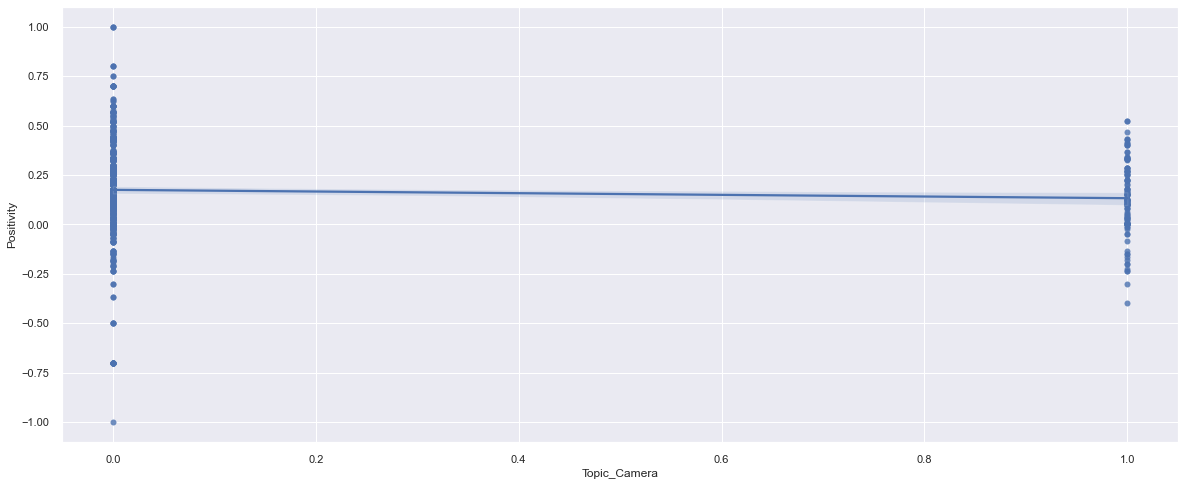

In [91]:
#Linear regression (Camera, Positivity)
sns.regplot(x="Topic_Camera",y="Positivity",data=a_df)

<AxesSubplot:xlabel='Topic_Music', ylabel='Positivity'>

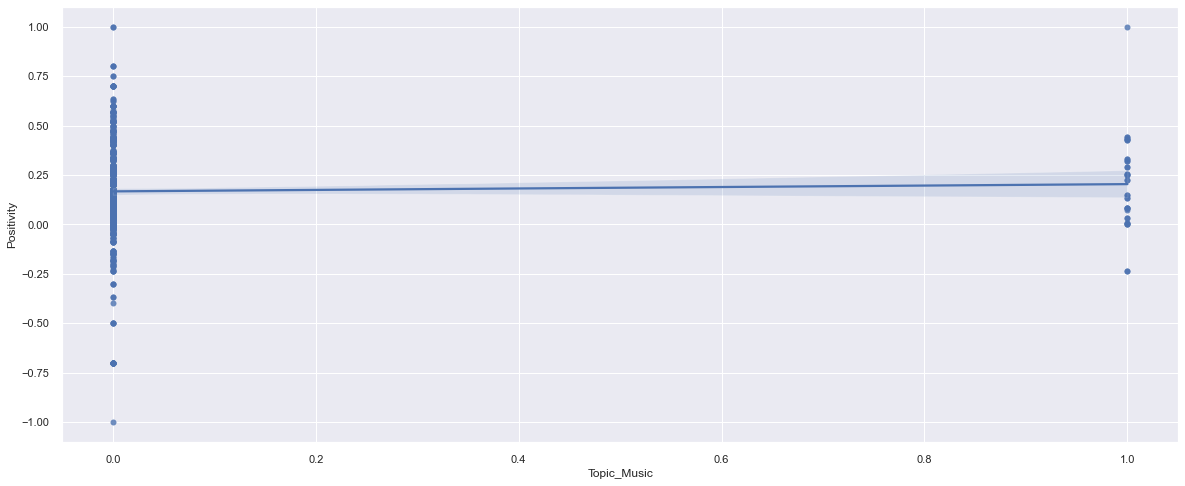

In [92]:
#Linear regression (Music, Positivity)
sns.regplot(x="Topic_Music",y="Positivity",data=a_df)

<AxesSubplot:xlabel='Topic_Software', ylabel='Positivity'>

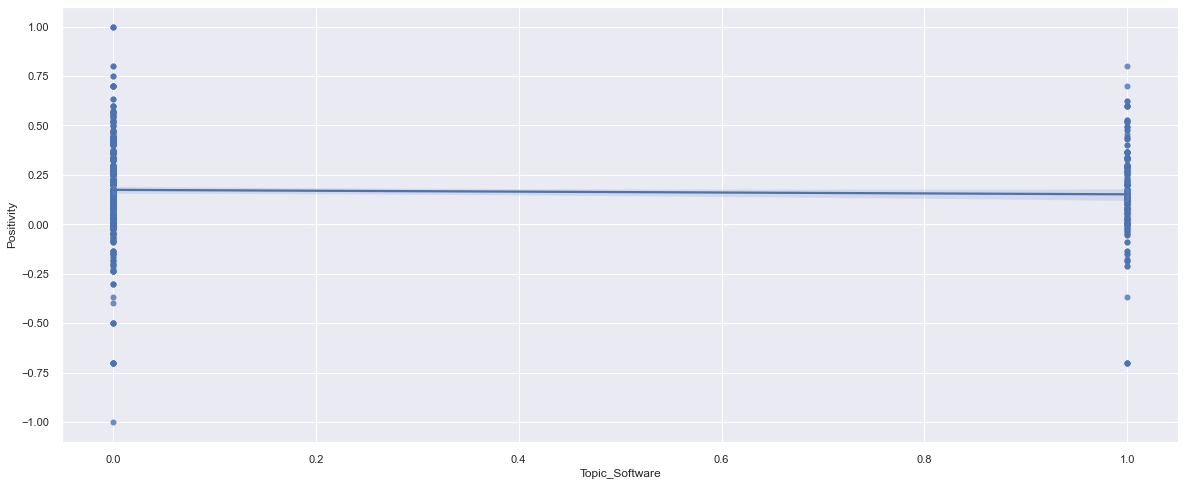

In [93]:
#Linear regression (Software, Positivity)
sns.regplot(x="Topic_Software",y="Positivity",data=a_df)

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

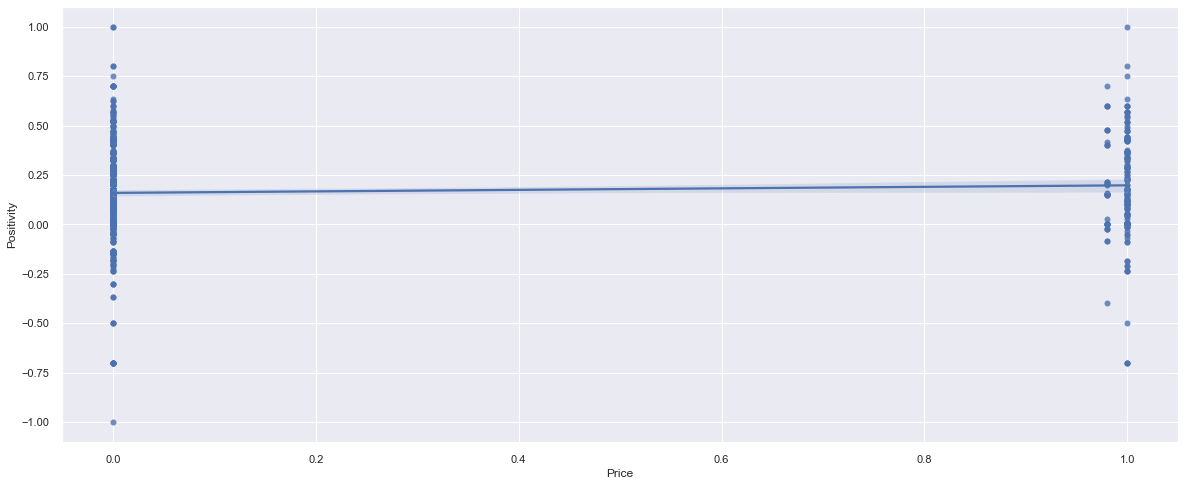

In [94]:
#Linear regression (Price, Positivity)
sns.regplot(x="Price",y="Positivity",data=a_df)

<AxesSubplot:xlabel='Rating', ylabel='Positivity'>

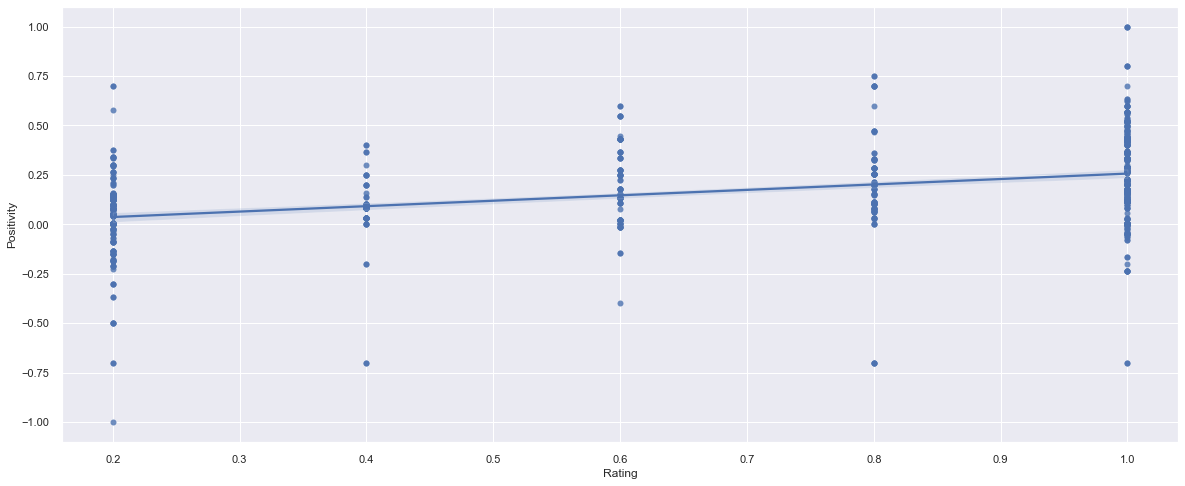

In [95]:
#Linear regression (Rating, Positivity)
sns.regplot(x="Rating",y="Positivity",data=a_df)

## End of Milestone-3

### Description of project and graphs.

This notebook includes all Milestones. 

Business Problem:

How do we improve the iPhone (X,XE,XS,XR models considered here) product?

Assuming data scientist role at Apple and to point out all concerns and crucial points of opportunity regarding previous iphones from Amazon review's datasets. The objective is that I will isolate and categorize the topic that is being mentioned through this dataset by picking up on certain key aspects/variables. There are currently eight different aspects that are being examined.

Variables/aspects: Appearance, Battery, Screen, Software, Music, Storage, Camera and Speed.

Sentiment analysis will be conducted and examined to truly understand the weak points of the phones. The idea is that once weak points are isolated, different departments can find out how to most effectively pool their resources to improve customer satisfaction leading to future sales and better profits.

In [96]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
import numpy as np
import re
import scipy
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from yellowbrick.features import Rank2D

### Loading DataFrames and Data Prep

In [97]:
#Loading dataframes
items = pd.read_csv('items.csv')
reviews = pd.read_csv('reviews.csv')

In [99]:
#Examining the items dataframe
items.head()

asin     brand  \
0  B0000SX2UC       NaN   
1  B0009N5L7K  Motorola   
2  B000SKTZ0S  Motorola   
3  B001AO4OUC  Motorola   
4  B001DCJAJG  Motorola   

                                                                                            title  \
0  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice Activated Dialing & Bright White Backlit Screen   
1                                                                             Motorola I265 phone   
2                                         MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE CELL PHONE   
3                                                           Motorola i335 Cell Phone Boost Mobile   
4                                                   Motorola V365 no contract cellular phone AT&T   

                                                                                 url  \
0  https://www.amazon.com/Dual-Band-Tri-Mode-Activated-Dialing-Backlit/dp/B0000SX2UC   
1                      https://www.amazon.com/Motorola-i265-I265-phone/dp/B0009N5L7K   
2       https://www.amazon.com/MOTOROLA-C168i-CINGULAR-PREPAID-GOPHONE/dp/B000SKTZ0S   
3              https://www.amazon.com/Motorola-i335-Phone-Boost-Mobile/dp/B001AO4OUC   
4         https://www.amazon.com/Motorola-V365-contract-cellular-phone/dp/B001DCJAJG   

                                                                image  rating  \
0  https://m.media-amazon.com/images/I/2143EBQ210L._AC_UY218_ML3_.jpg     3.0   
1  https://m.media-amazon.com/images/I/419WBAVDARL._AC_UY218_ML3_.jpg     3.0   
2  https://m.media-amazon.com/images/I/71b+q3ydkIS._AC_UY218_ML3_.jpg     2.7   
3  https://m.media-amazon.com/images/I/710UO8gdT+L._AC_UY218_ML3_.jpg     3.3   
4  https://m.media-amazon.com/images/I/61LYNCVrrKL._AC_UY218_ML3_.jpg     3.1   

                                           reviewUrl  totalReviews   price  \
0  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.00   
1  https://www.amazon.com/product-reviews/B0009N5L7K             7   49.95   
2  https://www.amazon.com/product-reviews/B000SKTZ0S            22   99.99   
3  https://www.amazon.com/product-reviews/B001AO4OUC            21    0.00   
4  https://www.amazon.com/product-reviews/B001DCJAJG            12  149.99   

   originalPrice  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

In [100]:
#Finding summary statistics in the dataframe.
items.describe()

rating  totalReviews       price  originalPrice
count  720.000000    720.000000  720.000000     720.000000
mean     3.713750    105.679167  234.948931      63.690778
std      0.716014    167.601101  200.008441     172.405370
min      1.000000      1.000000    0.000000       0.000000
25%      3.300000      7.000000   97.512500       0.000000
50%      3.800000     32.000000  188.975000       0.000000
75%      4.100000    122.250000  336.725000       0.000000
max      5.000000    983.000000  999.990000     999.990000

In [101]:
#Examining the reviews dataframe.
reviews.sample(n=5)

asin             name  rating                date  verified  \
17529  B013XAPUW6  Amazon Customer       5         May 3, 2018      True   
36435  B071ZDQ6MV          Msl5575       3     August 28, 2017      True   
65880  B07W14HFQP  Michael Dottery       5    October 15, 2018      True   
7974   B00F2SKPIM            Rahna       5      March 23, 2017      True   
47623  B07CHWMYHP           Dellon       1  September 13, 2018      True   

                                                             title  \
17529                                                   Five Stars   
36435  I'm so disappointed with this smartphone due to WIFI issue.   
65880                                               Its a Motorola   
7974                                                    Love, love   
47623                                                No headphones   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        body  \
17529                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             good phone   
36435  8/30/17 Update I'm changing my rating to 3 stars. Doing a full reset to factory settings did fix the WIFI issue. The phone really is not bad despite the WIFI issue. I think the WIFI issue is caused by the latest security patch for Android Nougat. I just need to find a way how to disable the security patch from being automatically applied. I don't know if disabling the auto update of applications from Google Play does it. I'll see what happens in the next few days. If I encounter the same WIFI issue again due to Android updates I'll lowering rating back to one star and returning my unit. I just can't keep on resetting my unit to factory settings to fix the WIFI issue. If HMD/Nokia is reading this review. *** Please fix this software issue ASAP. **** I'm so disappointed with this smartphone. It worked well for a few days and now WIFI will not work. I tried all recommendations, except for factory, I saw from other reviews. Nothing worked.   
65880                                                                                                                                                                                                                                                          

In [102]:
#Examining the summary statistics for the reviews dataframe.
reviews.describe()

rating  helpfulVotes
count  67986.000000  27215.000000
mean       3.807916      8.229690
std        1.582906     31.954877
min        1.000000      1.000000
25%        3.000000      1.000000
50%        5.000000      2.000000
75%        5.000000      5.000000
max        5.000000    990.000000

In [103]:
#Finding all iphone 8 entries
AP = items['title'].str.lower().str.find('iphone x')!=-1

In [104]:
#Seeing how many matches exist.
AP.sum()

11

In [105]:
#creating a new df based on the search.
items_df = items.loc[AP]

In [106]:
#Seeing the list of different options.
items_df['url']

312      https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT
317       https://www.amazon.com/Apple-iPhone-Fully-Unlocked-64GB/dp/B077578W38
318        https://www.amazon.com/Apple-iPhone-GSM-Unlocked-256GB/dp/B0775H5HJW
399      https://www.amazon.com/Apple-iPhone-AT-256GB-Refurbished/dp/B07D6TQP6F
490        https://www.amazon.com/Apple-iPhone-Max-Fully-Unlocked/dp/B07KFNRQ5S
493    https://www.amazon.com/Apple-iPhone-Fully-Unlocked-Renewed/dp/B07KKL5KGG
542         https://www.amazon.com/Apple-iPhone-XR-Fully-Unlocked/dp/B07P6Y8L3F
598            https://www.amazon.com/Apple-iPhone-Max-256GB-Gray/dp/B07RDMLR4V
603               https://www.amazon.com/Apple-iPhone-Xs-Max-64GB/dp/B07RKYQSRB
608             https://www.amazon.com/Apple-iPhone-XS-256GB-Gray/dp/B07RT1X4FJ
718        https://www.amazon.com/Apple-iPhone-64GB-Gray-Unlocked/dp/B081TJFVCJ
Name: url, dtype: object

In [107]:
#merging the two dataframes based on the asin.
apple = pd.merge(items_df,reviews, on='asin')
#Dropping nan values.
apple = apple.dropna()

In [108]:
#Reviewing the new dataframe
apple.sample(n=2)

asin  brand                                             title_x  \
1111  B07D6TQP6F  Apple  Apple iPhone X, 256GB, Silver - For AT&T (Renewed)   
842   B07D6TQP6F  Apple  Apple iPhone X, 256GB, Silver - For AT&T (Renewed)   

                                                                         url  \
1111  https://www.amazon.com/Apple-iPhone-AT-256GB-Refurbished/dp/B07D6TQP6F   
842   https://www.amazon.com/Apple-iPhone-AT-256GB-Refurbished/dp/B07D6TQP6F   

                                                                   image  \
1111  https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg   
842   https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg   

      rating_x                                          reviewUrl  \
1111       3.9  https://www.amazon.com/product-reviews/B07D6TQP6F   
842        3.9  https://www.amazon.com/product-reviews/B07D6TQP6F   

      totalReviews  price  originalPrice          name  rating_y  \
1111           436  476.0            0.0     D. Cheung         1   
842            436  476.0            0.0  Wang Jia chi         1   

                 date  verified                         title_y  \
1111  August 13, 2019     False  IPhone X is complete BULLCRAP!   
842   August 29, 2018      True                   Not available   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     body  \
1111  STAY AWAY From APPLE products! When Apple’s Marketing Chief Phil Schiller gave his blessing to the iPhone X, "So if you happen to be hanging by the pool, drop your phone in the water... don't worry, dive down, grab it, rinse it, let it dry, you'll be fine.” You would *Think* Apple would stand by its product. WRONG! As it happened to me, I stopped my phone in shallow water, only 3 feet deep, for a few seconds, and IMMEDIATELY my phone bricked. I purchased my iPhone X for $1199 and I would expect my phone would last a few years and have the peace of mind that my phone would still work after that incident. Well I was more than angry when Apple would not even attempt to replace my product, but charges me $549 to replace with a $#%$ refurbished product. The Staff at genius bar were snobby and would not even care! You work hard for you money, you spend your hard earn dollars for a good quality product, but APPLE is only scamming you and stealing from you! THINK ABOUT IT! Don’t buy what they advertise unless they guarantee it! PERIOD!   
842                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [109]:
#Describing the newly formed apple dataframe
apple.describe()

rating_x  totalReviews       price  originalPrice    rating_y  \
count  724.000000    724.000000  724.000000     724.000000  724.000000   
mean     3.944199    325.430939  530.357307     189.818425    3.294199   
std      0.104303    126.432995   75.930137     325.421083    1.816756   
min      3.800000      1.000000  448.950000       0.000000    1.000000   
25%      3.900000    198.000000  476.000000       0.000000    1.000000   
50%      3.900000    436.000000  479.000000       0.000000    4.000000   
75%      3.900000    436.000000  574.990000     735.000000    5.000000   
max      4.400000    442.000000  664.990000     749.990000    5.000000   

       helpfulVotes  
count    724.000000  
mean      13.440608  
std       34.158698  
min        1.000000  
25%        1.000000  
50%        3.000000  
75%        8.000000  
max      436.000000

In [110]:
#Checking out the shape of the dataframe.
apple.shape

(724, 17)

In [111]:
#Deleting erroneous columns.
del apple['image']
del apple['url']
del apple['reviewUrl']
del apple['price']
del apple['name']
del apple['rating_x']

In [112]:
#Renaming columns.
apple.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple['Date'] = pd.to_datetime(apple['Date']) #Reformatting date/time format.
apple.sample(n=2)

Item #  Brand  \
1208  B07KFNRQ5S  Apple   
408   B077578W38  Apple   

                                                                  Model  \
1208  Apple iPhone Xs Max, 256GB, Space Gray - Fully Unlocked (Renewed)   
408          Apple iPhone X, Unlocked 5.8", 64GB - Space Gray (Renewed)   

      Reviews  Price  Rating       Date  Verified            Review Title  \
1208      230    0.0       5 2019-12-14      True  This is a great Iphone   
408       442    0.0       5 2019-11-27      True               Great buy   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Review  \
1208  I've read all the bad reviews and can't help but think there is a serious disconnect between the phones sent to these folks and the ones who have posted the good reviews. My IPhoneX plus with 512gb arrived in absolutely perfect condition. Well, OK, It didn't have all that glamorous packaging that Apple provides but we all know how that adds to the bottom line. I did not need an exciting unboxing experience, I needed a good iPhone X Plus and that is exactly what I received. It's difficult to believe the phone I received was not completely brand new and I can't imagine a phone ordered from Apple to arrive in better condition.   
408                                                                                                                                                                                                                                                                                                                                            I read reviews before buying. Only two days in will update if anything changes. Luckily for me I had no issues. Order arrived next day no cracks at all. very small mark near charging port not a big deal. Phone comes with screen protector on it. I got 100% battery life on mine - checked under settings.   

      Helpful  
1208      4.0  
408       1.0

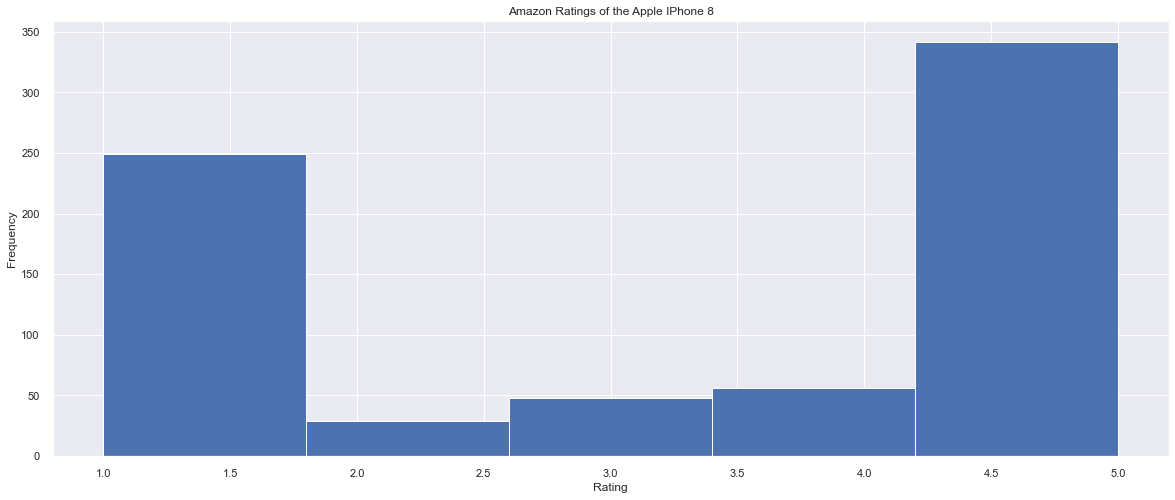

In [113]:
#Learning about the distribution of the reviews
plt.hist(apple['Rating'],bins=5)
plt.title("Amazon Ratings of the Apple IPhone 8")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot:title={'center':'Amazon Verified Count'}, xlabel='Verified', ylabel='count'>

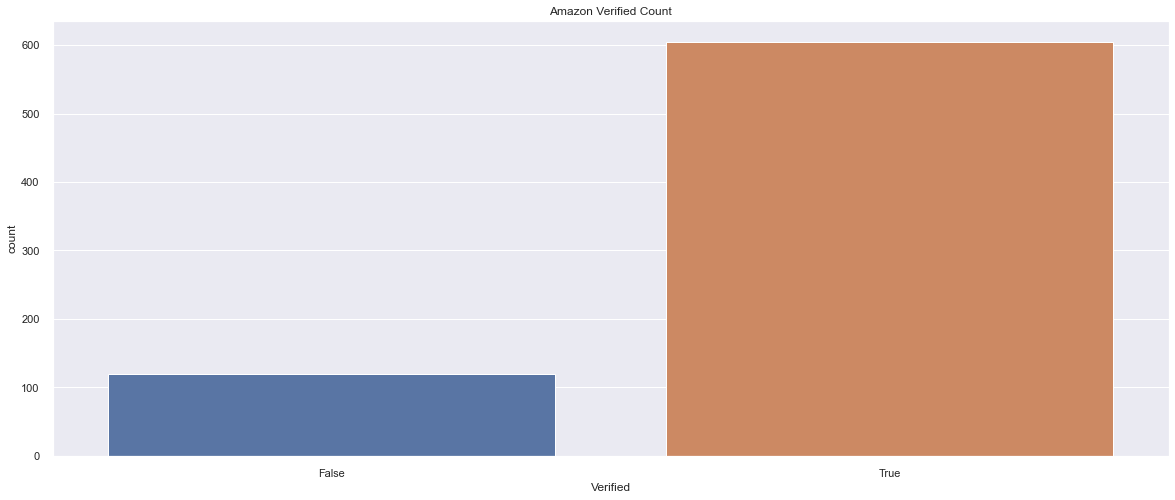

In [114]:
#Seeing how many of these ratings are from a verified source - bar chart.
plt.title('Amazon Verified Count')
sns.countplot(x="Verified", data=apple)

In [115]:
### Sentiment Analysis:
#Lowering the casing.
apple['Review'] = apple['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
apple.sample(n=3)

Item #  Brand  \
1778  B07RT1X4FJ  Apple   
876   B07D6TQP6F  Apple   
1328  B07KFNRQ5S  Apple   

                                                                  Model  \
1778                  Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)   
876                  Apple iPhone X, 256GB, Silver - For AT&T (Renewed)   
1328  Apple iPhone Xs Max, 256GB, Space Gray - Fully Unlocked (Renewed)   

      Reviews  Price  Rating       Date  Verified  \
1778      198    0.0       2 2019-12-14     False   
876       436    0.0       5 2019-04-29      True   
1328      230    0.0       4 2019-09-18     False   

                                       Review Title  \
1778                     Screen and speaker problem   
876                                    Great Option   
1328  Creative Focus yet delivers on most aspects .   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Review  \
1778  ok i got a space gray iphone xs with 256gb and i was happy to get it, it came in a odd box but i didn’t really care about that i got the phone and there are dings and scratch’s on the outer metal case of the phone and i can tell that i he front glass and lcd scream were replaced be the screen kinda drags the image like on a old computer we’re the image stays for a second, that was one thing i was annoyed about that but the second thing was that it sound like the bottom speaker was broken at one point and they bought another one but it is a really cheap speaker because at certain points it has a pitch of sound with it and it just doesn’t sound good the speaker next to the face id camera works perfectly just the one at the bottom of the phone is really bad me personally i don’t care if it has dings or scratch’s on the outer metal frame of the phone it just really annoys me when they replace the speaker with a bad one and that they get a cheaper lcd screen just to save a little bit of money i mostly notice the bad cream when i’m scrolling on instagram, twitter or youtube it’s when you are scrolling that it is the most noticeable problem wouldn’t buy again if i new they replaced parts with bad ones also battery gets kinda worm/hot when charging or on facetime and sometimes just randomly but that may just happen when running powerful or changing so that may just be normal not to sure but the battery stays charged all day so not too worried about the battery   
876                                                                                                                                                                                               

In [116]:
#Removing punctuation.
apple['Review'] = apple['Review'].map(lambda x: re.sub(r'\W+', ' ', x))
apple.sample(n=3)

Item #  Brand  \
1525  B07RDMLR4V  Apple   
1777  B07RT1X4FJ  Apple   
891   B07D6TQP6F  Apple   

                                                      Model  Reviews  Price  \
1525  Apple iPhone XS Max, 256GB, Gray - For AT&T (Renewed)      230    0.0   
1777      Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)      198    0.0   
891      Apple iPhone X, 256GB, Silver - For AT&T (Renewed)      436    0.0   

      Rating       Date  Verified                      Review Title  \
1525       5 2019-11-04      True                         Great buy   
1777       1 2019-10-11     False                 Simply unreliable   
891        5 2019-03-27      True  Bluetooth isn’t always the best.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Review  \
1525                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  i got this phone in june i can t be happier came in like new condition battery at a 100 can last over 24hrs of normal use i upgraded from iphone 6s which battery lasted merely 6 8hrs i would really recommend this phone    
1777  i had iphone xs and it was my first iphone for the first two months it worked fine the problems started with ios updates the first update didn t install and some apps stopped working after the support people fixed it the phone started to shut down on its own the next update turned the phone into a brick when i tried to turn it on it would display that connect to itunes picture at the apple store the technician magically revived the phone using a new update but the very next day the phone started to drop wifi connection i think the phone had serious hardware problems but apple engineers figured out how to partially overcome the problems through software tricks this is how apple avoids replacing a bad phone with a new one i ended up paying for an upgrade    
891                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          call   

      Helpful  
1525      3.0  
1777      2.0  
891       4.0

In [117]:
#Removing stop words.
stop = stopwords.words('english') #stop words = English.
apple['Review'] = apple['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
apple.sample(n=2)

Item #  Brand  \
408   B077578W38  Apple   
1240  B07KFNRQ5S  Apple   

                                                                  Model  \
408          Apple iPhone X, Unlocked 5.8", 64GB - Space Gray (Renewed)   
1240  Apple iPhone Xs Max, 256GB, Space Gray - Fully Unlocked (Renewed)   

      Reviews  Price  Rating       Date  Verified Review Title  \
408       442    0.0       5 2019-11-27      True    Great buy   
1240      230    0.0       4 2019-11-20      True          !!!   

                                                                                                                                                                                                                Review  \
408   read reviews buying two days update anything changes luckily issues order arrived next day cracks small mark near charging port big deal phone comes screen protector got 100 battery life mine checked settings   
1240                                                                   encanta el artículo está perfecto impecable como nuevo lo único es que la batería dura poco pensé que duraría más pero por lo demás maravilloso   

      Helpful  
408       1.0  
1240      2.0

In [118]:
#Word tokenizing
apple['Review'] = apple['Review'].apply(word_tokenize) 
apple.sample(n=2)

Item #  Brand  \
394  B077578W38  Apple   
866  B07D6TQP6F  Apple   

                                                          Model  Reviews  \
394  Apple iPhone X, Unlocked 5.8", 64GB - Space Gray (Renewed)      442   
866          Apple iPhone X, 256GB, Silver - For AT&T (Renewed)      436   

     Price  Rating       Date  Verified  \
394    0.0       5 2019-11-29      True   
866    0.0       5 2019-03-25      True   

                                               Review Title  \
394                        Like the apple store but cheaper   
866  Arrived as advertised, haven't had any problems so far   

                                                                                                                                                                                                                                                                                                                                                                                                                                                          Review  \
394                                                                                                                                                                        [product, magical, brand, new, scratch, battery, life, 96, included, charger, accessories, amazing, like, gong, apple, store, cheaper, full, disclosure, seller, provided, note, indicating, would, receive, compensation, perfect, review, form, amazon, gift, card, change, review]   
866  [bit, hesitant, order, phone, never, ordered, phone, retailer, instead, company, arrived, date, predicted, three, weeks, showed, plain, white, box, bit, dirty, envelope, phone, fine, scratches, dents, anything, managed, set, service, provider, day, turned, 20, charge, charger, sim, card, pin, recommend, order, headphone, jack, adapters, lightning, headphones, get, phone, first, time, using, iphone, like, things, considered, good, purchase]   

     Helpful  
394      1.0  
866      3.0

In [119]:
#word stemming
stemmer = PorterStemmer()
apple['Review'] = apple['Review'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))
apple.sample(n=2)

Item #  Brand  \
754  B0775H5HJW  Apple   
830  B07D6TQP6F  Apple   

                                                      Model  Reviews  Price  \
754  Apple iPhone X, GSM Unlocked, 256GB - Silver (Renewed)      139  735.0   
830      Apple iPhone X, 256GB, Silver - For AT&T (Renewed)      436    0.0   

     Rating       Date  Verified  \
754       3 2018-12-30      True   
830       1 2018-11-26      True   

                                                      Review Title  \
754  Fast shipping, good price, more scratches than I anticipated.   
830                                       Not a Refurbished Iphone   

                                                                                                                              Review  \
754  great phone fast ship great price howev scratch screen anticip crack defect screen scratch would expect certifi refurbish phone   
830                                                                                                            refurbish iphon activ   

     Helpful  
754      1.0  
830    120.0

In this section, we loaded the dataframe and examined the data. We observed the summary statistics, combined the data and repeated the earlier step. We searched for keywords which in our case was the iPhone x, and found only the reviews that examined that phone and created a dataframe.

We then generated some graphs which gave the overview as to how people felt about the phones. Then checked how many of these reviews were from verified purchasers. The reason for doing this is that it allows us to gauge how much weightage should be put into the results of our analysis.

Finally, we did some preprocessing - lowercased everything, removed punctuation, tokenized and stemmed the words.

### Splitting the dataframe to review several aspects.

In [120]:
#List of terms people would use to review.
Battery = ["battery", 'charge', 'juice', 'charging', 'talk time', 'hours', 'minutes', 'life', 'lasts']
Camera = ["camera", 'pixels', 'megapixels', 'pictures', 'video', 'facial', 'recognition', 'animoji', 'zoom', 'dual',
          'optical', 'front', 'rear', 'back', 'lens']
Speed = ['speed', 'fast', 'slow', 'quick', 'lag', 'ram']
Storage = ["storage", 'space', 'room', 'memory', 'gb', 'capacity', 'expandable']
Software = ["software", 'itunes', 'app store', 'app', 'ios', 'animoji', 'game', 'siri', 'touch screen']
Music = ["music", 'audio', 'song', 'sound', 'speaker']
Screen = ["screen", 'oled', 'led', 'lcd', 'scratch', 'widescreen', 'backlit', 'display', 'retina', 'glass', 'inch',
          'resolution', 'break', 'unbreakable', 'shatter', 'chip']
Appearance = ["color", "size", 'colour', 'case', 'looks', 'vibrant']

In [122]:
#Searching all rows for items in the lists.
appe = apple[apple['Review'].str.lower().str.contains('|'.join(Appearance))]
batt = apple[apple['Review'].str.lower().str.contains('|'.join(Battery))]
came = apple[apple['Review'].str.lower().str.contains('|'.join(Camera))]
spee = apple[apple['Review'].str.lower().str.contains('|'.join(Speed))]
stor = apple[apple['Review'].str.lower().str.contains('|'.join(Storage))]
soft = apple[apple['Review'].str.lower().str.contains('|'.join(Software))]
musi = apple[apple['Review'].str.lower().str.contains('|'.join(Music))]
scre = apple[apple['Review'].str.lower().str.contains('|'.join(Screen))]

In [123]:
#Defining the sentiment analysis function
def ss(x):
    return TextBlob(x).sentiment 

In this section, we created lists of different keywords to pick up when searching to separate and create new dataframes based on the topic. We also defined our function for sentiment analysis using the TextBlob module. This will determine the positivity and subjectivity level, so we can understand the levels of the reviews of the iphones.

### Appearance

In [124]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
appe['Score'] = appe['Review'].apply(ss)
appe['Positivity'] = appe['Score'].apply(lambda x:x[0])
appe['Subjectivity'] = appe['Score'].apply(lambda x:x[1])
appe['Topic'] = 'Appearance'
appe.head()

Item #  Brand  \
57   B0775451TT  Apple   
77   B0775451TT  Apple   
359  B0775451TT  Apple   
367  B077578W38  Apple   
381  B077578W38  Apple   

                                                             Model  Reviews  \
57   Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)      436   
77   Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)      436   
359  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)      436   
367     Apple iPhone X, Unlocked 5.8", 64GB - Space Gray (Renewed)      442   
381     Apple iPhone X, Unlocked 5.8", 64GB - Space Gray (Renewed)      442   

      Price  Rating       Date  Verified  \
57   749.99       4 2019-06-07      True   
77   749.99       4 2019-12-11      True   
359  749.99       4 2018-09-01     False   
367    0.00       5 2019-02-14      True   
381    0.00       1 2019-06-30      True   

                                                          Review Title  \
57                                                                Good   
77                                    Not perfect but worth the price.   
359  The Cell Phone Equivalent of a Concept Car, for Better and Worse.   
367                          So your’re not sure? Be sure. Here’s why.   
381                                                       No Promises!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Review  \
57                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       phone function fine expect unlock good use intern phone receiv got lot scratch back howev use case phone bother much   
77                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [125]:
appe.describe()

Reviews      Price     Rating     Helpful  Positivity  Subjectivity
count   29.000000   29.00000  29.000000   29.000000   29.000000     29.000000
mean   287.517241  102.93000   3.586207   17.275862    0.182989      0.413881
std    126.633222  261.89127   1.570197   39.800302    0.153977      0.149390
min     13.000000    0.00000   1.000000    1.000000   -0.150000      0.000000
25%    198.000000    0.00000   2.000000    1.000000    0.083333      0.350649
50%    230.000000    0.00000   4.000000    3.000000    0.179004      0.429621
75%    436.000000    0.00000   5.000000   10.000000    0.329167      0.507792
max    442.000000  749.99000   5.000000  146.000000    0.448377      0.593994

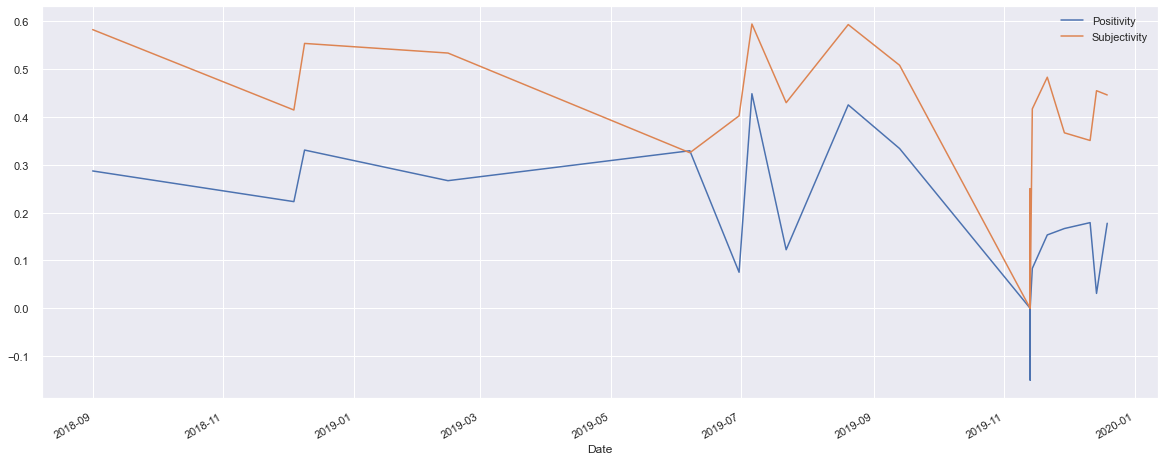

In [126]:
#Time series
ylist = ['Positivity', 'Subjectivity']
appe_ts = appe.plot(x='Date', y=ylist)

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

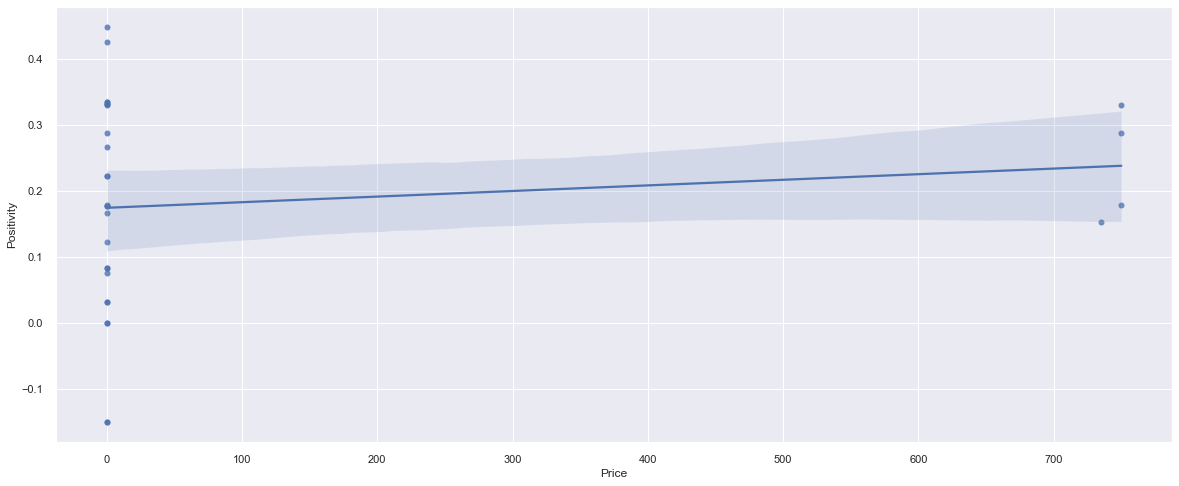

In [127]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=appe)

<AxesSubplot:xlabel='Subjectivity', ylabel='Positivity'>

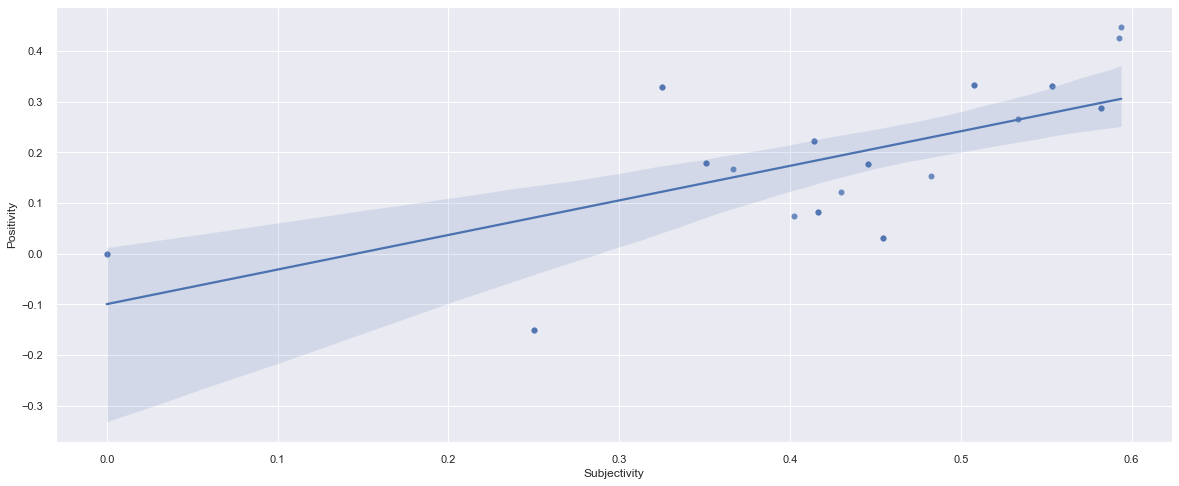

In [128]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=appe)

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/213945037.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


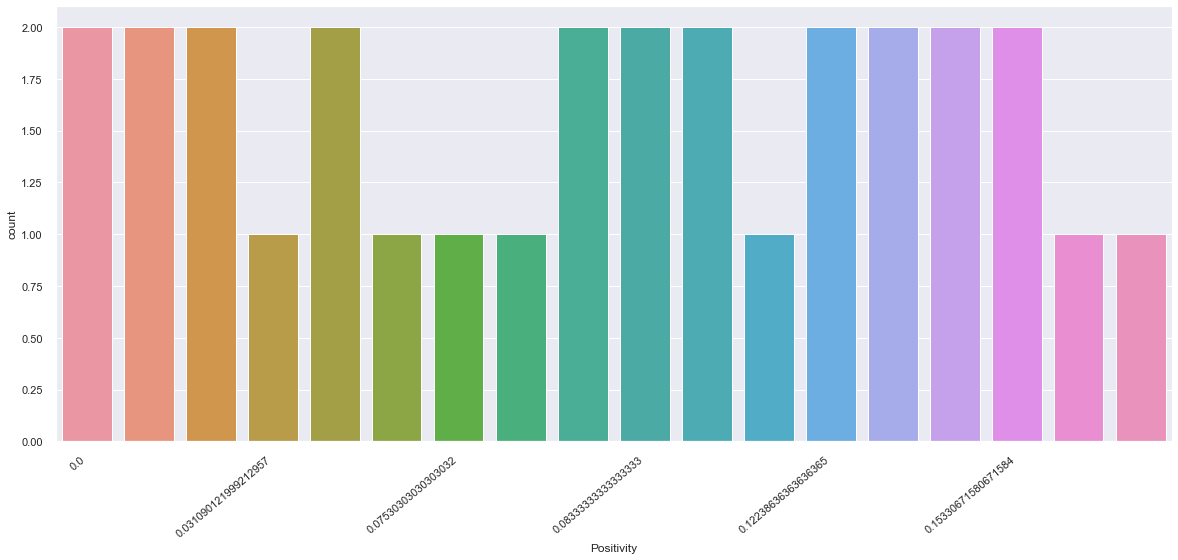

In [129]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(appe['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/3965255203.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


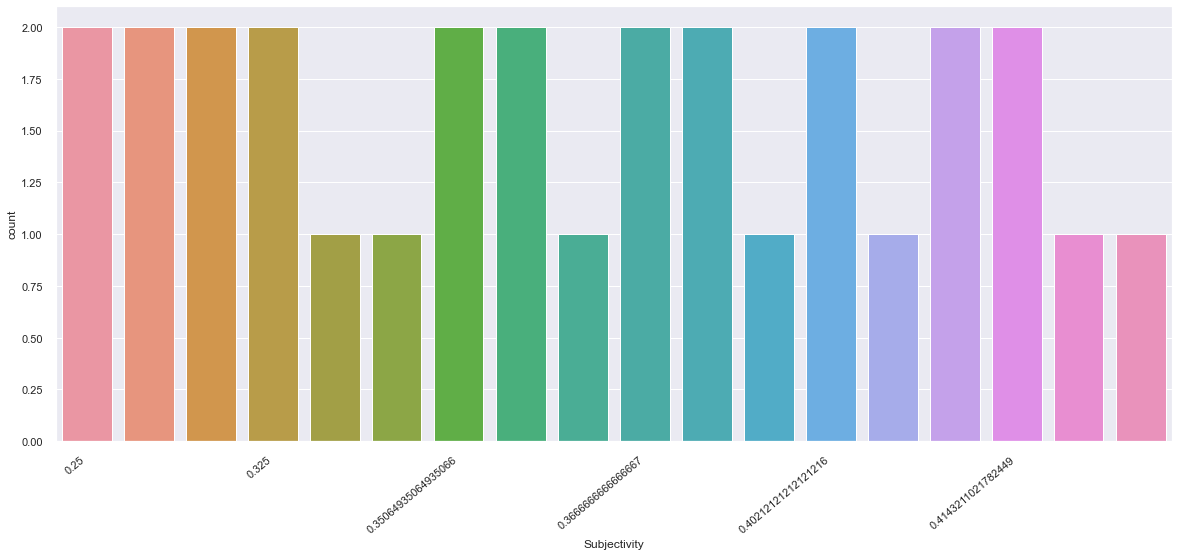

In [130]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(appe['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 7.49990000e+02,  4.00000000e+00,  3.29166667e-01,
         3.25000000e-01],
       [ 7.49990000e+02,  4.00000000e+00,  1.79004329e-01,
         3.50649351e-01],
       [ 7.49990000e+02,  4.00000000e+00,  2.86964028e-01,
         5.82274273e-01],
       [ 0.00000000e+00,  5.00000000e+00,  2.66666667e-01,
         5.33333333e-01],
       [ 0.00000000e+00,  1.00000000e+00,  7.53030303e-02,
         4.02121212e-01],
       [ 0.00000000e+00,  5.00000000e+00,  1.22386364e-01,
         4.29621212e-01],
       [ 0.00000000e+00,  5.00000000e+00,  1.66666667e-01,
         3.66666667e-01],
       [ 0.00000000e+00,  3.00000000e+00,  4.48376623e-01,
         5.93993506e-01],
       [ 7.35000000e+02,  4.00000000e+00,  1.53306716e-01,
         4.82831695e-01],
       [ 0.00000000e+00,  4.00000000e+00,  3.29166667e-01,
         3.25000000e-01],
       [ 0.00000000e+00,  4.00000000e+00,  1.79004329e-01,
         3.50649351e-01],
       [ 0.00000000e+00,  4.00000000e+00,  2.86964028e-01,
      

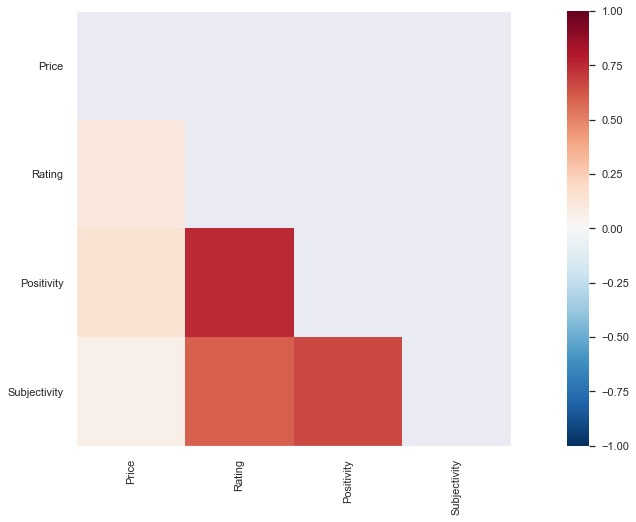

In [131]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = appe[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data


In [132]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(appe['Rating'],appe['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(appe['Subjectivity'],appe['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(appe['Rating'],appe['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.75
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.662
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.601
Subjectivity/Rating Probability is: 0.001


The appearance of the phone was found to have a slightly decreasing subjectivity score with a slightly increasing positivity score over the time series analysis, although there was great variance. Still, even at its worst, the reviews regarding appearance was only slightly negative.

As price increased, positivity barely had any increase, which made sense as the appearance of the phone looked the same as long as there were no defects.

As subjectivity increased, so did positivity. This indicated that the more opinionated people were about the appearance, the more positive those opinions were.

The histogram about appearance was very much uniform, with a peak at 0, as many reviews were either in other languages or had nothing that sentiment analysis could pick up on. the same was true in regards to subjectivity scores.

Correlation testing found some moderately strong links, most strongly between positivity and subjectivity, with an r-squared of .662. The links between rating and positivity scored .75 and subjectivity and rating scored .601. The likelihood of all of these occurring by random chance was less than .001 percent.

### Battery

In [133]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
batt['Score'] = batt['Review'].apply(ss)
batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
batt['Subjectivity'] = batt['Score'].apply(lambda x:x[1])
batt['Topic'] = 'Battery'
batt.sample(n=2)

Item #  Brand  \
854   B07D6TQP6F  Apple   
1212  B07KFNRQ5S  Apple   

                                                                  Model  \
854                  Apple iPhone X, 256GB, Silver - For AT&T (Renewed)   
1212  Apple iPhone Xs Max, 256GB, Space Gray - Fully Unlocked (Renewed)   

      Reviews  Price  Rating       Date  Verified       Review Title  \
854       436    0.0       1 2019-09-19      True  Not as they claim   
1212      230    0.0       5 2019-09-05      True     It is unlocked   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Review  \
854   item claim function like new devic true let walk dramat tragedi detail monitor packag moment purchas accid bright sunni day wait mailbox deliveri truck cruis grab packag ran insid ecstat prospect newest gadget gaze chrome plate beauti knew love first sight true set electron treasur tap set feast eye sight rare see iphon batteri full capac reader proudli gleam 100 like new condit sight met eye gave horror would believ eighti three percent mind race alreadi vow til death us part look bride screen realiz need second doctor opinion schedul appoint soon return honeymoon appl memori hospit settl uneasi vacat new love tragedi struck start edit slow motion video man break egg forehead screen flicker die gentli tri shake awak hit power volum button mainli volum button obvious huge plu wife rush er nearest appl memori hospit fear worst worst got heart known smart board fail would never speak never saw eye open sinc day never forget last imag saw egg make final impact man head tell stori self piti realiz may emot mani recal similar moment life past perhap even recent past share place love concern member commun amazon make mistak add one last word say found support group especi help emot time thank time hope never buy ahem marri bride father law happi phone hunt   
1212                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [134]:
batt.describe()

Reviews       Price      Rating     Helpful  Positivity  \
count  135.000000  135.000000  135.000000  135.000000  135.000000   
mean   338.488889  204.886593    3.748148   21.192593    0.219120   
std    127.333905  334.700639    1.558408   53.960253    0.285810   
min      1.000000    0.000000    1.000000    1.000000   -1.000000   
25%    230.000000    0.000000    3.000000    1.000000    0.077045   
50%    436.000000    0.000000    5.000000    3.000000    0.200000   
75%    436.000000  735.000000    5.000000    9.500000    0.395202   
max    442.000000  749.990000    5.000000  436.000000    1.000000   

       Subjectivity  
count    135.000000  
mean       0.489742  
std        0.204840  
min        0.000000  
25%        0.391821  
50%        0.492493  
75%        0.602610  
max        1.000000

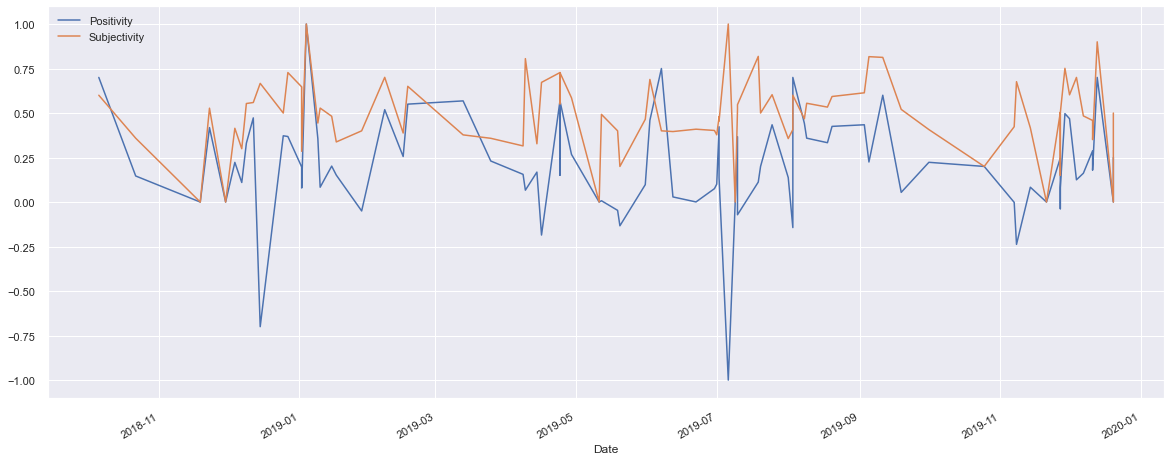

In [135]:
#Time series
batt_ts = batt.plot(x='Date', y=ylist)

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

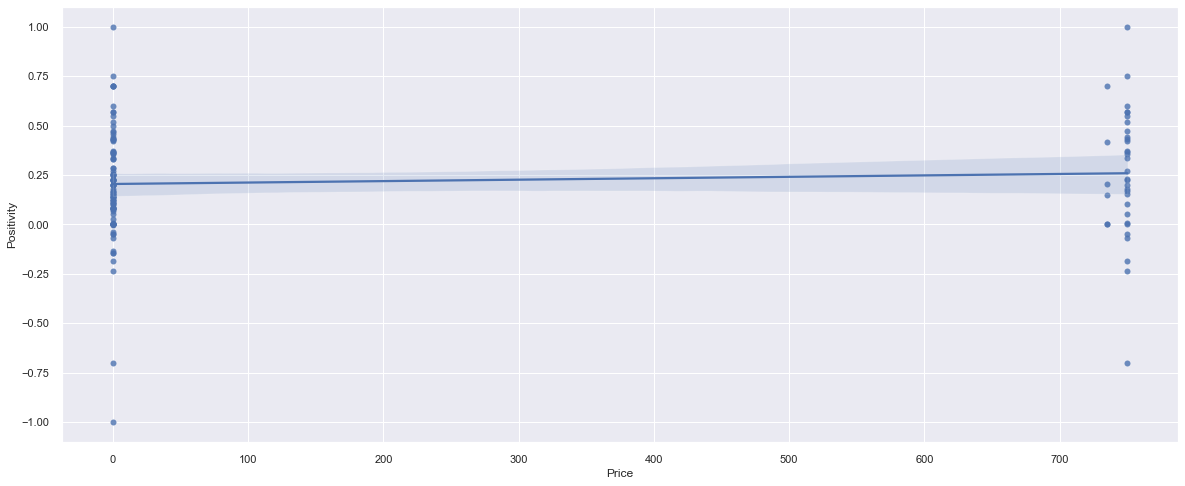

In [136]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=batt)

<AxesSubplot:xlabel='Subjectivity', ylabel='Positivity'>

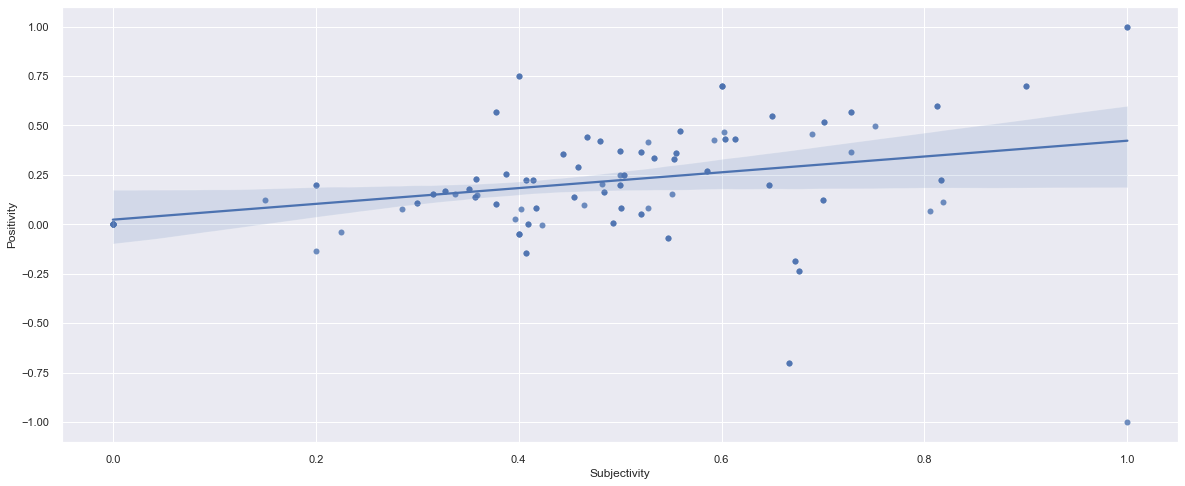

In [137]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=batt)

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/40087000.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


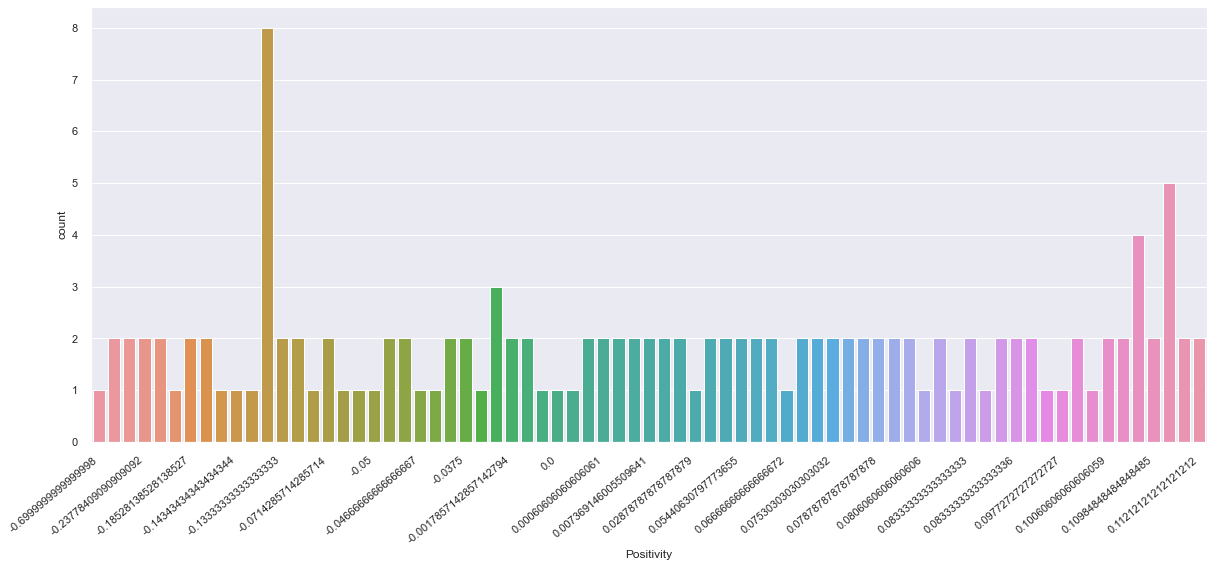

In [138]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(batt['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1525075067.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


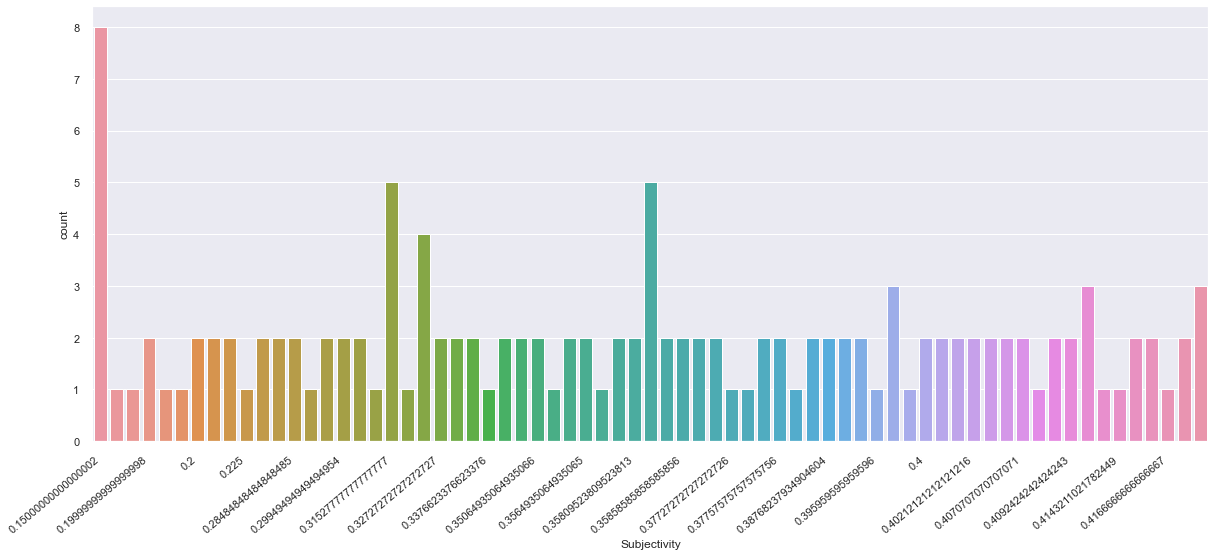

In [139]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(batt['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 7.49990000e+02,  1.00000000e+00, -1.85281385e-01,
         6.72077922e-01],
       [ 7.49990000e+02,  5.00000000e+00,  4.72727273e-01,
         5.59090909e-01],
       [ 7.49990000e+02,  1.00000000e+00,  1.55555556e-01,
         3.15277778e-01],
       [ 7.49990000e+02,  2.00000000e+00,  1.96666667e-01,
         6.46666667e-01],
       [ 7.49990000e+02,  5.00000000e+00, -2.37784091e-01,
         6.76136364e-01],
       [ 7.49990000e+02,  3.00000000e+00,  4.34098639e-01,
         6.02947846e-01],
       [ 7.49990000e+02,  5.00000000e+00,  3.56250000e-01,
         4.43750000e-01],
       [ 7.49990000e+02,  5.00000000e+00,  4.22857143e-01,
         4.80000000e-01],
       [ 7.49990000e+02,  1.00000000e+00,  5.44063080e-02,
         5.20470006e-01],
       [ 7.49990000e+02,  5.00000000e+00,  7.36914601e-03,
         4.92493113e-01],
       [ 7.49990000e+02,  5.00000000e+00,  3.72222222e-01,
         5.00000000e-01],
       [ 7.49990000e+02,  5.00000000e+00,  2.30476190e-01,
      

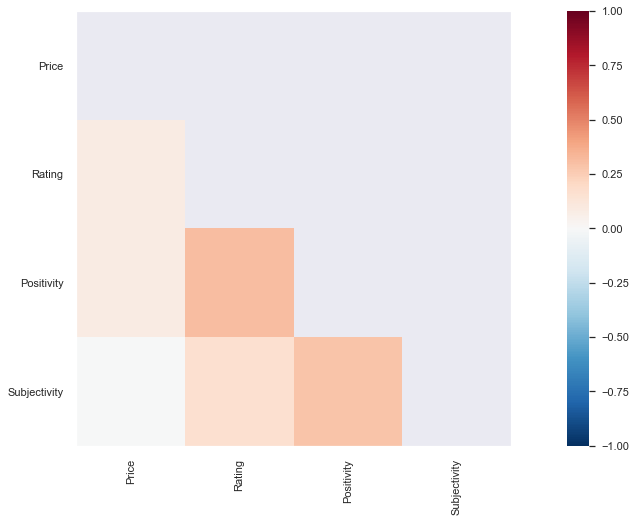

In [140]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = batt[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data


In [141]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(batt['Rating'],batt['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(batt['Subjectivity'],batt['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(batt['Rating'],batt['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.307
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.286
Subjectivity/Positivity Probability is: 0.001
Subjectivity/Rating R is: 0.157
Subjectivity/Rating Probability is: 0.07


### Camera

In [142]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
came['Score'] = came['Review'].apply(ss)
came['Positivity'] = came['Score'].apply(lambda x:x[0])
came['Subjectivity'] = came['Score'].apply(lambda x:x[1])
came['Topic'] = 'Camera'
came.sample(n=2)

Item #  Brand  \
726  B0775H5HJW  Apple   
363  B0775451TT  Apple   

                                                             Model  Reviews  \
726         Apple iPhone X, GSM Unlocked, 256GB - Silver (Renewed)      139   
363  Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)      436   

      Price  Rating       Date  Verified  \
726  735.00       5 2019-01-15      True   
363  749.99       5 2018-06-28     False   

                                      Review Title  \
726  Awesome! Just like new for few hundreds less!   
363                         Hi ticket quality item   

                                                                                                                                                                                                                                                                                 Review  \
726  exterior refurbish iphon x order like new singl scratch live germani unlock phone work flawlessli german network came front protect glass screen alreadi instal nice touch also aftermarket charger cabl max batteri capac 94 compar new one guess somewhat expect refurbish phone   
363                                                                                                                                                                                                                                      bit pricey worth facial recognit work password   

     Helpful                                     Score  Positivity  \
726      8.0  (0.2018181818181818, 0.4818181818181818)    0.201818   
363     12.0                              (0.15, 0.05)    0.150000   

     Subjectivity   Topic  
726      0.481818  Camera  
363      0.050000  Camera

In [143]:
came.describe()

Reviews       Price      Rating     Helpful  Positivity  \
count  120.000000  120.000000  120.000000  120.000000  120.000000   
mean   314.700000  186.623083    3.350000   20.250000    0.132387   
std    136.901461  324.611584    1.678585   43.220414    0.180172   
min      1.000000    0.000000    1.000000    1.000000   -0.400000   
25%    222.000000    0.000000    1.000000    1.000000    0.007369   
50%    436.000000    0.000000    4.000000    3.000000    0.125000   
75%    436.000000  183.750000    5.000000   12.000000    0.267543   
max    442.000000  749.990000    5.000000  304.000000    0.525000   

       Subjectivity  
count    120.000000  
mean       0.406817  
std        0.184824  
min        0.000000  
25%        0.312955  
50%        0.414321  
75%        0.520580  
max        0.850000

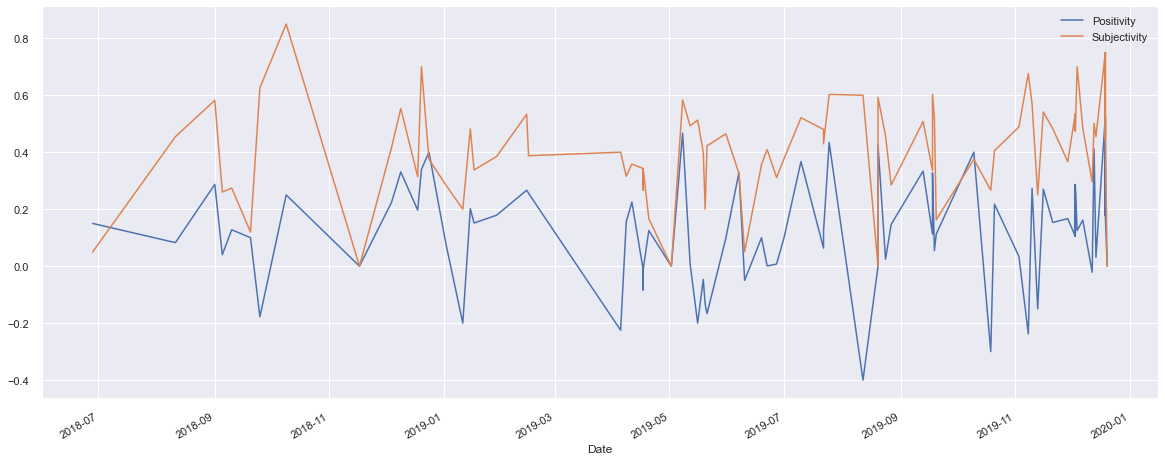

In [144]:
#Time series
came_ts = came.plot(x='Date', y=ylist)

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

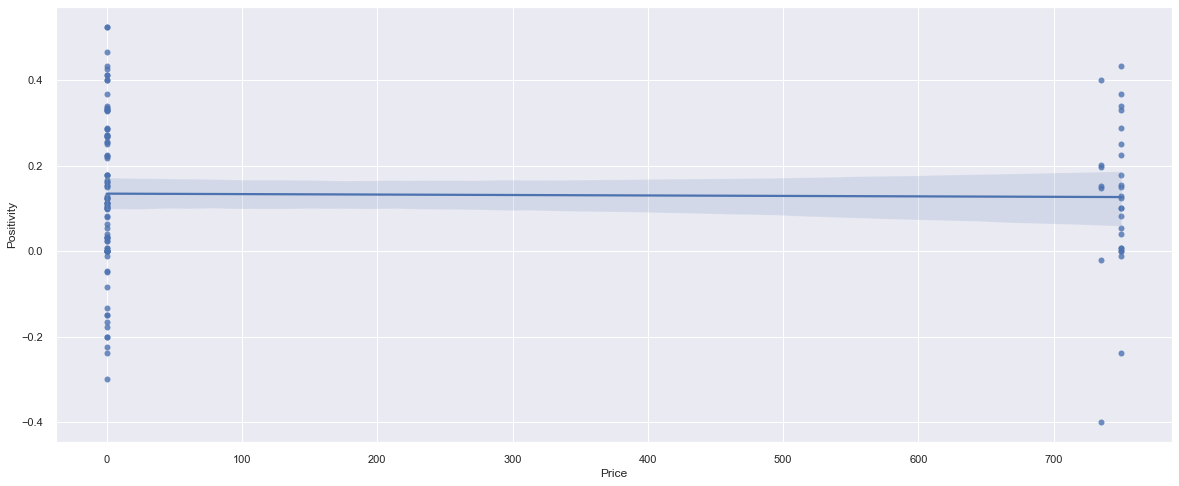

In [145]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=came)

<AxesSubplot:xlabel='Subjectivity', ylabel='Positivity'>

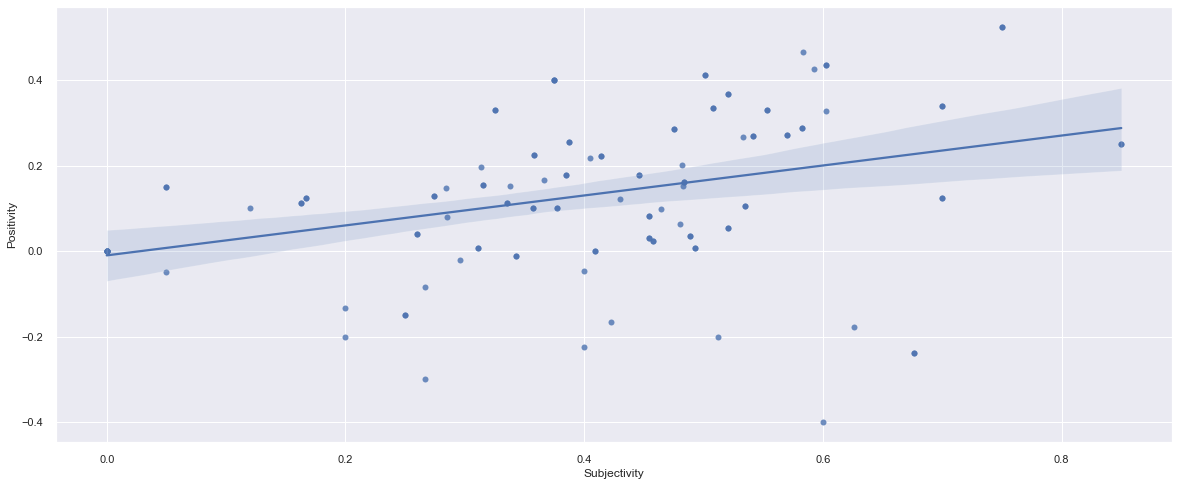

In [146]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=came)

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/2085259298.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


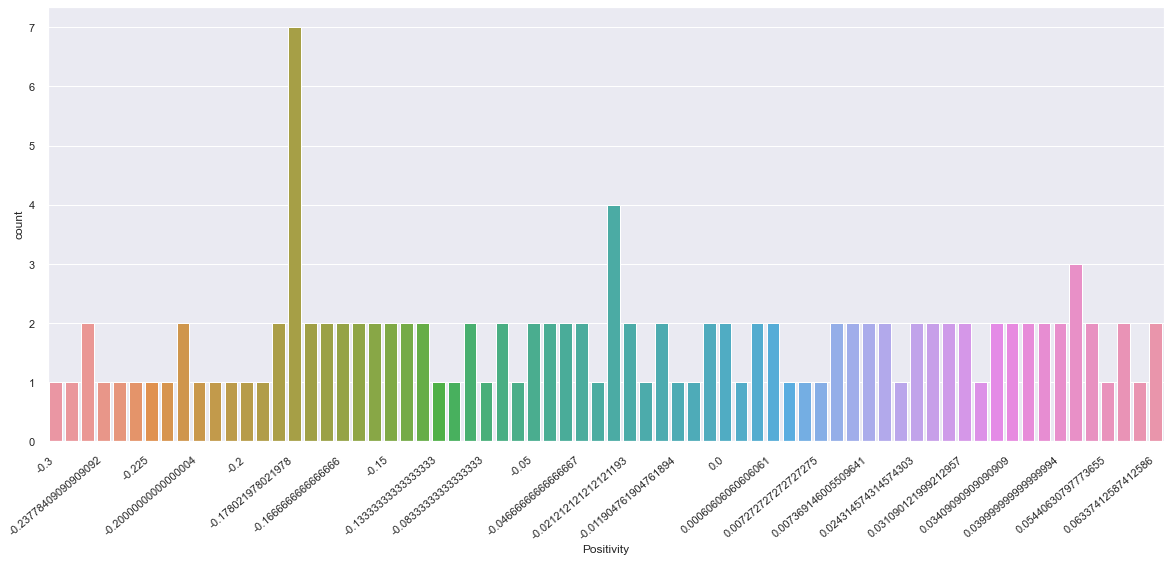

In [147]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(came['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/360767402.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


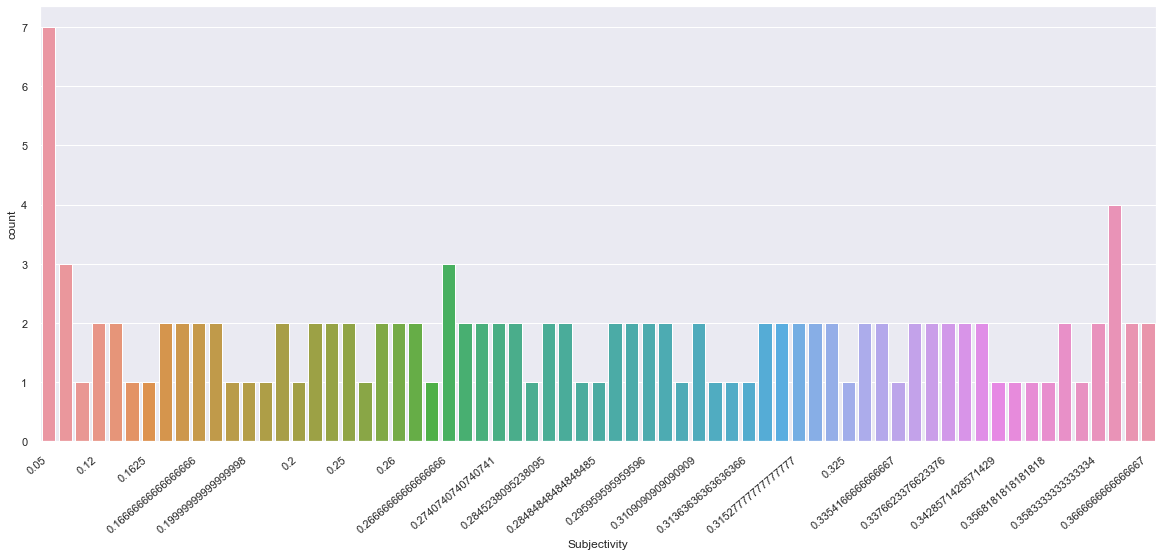

In [148]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(came['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 7.49990000e+02,  1.00000000e+00,  1.25000000e-01,
         1.66666667e-01],
       [ 7.49990000e+02,  1.00000000e+00,  1.55555556e-01,
         3.15277778e-01],
       [ 7.49990000e+02,  5.00000000e+00, -2.37784091e-01,
         6.76136364e-01],
       [ 7.49990000e+02,  3.00000000e+00,  4.34098639e-01,
         6.02947846e-01],
       [ 7.49990000e+02,  1.00000000e+00,  9.98579545e-02,
         3.56818182e-01],
       [ 7.49990000e+02,  1.00000000e+00,  5.44063080e-02,
         5.20470006e-01],
       [ 7.49990000e+02,  5.00000000e+00,  7.36914601e-03,
         4.92493113e-01],
       [ 7.49990000e+02,  2.00000000e+00,  2.50000000e-01,
         8.50000000e-01],
       [ 7.49990000e+02,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 7.49990000e+02,  4.00000000e+00,  3.29166667e-01,
         3.25000000e-01],
       [ 7.49990000e+02,  5.00000000e+00,  3.67272727e-01,
         5.20909091e-01],
       [ 7.49990000e+02,  4.00000000e+00,  1.00606061e-01,
      

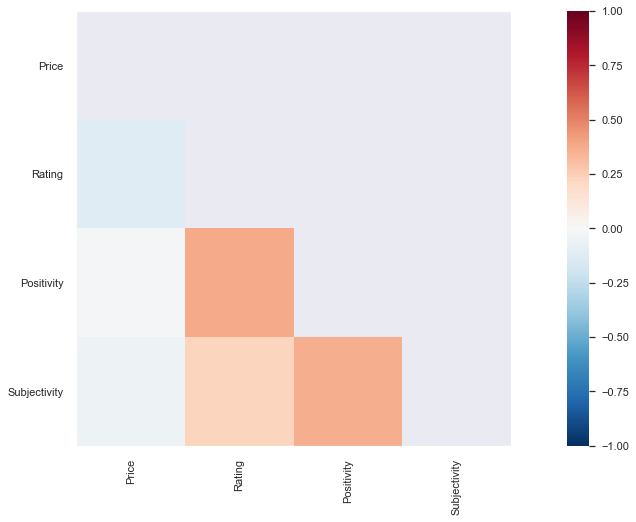

In [149]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = came[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data


In [150]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(came['Rating'],came['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(came['Subjectivity'],came['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(came['Rating'],came['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.375
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.36
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.224
Subjectivity/Rating Probability is: 0.014


The camera of the iphone was found to have a roughly neutral subjectivity score with a slightly increasing positivity score over the time series analysis, although there was great variance. Most of the reviews were neutral at worst with some outliers hitting -.4, which I would consider moderately negative.

As price increased, positivity had a slight decrease, although it was effectively neutral.

As subjectivity increased, so did positivity. This indicated that the more opinionated people were about the appearance, the more positive those opinions were.

The histogram about appearance was very much uniform, with a peak at 0, as many reviews were either in other languages or had nothing that sentiment analysis could pick up on. the same was true in regards to subjectivity scores.

Correlation testing found some slight to moderate links, most strongly between positivity and subjectivity, with an r-squared of .36. The links between rating and positivity scored .375 and subjectivity and rating scored .224. The likelihood of all of these occurring by random chance was less than .014 percent.

### Speed

In [151]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
spee['Score'] = spee['Review'].apply(ss)
spee['Positivity'] = spee['Score'].apply(lambda x:x[0])
spee['Subjectivity'] = spee['Score'].apply(lambda x:x[1])
spee['Topic'] = 'Speed'
spee.sample(n=2)

Item #  Brand  \
1223  B07KFNRQ5S  Apple   
25    B0775451TT  Apple   

                                                                  Model  \
1223  Apple iPhone Xs Max, 256GB, Space Gray - Fully Unlocked (Renewed)   
25        Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)   

      Reviews   Price  Rating       Date  Verified       Review Title  \
1223      230    0.00       5 2019-09-20      True  Excellent product   
25        436  749.99       1 2019-09-19      True  Not as they claim   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Review  \
1223                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               work perform describ iphon way faster old iphon 6plu although exact dimens old phone except camera lens back otherwis excel product thank   
25    item claim function like new devic true let walk dramat tragedi detail monitor packag moment purchas accid bright sunni day wait mailbox deliveri truck cruis grab packag ran insid ecstat prospect newest gadget gaze chrome plate beauti knew love first sight true set electron treasur tap set feast eye sight rare see iphon batteri full capac reader proudli gleam 100 like new condit sight met eye gave horror would believ eighti three percent mind race alreadi vow til death us part look bride screen realiz need second doctor opinion schedul appoint soon return honeymoon appl memori hospit settl uneasi vacat new love tragedi struck start edit slow motion video man break egg forehead screen flicker die gentli tri shake awak hit power volum button mainli volum button obvious huge plu wife rush er nearest appl memori hospit fear worst worst got heart known smart board fail would never speak never saw eye open si

In [152]:
spee.describe()

Reviews       Price     Rating     Helpful  Positivity  Subjectivity
count   66.000000   66.000000  66.000000   66.000000   66.000000     66.000000
mean   311.363636  192.270758   4.015152   21.893939    0.193734      0.489453
std    129.083591  328.945029   1.375527   38.978151    0.195020      0.149191
min      1.000000    0.000000   1.000000    1.000000   -0.300000      0.162500
25%    198.000000    0.000000   3.000000    1.000000    0.087464      0.400000
50%    230.000000    0.000000   5.000000    5.500000    0.155840      0.468950
75%    436.000000  551.250000   5.000000   13.000000    0.330630      0.583750
max    442.000000  749.990000   5.000000  146.000000    0.600000      0.824242

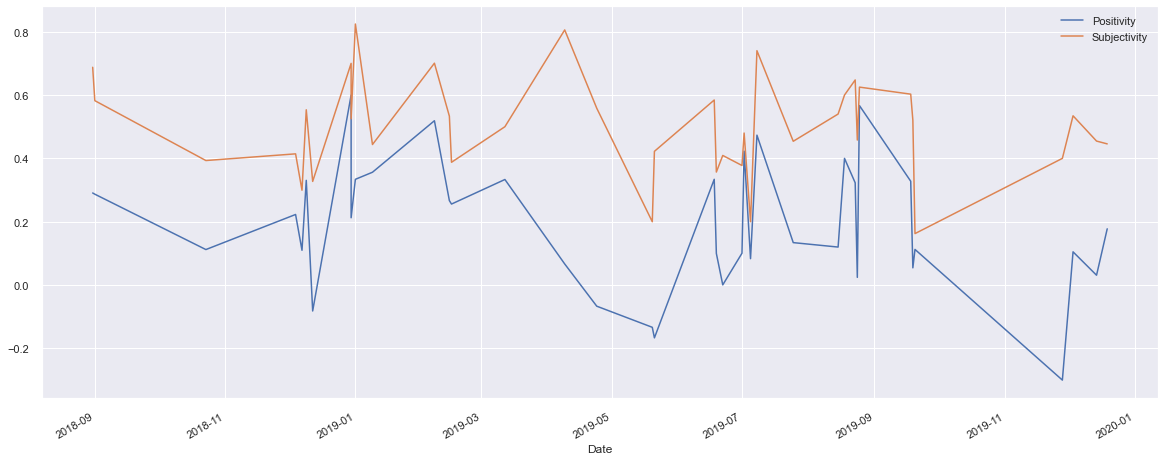

In [153]:
#Time series
spee_ts = spee.plot(x='Date', y=ylist)

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

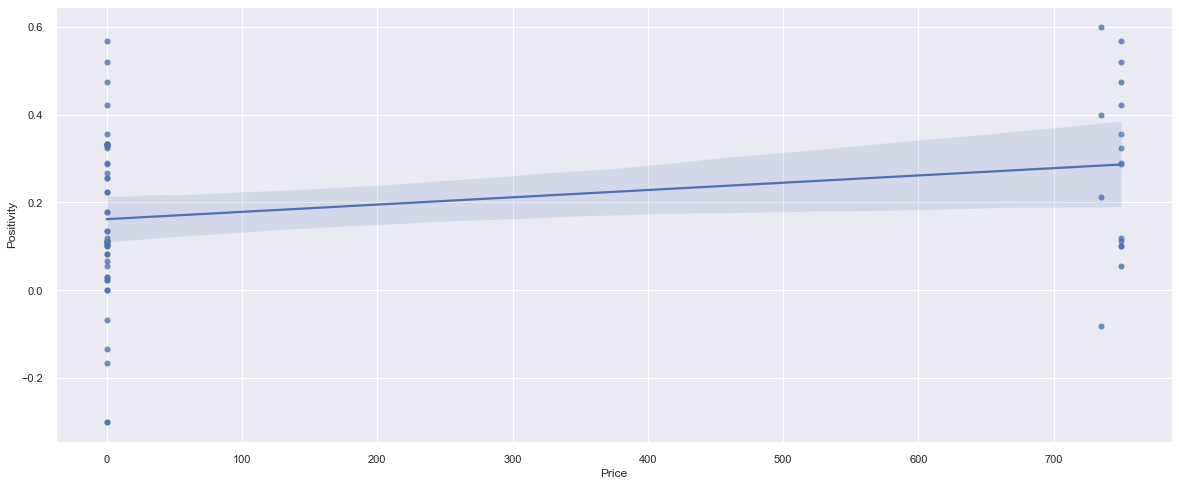

In [154]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=spee)

<AxesSubplot:xlabel='Subjectivity', ylabel='Positivity'>

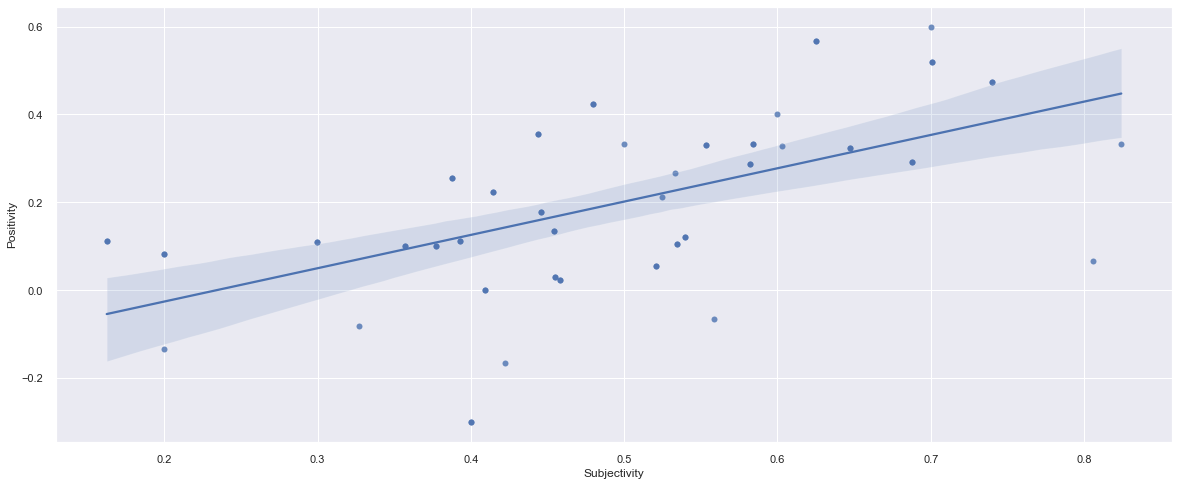

In [155]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=spee)

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/3839862875.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


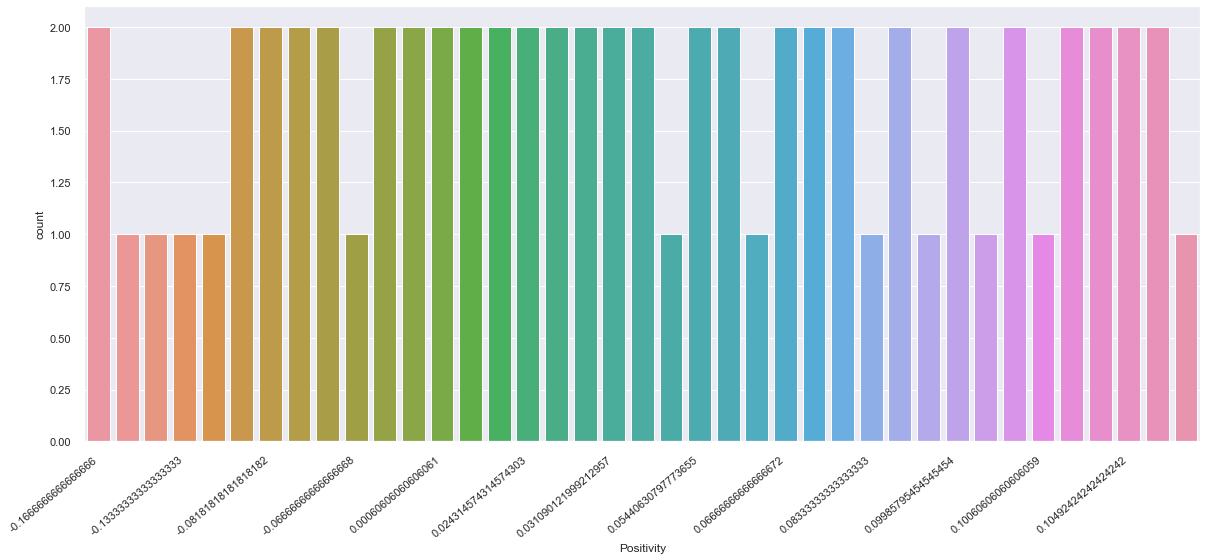

In [156]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(spee['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/2249267194.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


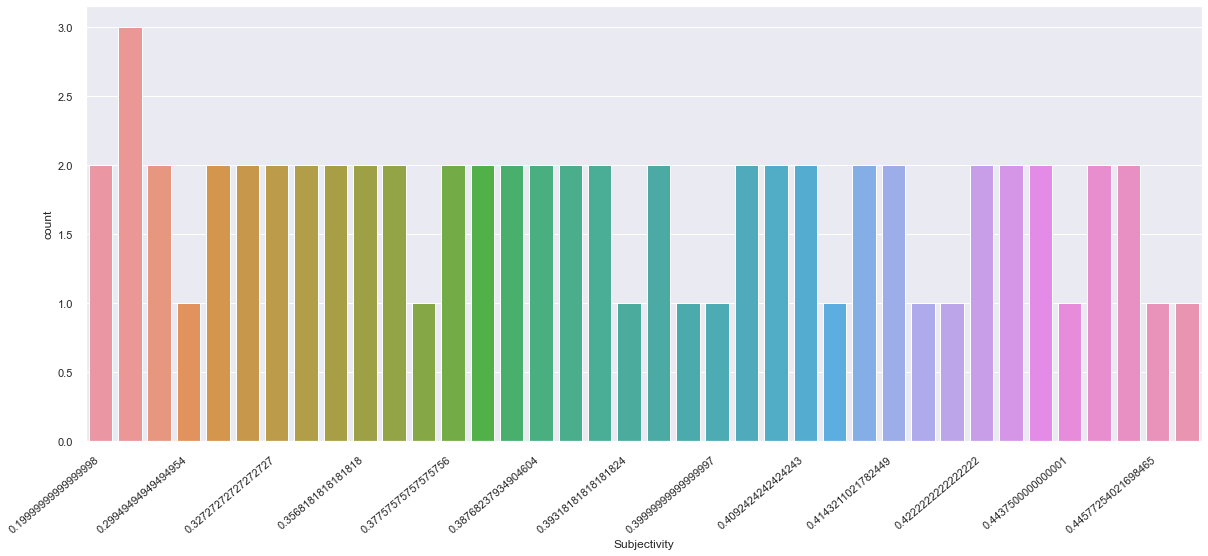

In [157]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(spee['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 7.49990000e+02,  5.00000000e+00,  1.12121212e-01,
         3.93181818e-01],
       [ 7.49990000e+02,  5.00000000e+00,  3.56250000e-01,
         4.43750000e-01],
       [ 7.49990000e+02,  5.00000000e+00,  4.22857143e-01,
         4.80000000e-01],
       [ 7.49990000e+02,  1.00000000e+00,  9.98579545e-02,
         3.56818182e-01],
       [ 7.49990000e+02,  1.00000000e+00,  5.44063080e-02,
         5.20470006e-01],
       [ 7.49990000e+02,  5.00000000e+00,  1.20000000e-01,
         5.40000000e-01],
       [ 7.49990000e+02,  5.00000000e+00,  5.66666667e-01,
         6.25000000e-01],
       [ 7.49990000e+02,  4.00000000e+00,  4.73333333e-01,
         7.40000000e-01],
       [ 7.49990000e+02,  4.00000000e+00,  1.00606061e-01,
         3.77575758e-01],
       [ 7.49990000e+02,  5.00000000e+00,  2.90740741e-01,
         6.87654321e-01],
       [ 7.49990000e+02,  5.00000000e+00,  5.18855219e-01,
         7.00505051e-01],
       [ 7.49990000e+02,  5.00000000e+00,  3.22857143e-01,
      

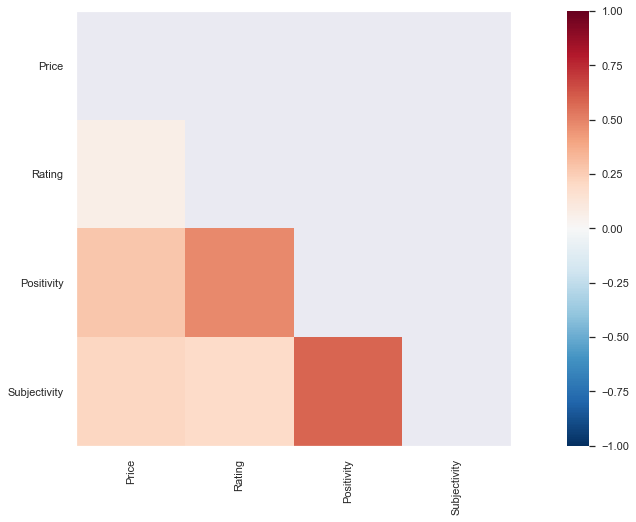

In [158]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = spee[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data


In [159]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(spee['Rating'],spee['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(spee['Subjectivity'],spee['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(spee['Rating'],spee['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.48
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.58
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.188
Subjectivity/Rating Probability is: 0.131


The speed of the iphone was found to have a lowered subjectivity score with a relatively neutral positivity score over the time series analysis, with little variance. Most of the reviews were neutral at worst with some outliers hitting -.25ish toward the end.

As price increased, positivity had a slight increase.

As subjectivity increased, positivity sharply increased along with it. This indicated that the more opinionated people were about the appearance, the more positive those opinions were.

The histogram about appearance was very much uniform for both positivity and subjectivity. This indicated that people were quite varied with their opinions between the minimum and maximum opinions. There were not many outliers.

Correlation testing found some slight to moderately strong links, most intensely so between positivity and subjectivity, with an r-squared of .58 and an associated p value of 0.0. The links between rating and positivity scored .48, also with an associated p value of less than 0.0. Finally, subjectivity and rating scored .188. The likelihood of this happening by random chance is .13.

### Storage

In [160]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
stor['Score'] = stor['Review'].apply(ss)
stor['Positivity'] = stor['Score'].apply(lambda x:x[0])
stor['Subjectivity'] = stor['Score'].apply(lambda x:x[1])
stor['Topic'] = 'Storage'
stor.sample(n=2)

Item #  Brand  \
1372  B07KKL5KGG  Apple   
381   B077578W38  Apple   

                                                           Model  Reviews  \
1372     Apple iPhone XS, 256GB, Gold - Fully Unlocked (Renewed)      198   
381   Apple iPhone X, Unlocked 5.8", 64GB - Space Gray (Renewed)      442   

      Price  Rating       Date  Verified  \
1372    0.0       2 2019-11-14      True   
381     0.0       1 2019-06-30      True   

                                                                            Review Title  \
1372  Please be careful... speaker distorts over 50% volume And battery life is horrible   
381                                                                         No Promises!   

                                                                                                                                                                                                                                                                                                                                                                                                                                              Review  \
1372                        skeptic order phone read comment gave shot order gold xs 256gb receiv product start use realiz batteri decreas rapidli rush check batteri life show 96 receiv updat appl kinda fix batteri life problem buy batteri case order use full day fault increas volum 50 els speaker would start distort horribl contact amazon partial refund sinc could return phone current busi trip got possibl pleas care u purchas item   
381   expect certifi refurbish product order trademor last long jan 22 year order iphonex 256 gb arriv good shape small scratch screen otherwis function fine 5 month gentl use never drop expens protect case never wet etc complet die charger overnight contact trademor said 90 day noth made offer troubleshoot taken repair shop found processor gone bad spend almost much brand new phone wish done first place would given us appl guarante   

      Helpful                                       Score  Positivity  \
1372      2.0   (0.08333333333333333, 0.4166666666666667)    0.083333   
381       7.0  (0.07530303030303032, 0.40212121212121216)    0.075303   

      Subjectivity    Topic  
1372      0.416667  Storage  
381       0.402121  Storage

In [161]:
stor.describe()

Reviews       Price     Rating    Helpful  Positivity  Subjectivity
count   33.000000   33.000000  33.000000  33.000000   33.000000     33.000000
mean   302.303030  158.180303   3.848485  10.515152    0.162180      0.481715
std    112.823835  309.595589   1.563674  22.974335    0.234762      0.198946
min    139.000000    0.000000   1.000000   1.000000   -0.500000      0.000000
25%    230.000000    0.000000   2.000000   1.000000    0.075303      0.416667
50%    230.000000    0.000000   5.000000   2.000000    0.177652      0.454653
75%    436.000000    0.000000   5.000000   4.000000    0.270170      0.527778
max    442.000000  749.990000   5.000000  88.000000    0.634091      1.000000

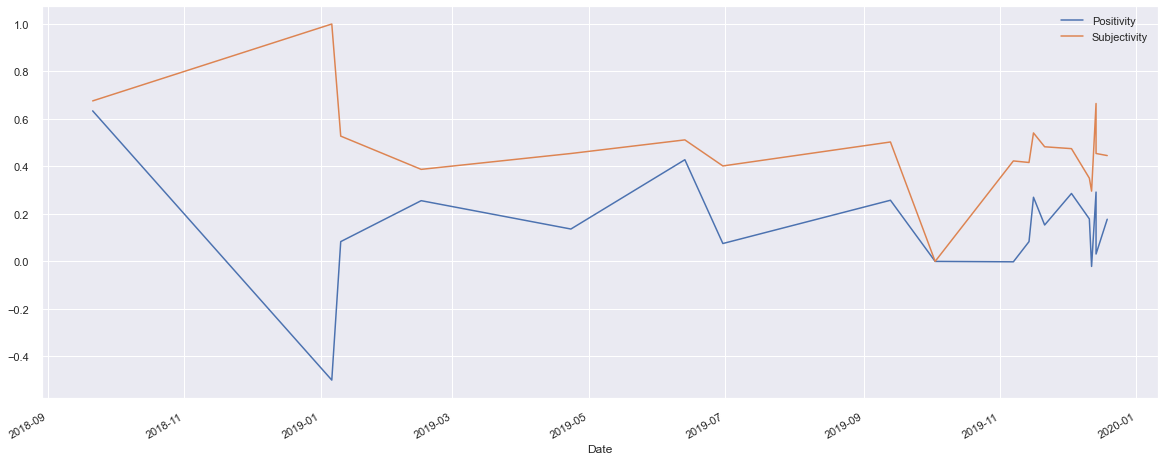

In [162]:
#Time series
stor_ts = stor.plot(x='Date', y=ylist)

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

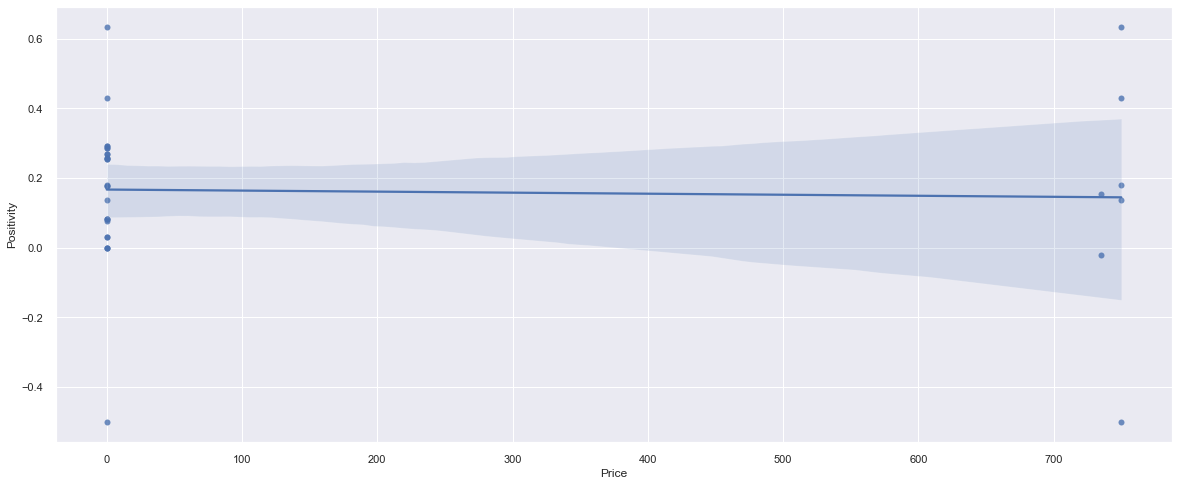

In [163]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=stor)

<AxesSubplot:xlabel='Subjectivity', ylabel='Positivity'>

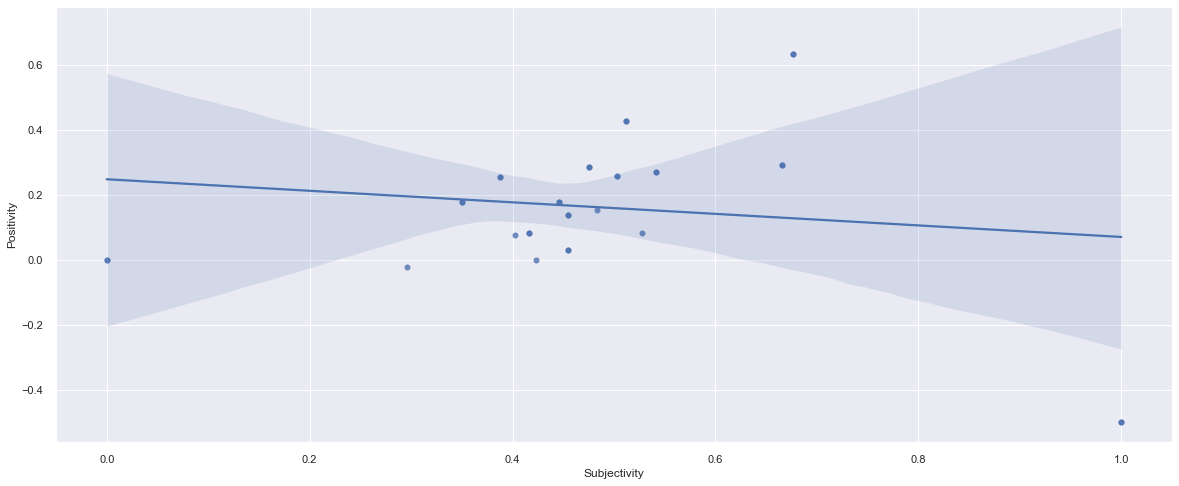

In [164]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=stor)

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1286771051.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


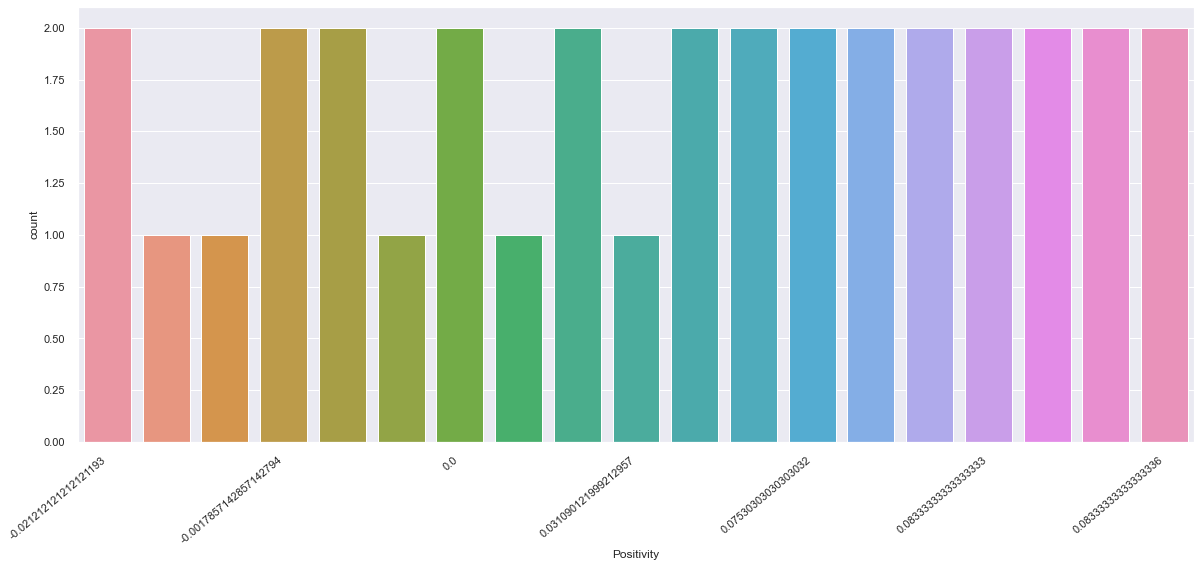

In [165]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(stor['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1558274500.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


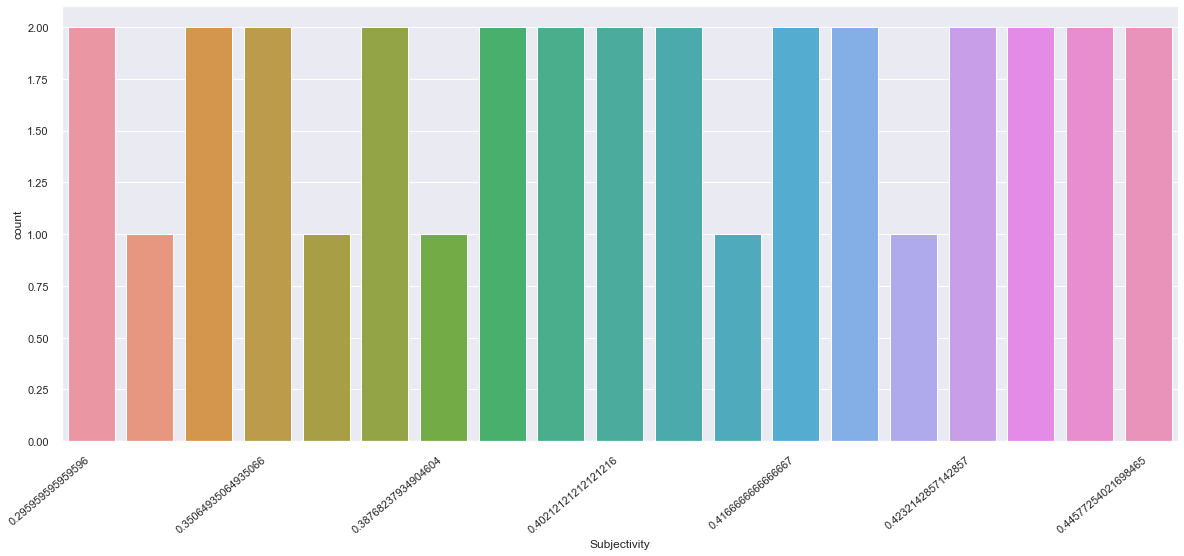

In [166]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(stor['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 7.49990000e+02,  5.00000000e+00,  4.28282828e-01,
         5.11868687e-01],
       [ 7.49990000e+02,  4.00000000e+00,  1.79004329e-01,
         3.50649351e-01],
       [ 7.49990000e+02,  5.00000000e+00,  1.36363636e-01,
         4.54545455e-01],
       [ 7.49990000e+02,  5.00000000e+00,  6.34090909e-01,
         6.76136364e-01],
       [ 7.49990000e+02,  1.00000000e+00, -5.00000000e-01,
         1.00000000e+00],
       [ 0.00000000e+00,  4.00000000e+00,  8.33333333e-02,
         5.27777778e-01],
       [ 0.00000000e+00,  5.00000000e+00, -1.78571429e-03,
         4.23214286e-01],
       [ 0.00000000e+00,  1.00000000e+00,  7.53030303e-02,
         4.02121212e-01],
       [ 7.35000000e+02,  4.00000000e+00,  1.53306716e-01,
         4.82831695e-01],
       [ 7.35000000e+02,  5.00000000e+00, -2.12121212e-02,
         2.95959596e-01],
       [ 0.00000000e+00,  5.00000000e+00,  4.28282828e-01,
         5.11868687e-01],
       [ 0.00000000e+00,  4.00000000e+00,  1.79004329e-01,
      

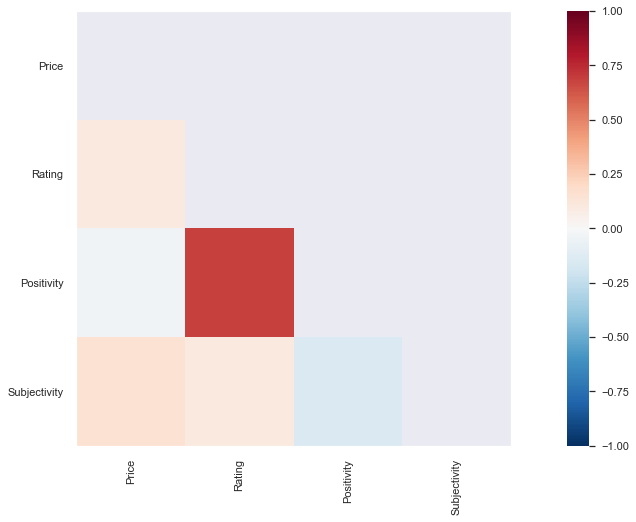

In [167]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = stor[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data


In [168]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(stor['Rating'],stor['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(stor['Subjectivity'],stor['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(stor['Rating'],stor['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.687
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: -0.151
Subjectivity/Positivity Probability is: 0.403
Subjectivity/Rating R is: 0.099
Subjectivity/Rating Probability is: 0.585


The storage of the iphone was found to have a lowered subjectivity score with a relatively neutral positivity score over the time series analysis, with little variance. Most of the reviews were slightly decreasing for subjectivity. The scores for both positivity and subjectivity were relatively steady.

As price increased, positivity had no decrease nor decrease. It was nearly completely steady.

As subjectivity increased, positivity increased along with it. This indicated that the more opinionated people were about the appearance, the more positive those opinions were.

The histogram about appearance was very much uniform for positivity and subjectivity with a large emergence at 0. This could very well be because we could not parse through reviews of other languages. This same explanation could hold true for subjectivity too.

Correlation testing found some slight to moderately strong links, most intensely so between positivity and rating, with an r-squared of .687 and an associated p value of 0.0. The links between subjectivity and positivity scored .151, also with an associated p value of .403 Finally, subjectivity and rating scored .099. The associated p-value was .585.

### Software

In [169]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
soft['Score'] = soft['Review'].apply(ss)
soft['Positivity'] = soft['Score'].apply(lambda x:x[0])
soft['Subjectivity'] = soft['Score'].apply(lambda x:x[1])
soft['Topic'] = 'Storage'
soft.sample(n=2)

Item #  Brand  \
1790  B07RT1X4FJ  Apple   
376   B077578W38  Apple   

                                                           Model  Reviews  \
1790           Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)      198   
376   Apple iPhone X, Unlocked 5.8", 64GB - Space Gray (Renewed)      442   

      Price  Rating       Date  Verified  \
1790    0.0       1 2019-12-08      True   
376     0.0       5 2019-11-07      True   

                                 Review Title  \
1790                      Only disappointment   
376   iPhone X gray 64gb unlocked- NOT a fake   

                                                                                                                                                                                                                                                                                                                                                  Review  \
1790                                                                                                                                                                                                                                  phone screen pretti rough shape got expect much spent 200 new screen found phone warp condit promis disappoint buy   
376   product came follow iphon x 64 gb unlock work great batteri life 97 basic charger block expect iphon accessori headphon dongl iphon box phone current work smoothli updat io 13 2 mean fake check imei io icloud appl id updat novemb 20th 17 day later phone still work issu updat decemb 19th phone still work issu batteri screen updat io issu   

      Helpful                                         Score  Positivity  \
1790      2.0    (-0.02121212121212122, 0.3181818181818182)   -0.021212   
376       7.0  (-0.0017857142857142794, 0.4232142857142857)   -0.001786   

      Subjectivity    Topic  
1790      0.318182  Storage  
376       0.423214  Storage

In [170]:
soft.describe()

Reviews       Price      Rating     Helpful  Positivity  \
count  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   323.786047  159.905209    3.144186   18.334884    0.151777   
std    122.640234  307.224154    1.783269   48.657197    0.226582   
min      1.000000    0.000000    1.000000    1.000000   -0.700000   
25%    230.000000    0.000000    1.000000    1.000000    0.003939   
50%    436.000000    0.000000    3.000000    3.000000    0.134028   
75%    436.000000    0.000000    5.000000   10.000000    0.289120   
max    442.000000  749.990000    5.000000  436.000000    0.800000   

       Subjectivity  
count    215.000000  
mean       0.452261  
std        0.216748  
min        0.000000  
25%        0.336540  
50%        0.457900  
75%        0.600000  
max        1.000000

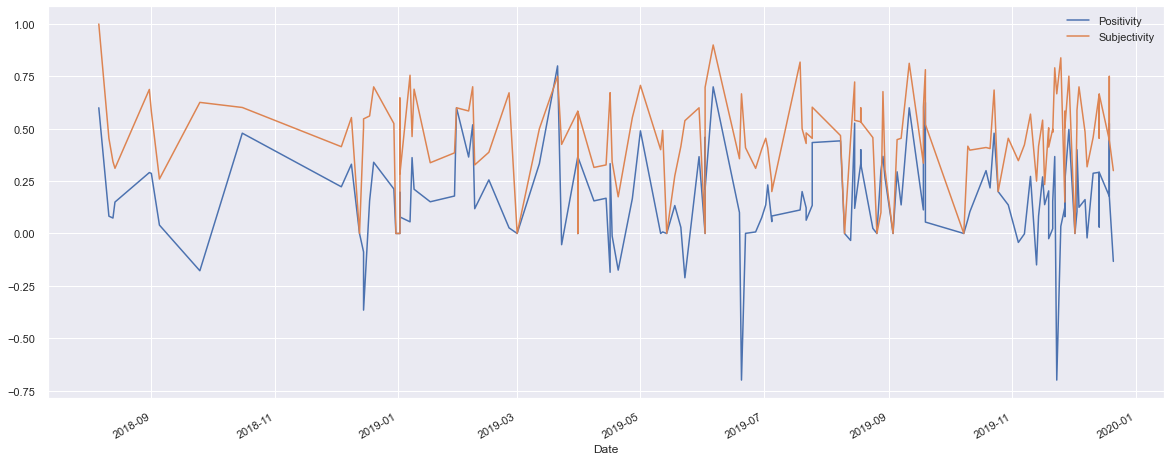

In [171]:
#Time series
soft_ts = soft.plot(x='Date', y=ylist)

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

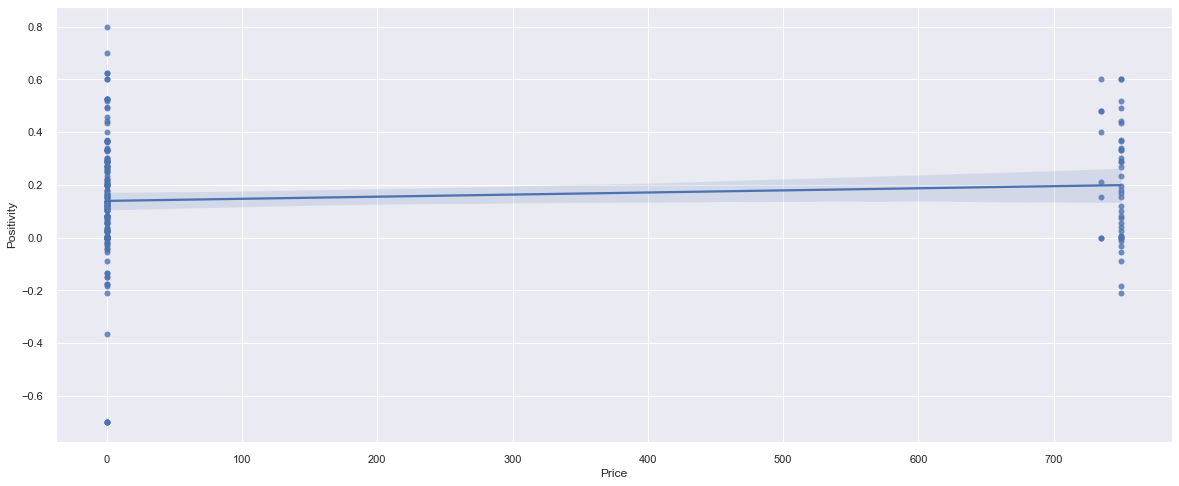

In [172]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=soft)

<AxesSubplot:xlabel='Subjectivity', ylabel='Positivity'>

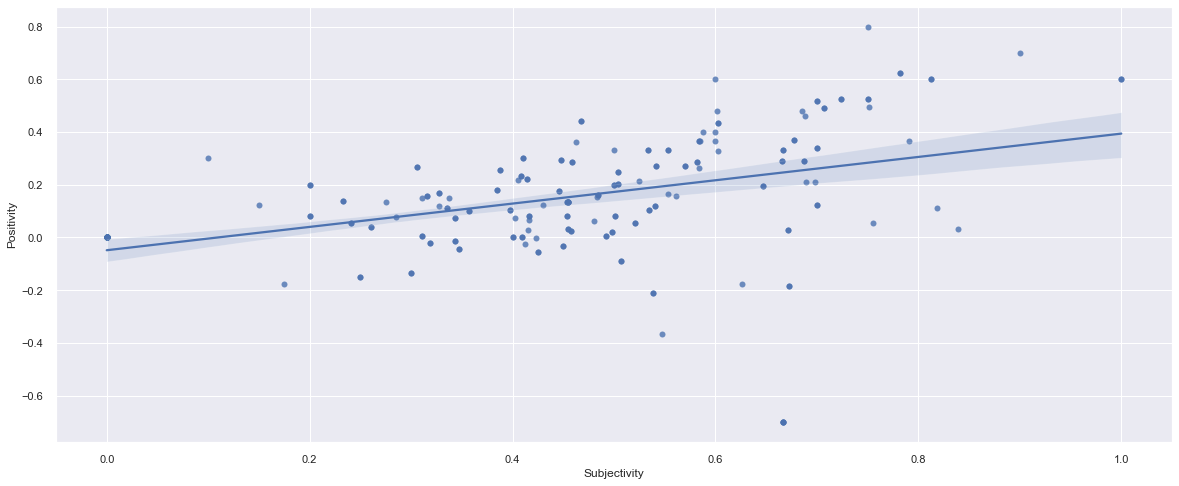

In [173]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=soft)

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/3293878266.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


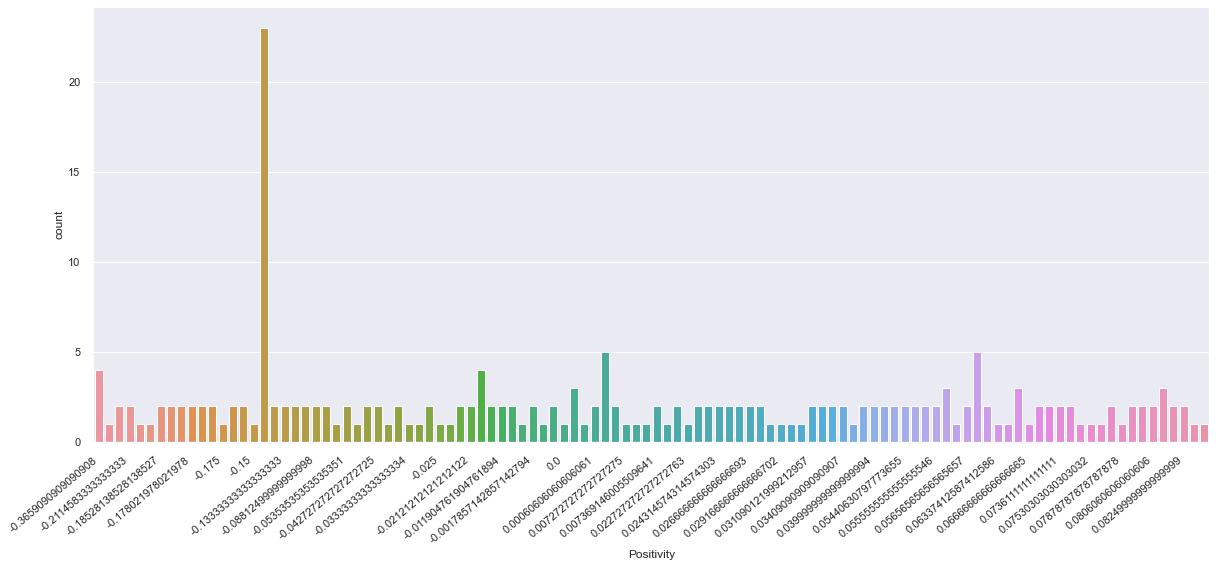

In [174]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(soft['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1682912002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


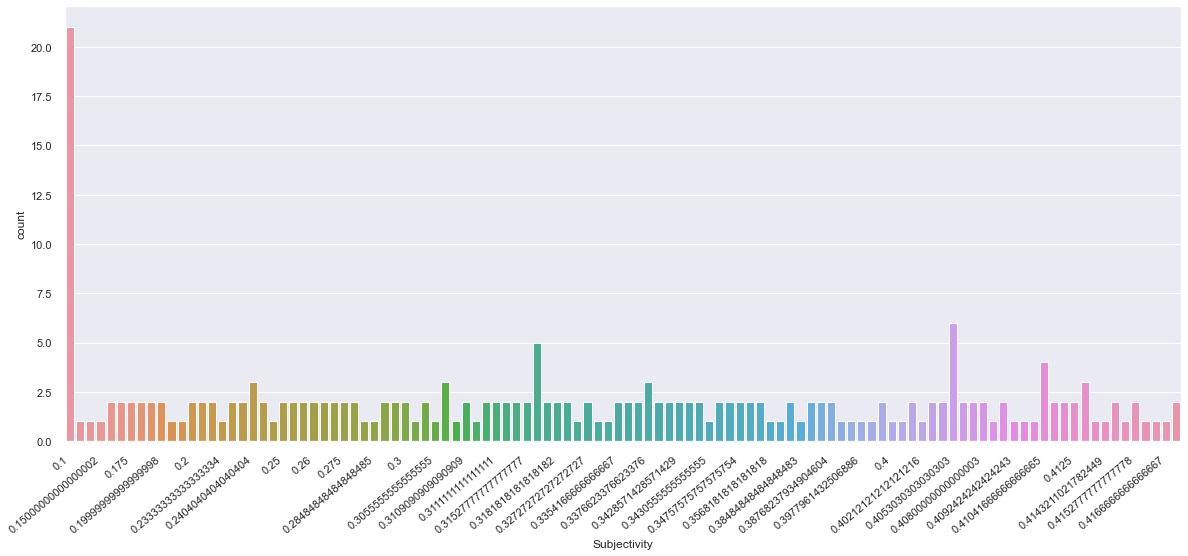

In [175]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(soft['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 7.49990000e+02,  1.00000000e+00, -1.85281385e-01,
         6.72077922e-01],
       [ 7.49990000e+02,  5.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 7.49990000e+02,  1.00000000e+00,  1.55555556e-01,
         3.15277778e-01],
       [ 7.49990000e+02,  1.00000000e+00, -8.81250000e-02,
         5.06875000e-01],
       [ 7.49990000e+02,  2.00000000e+00,  1.96666667e-01,
         6.46666667e-01],
       [ 7.49990000e+02,  3.00000000e+00,  4.34098639e-01,
         6.02947846e-01],
       [ 7.49990000e+02,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 7.49990000e+02,  1.00000000e+00,  9.98579545e-02,
         3.56818182e-01],
       [ 7.49990000e+02,  1.00000000e+00,  5.44063080e-02,
         5.20470006e-01],
       [ 7.49990000e+02,  5.00000000e+00,  7.36914601e-03,
         4.92493113e-01],
       [ 7.49990000e+02,  5.00000000e+00,  1.20000000e-01,
         5.40000000e-01],
       [ 7.49990000e+02,  5.00000000e+00,  4.42171717e-01,
      

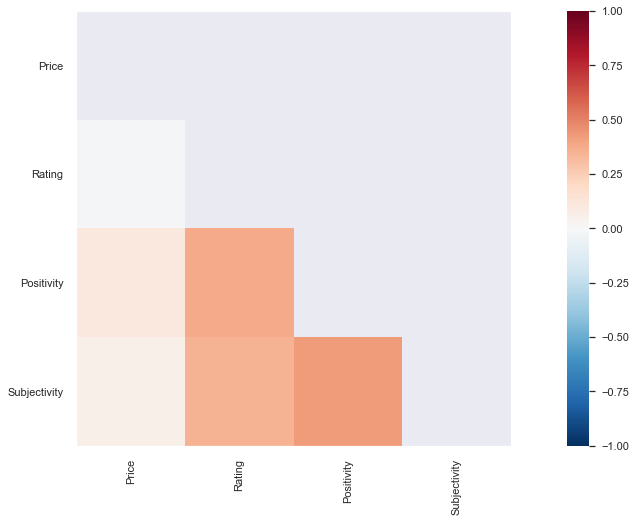

In [176]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = soft[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data


In [177]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(soft['Rating'],soft['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(soft['Subjectivity'],soft['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(soft['Rating'],soft['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.377
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.423
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.35
Subjectivity/Rating Probability is: 0.0


The software of the iphone was found to have a neutral positivity and subjectivity scores.

As price increased, positivity had no decrease nor decrease. It was nearly completely steady.

As subjectivity increased, positivity increased along with it. This indicated that the more opinionated people were about the appearance, the more positive those opinions were.

The histogram about appearance was very much uniform for positivity and subjectivity with a large emergence at 0. This could very well be because we could not parse through reviews of other languages. This same explanation could hold true for subjectivity too.

Correlation testing found some slight to moderately strong links, most intensely so between positivity and subjectivity. The links between rating and positivity scored .377. Finally, subjectivity and rating scored .35. The associated p-value of all three of these correlation testings found a probability of this at 0.0.

### Music

In [178]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
musi['Score'] = musi['Review'].apply(ss)
musi['Positivity'] = musi['Score'].apply(lambda x:x[0])
musi['Subjectivity'] = musi['Score'].apply(lambda x:x[1])
musi['Topic'] = 'Music'
musi.sample(n=2)

Item #  Brand  \
391   B077578W38  Apple   
1778  B07RT1X4FJ  Apple   

                                                           Model  Reviews  \
391   Apple iPhone X, Unlocked 5.8", 64GB - Space Gray (Renewed)      442   
1778           Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)      198   

      Price  Rating       Date  Verified                Review Title  \
391     0.0       3 2019-04-24      True                   Scratches   
1778    0.0       2 2019-12-14     False  Screen and speaker problem   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Review  \
391                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                see ton scratch light shine screen phone got definit drop scuf blatantli abus seller clean screen fail clean speaker charger port brand new phone 100 would suggest buy new phone   
1778  ok got space gray iphon xs 256gb happi get came odd box realli care got phone ding scratch outer metal case phone tell front glass lcd scream replac screen kinda drag imag like old comput imag stay second one thing annoy second thing sound like bottom speaker broken one point bought anoth one realli cheap speaker certain point pitch sound sound good speaker next face id camera work perfectli one bottom phone realli bad person care ding scratch outer metal frame phone realli annoy replac speaker bad one get cheaper lcd screen save littl bit money mostli notic bad cream scroll instagram twitter youtub scroll notic problem buy new replac part bad one also batteri get kinda worm hot charg facetim sometim randomli may happen run power chang may normal sure batteri stay charg day worri batteri   

      Helpful                                        Score  Positivity  \
391       3.0      (0.151010101010101, 0.5515151515151515)     0.15101   
1778      1.0  (0.031090121999212957, 0.45465285976649616)     0.03109   

      Subjectivity  Topic  
391       0.551515  Music  
1778      0.454653  Music

In [179]:
musi.describe()

Reviews       Price     Rating     Helpful  Positivity  Subjectivity
count   37.000000   37.000000  37.000000   37.000000   37.000000     37.000000
mean   353.675676  182.430000   3.324324   20.135135    0.203561      0.493636
std    109.134487  326.214778   1.582088   36.750028    0.222513      0.213448
min    198.000000    0.000000   1.000000    1.000000   -0.237784      0.000000
25%    230.000000    0.000000   2.000000    2.000000    0.075000      0.414321
50%    436.000000    0.000000   3.000000    6.000000    0.222876      0.467424
75%    436.000000    0.000000   5.000000   13.000000    0.322857      0.622917
max    442.000000  749.990000   5.000000  146.000000    1.000000      1.000000

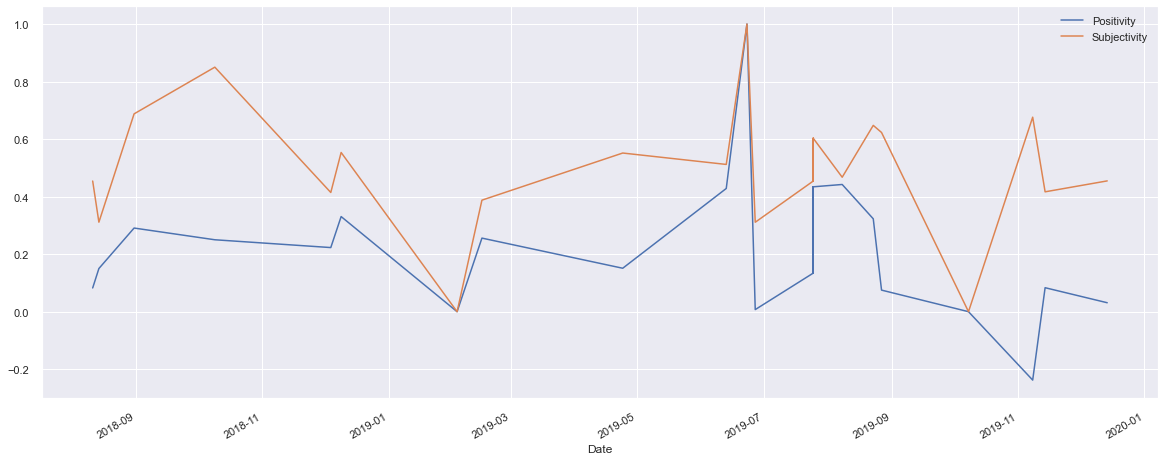

In [180]:
#Time series
musi_ts = musi.plot(x='Date', y=ylist)

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

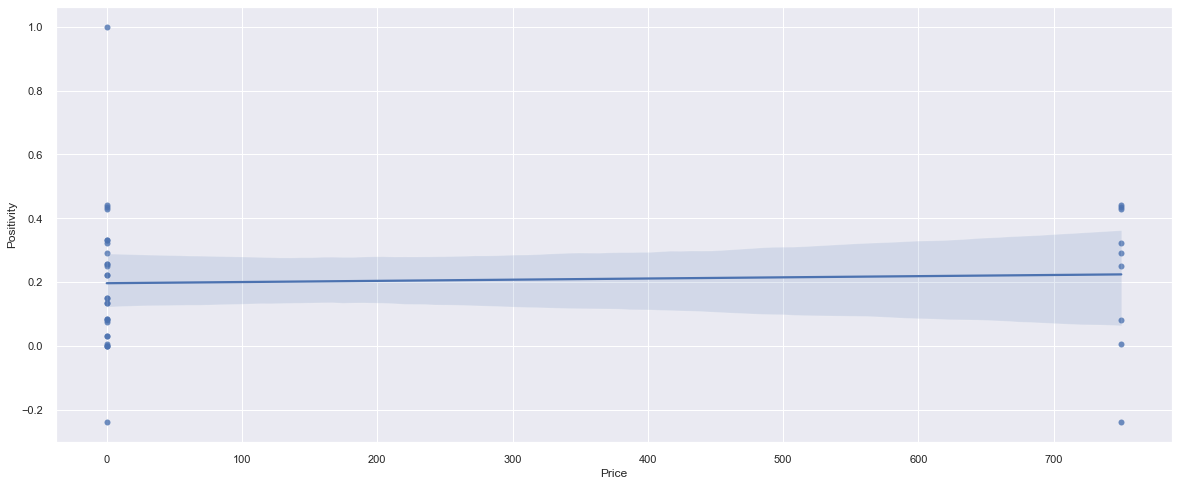

In [181]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=musi)

<AxesSubplot:xlabel='Subjectivity', ylabel='Positivity'>

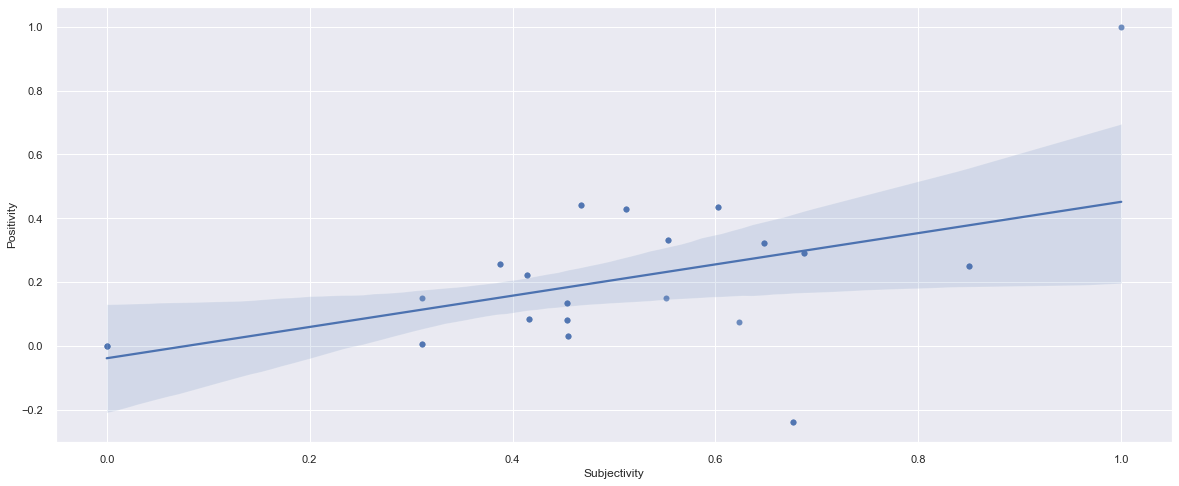

In [182]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=musi)

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/2386641243.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


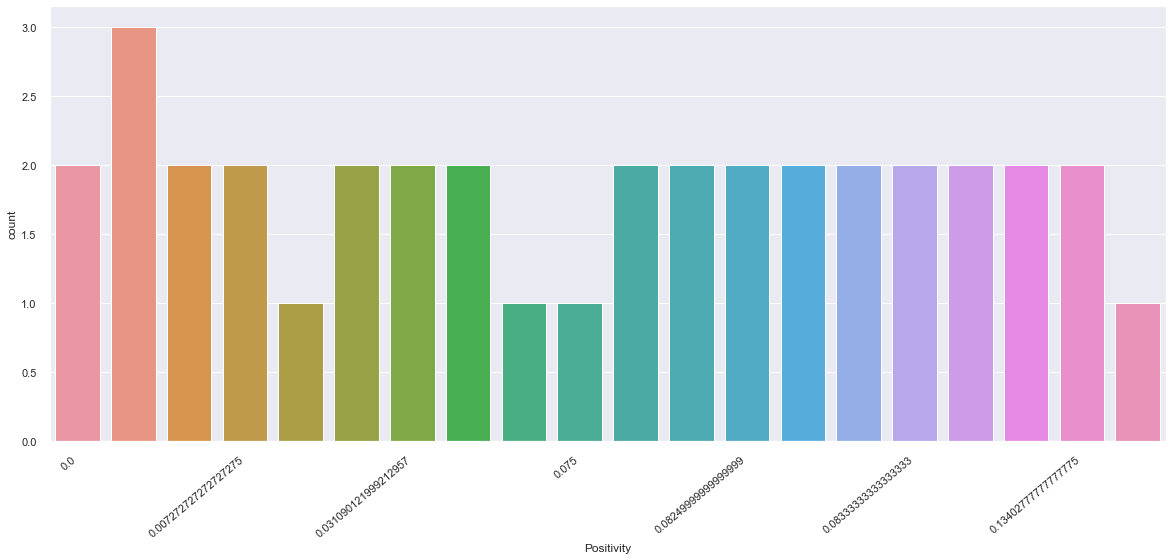

In [183]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(musi['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/3883961421.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


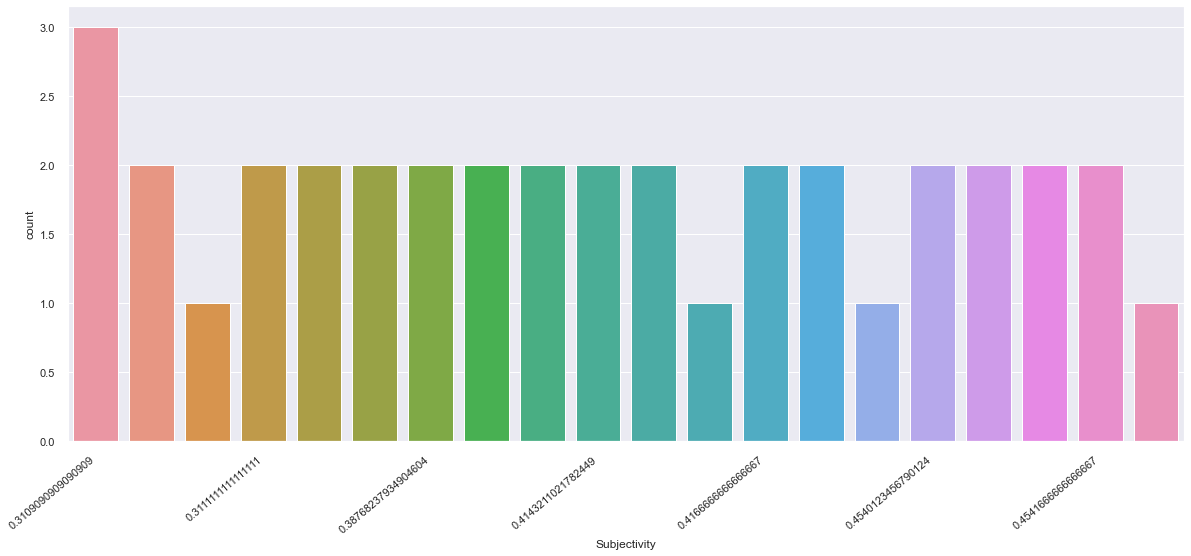

In [184]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(musi['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 7.49990000e+02,  5.00000000e+00, -2.37784091e-01,
         6.76136364e-01],
       [ 7.49990000e+02,  3.00000000e+00,  4.34098639e-01,
         6.02947846e-01],
       [ 7.49990000e+02,  2.00000000e+00,  2.50000000e-01,
         8.50000000e-01],
       [ 7.49990000e+02,  5.00000000e+00,  4.42171717e-01,
         4.67424242e-01],
       [ 7.49990000e+02,  5.00000000e+00,  4.28282828e-01,
         5.11868687e-01],
       [ 7.49990000e+02,  5.00000000e+00,  2.90740741e-01,
         6.87654321e-01],
       [ 7.49990000e+02,  1.00000000e+00,  7.27272727e-03,
         3.10909091e-01],
       [ 7.49990000e+02,  5.00000000e+00,  3.22857143e-01,
         6.47619048e-01],
       [ 7.49990000e+02,  2.00000000e+00,  8.25000000e-02,
         4.54166667e-01],
       [ 0.00000000e+00,  1.00000000e+00,  1.50000000e-01,
         3.11111111e-01],
       [ 0.00000000e+00,  3.00000000e+00,  1.51010101e-01,
         5.51515152e-01],
       [ 0.00000000e+00,  3.00000000e+00,  7.50000000e-02,
      

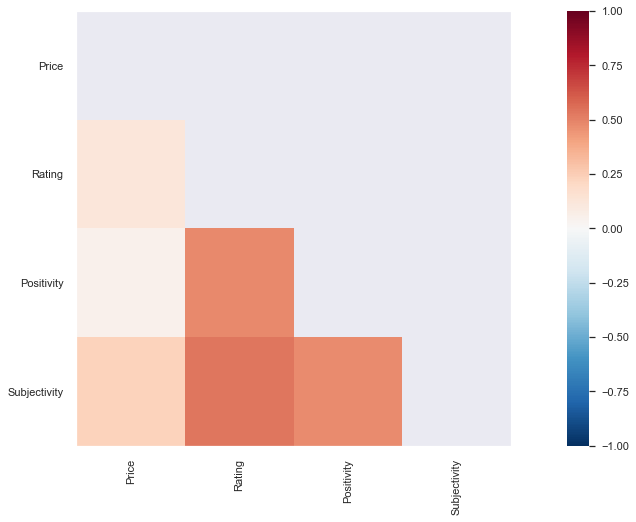

In [185]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = musi[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data


In [186]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(musi['Rating'],musi['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(musi['Subjectivity'],musi['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(musi['Rating'],musi['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.477
Rating/Positivity Probability is: 0.003
Subjectivity/Positivity R is: 0.47
Subjectivity/Positivity Probability is: 0.003
Subjectivity/Rating R is: 0.532
Subjectivity/Rating Probability is: 0.001


The music of the iphone was found to have a slightly decreased positivity and an increased subjectivity score. They both appeared to be quite neutral until the last year when variance increased. This could perhaps be due to a potential increased number of reviews as of recently.

As price increased, positivity had no decrease nor decrease. It was nearly completely steady.

As subjectivity increased, positivity slightly increased along with it. This indicated that the more opinionated people were about the appearance, the more positive those opinions were, albeit not as much as that of other aspects.

The histogram about appearance was very much uniform for positivity and subjectivity with a large emergence at 0. This could very well be because we could not parse through reviews of other languages. This same explanation could hold true for subjectivity too.

Correlation testing found some slight to moderately strong links, most intensely so between positivity and rating at .477 and a p-value of .003. The links between subjectivity and positivity scored .47 and an associated probability of .003. Finally, subjectivity and rating scored .532 with an associated p-value of .001.

### Screen

In [187]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
scre['Score'] = scre['Review'].apply(ss)
scre['Positivity'] = scre['Score'].apply(lambda x:x[0])
scre['Subjectivity'] = scre['Score'].apply(lambda x:x[1])
scre['Topic'] = 'Screen'
scre.sample(n=2)

Item #  Brand  \
372   B077578W38  Apple   
1224  B07KFNRQ5S  Apple   

                                                                  Model  \
372          Apple iPhone X, Unlocked 5.8", 64GB - Space Gray (Renewed)   
1224  Apple iPhone Xs Max, 256GB, Space Gray - Fully Unlocked (Renewed)   

      Reviews  Price  Rating       Date  Verified  \
372       442    0.0       1 2019-05-20      True   
1224      230    0.0       5 2019-12-13      True   

                                                                                        Review Title  \
372                                                                              Doesn’t Work At all   
1224  Renewed iPhone XS MAX 264gb.. great deal.. 1 week of use and so far haven't noticed any issues   

                                                                                                                                                                                                                                                 Review  \
372   pick 2 day ship get deliv 5 day later upon receiv tri power respons went charg charger given get charg screen 30 minut use charger 4 hour result qualiti charger charger brick poor come earpod sent back hope get refund quickli amazon guarante   
1224                                                   look like new littl bit dust top front microphon fine bristl brush help get 90 dust batteri work great screen unscratch back unscratch love great upgrad never buy new iphon amazon renew way go   

      Helpful                                        Score  Positivity  \
372      21.0  (-0.13333333333333333, 0.19999999999999998)   -0.133333   
1224      1.0    (0.41117424242424244, 0.5011363636363636)    0.411174   

      Subjectivity   Topic  
372       0.200000  Screen  
1224      0.501136  Screen

In [188]:
scre.describe()

Reviews       Price      Rating     Helpful  Positivity  \
count  227.000000  227.000000  227.000000  227.000000  227.000000   
mean   339.444934  190.768943    3.215859   18.493392    0.161269   
std    126.562309  326.374471    1.745313   46.907588    0.240562   
min      1.000000    0.000000    1.000000    1.000000   -0.700000   
25%    198.000000    0.000000    1.000000    1.000000    0.000000   
50%    436.000000    0.000000    4.000000    3.000000    0.136364   
75%    436.000000  735.000000    5.000000   11.000000    0.300000   
max    442.000000  749.990000    5.000000  436.000000    0.800000   

       Subjectivity  
count    227.000000  
mean       0.443710  
std        0.221196  
min        0.000000  
25%        0.326136  
50%        0.475000  
75%        0.583333  
max        0.900000

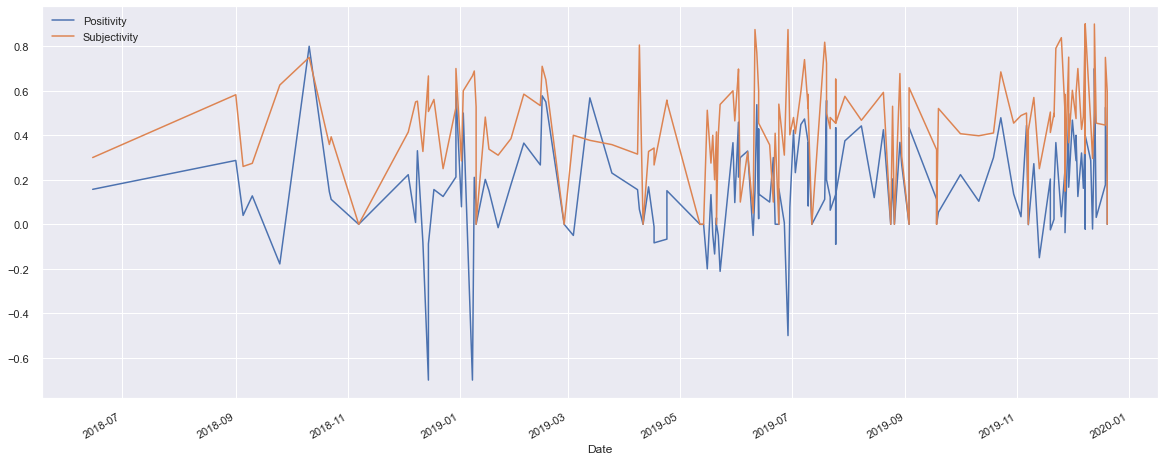

In [189]:
#Time series
scre_ts = scre.plot(x='Date', y=ylist)

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

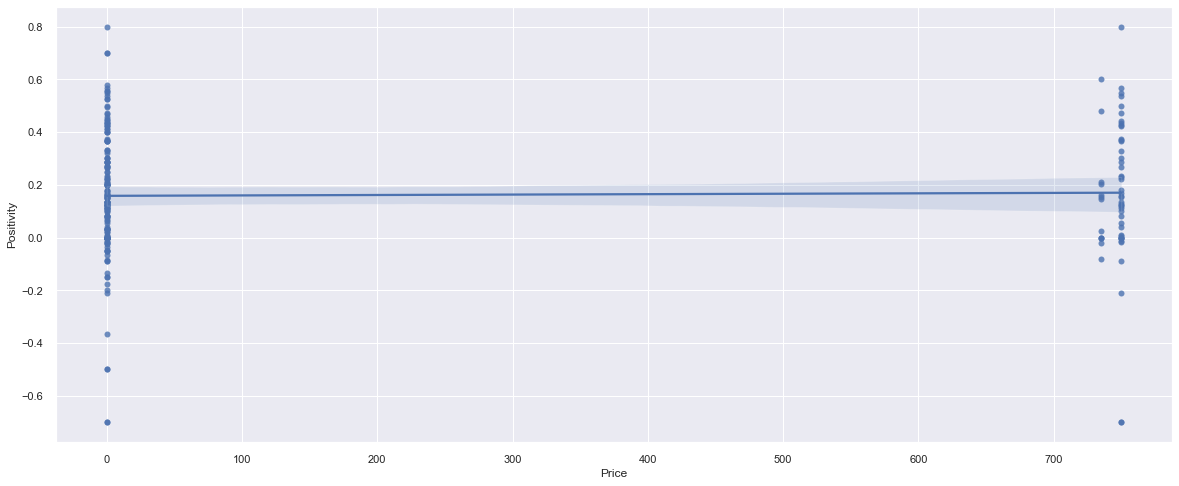

In [190]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=scre)

<AxesSubplot:xlabel='Subjectivity', ylabel='Positivity'>

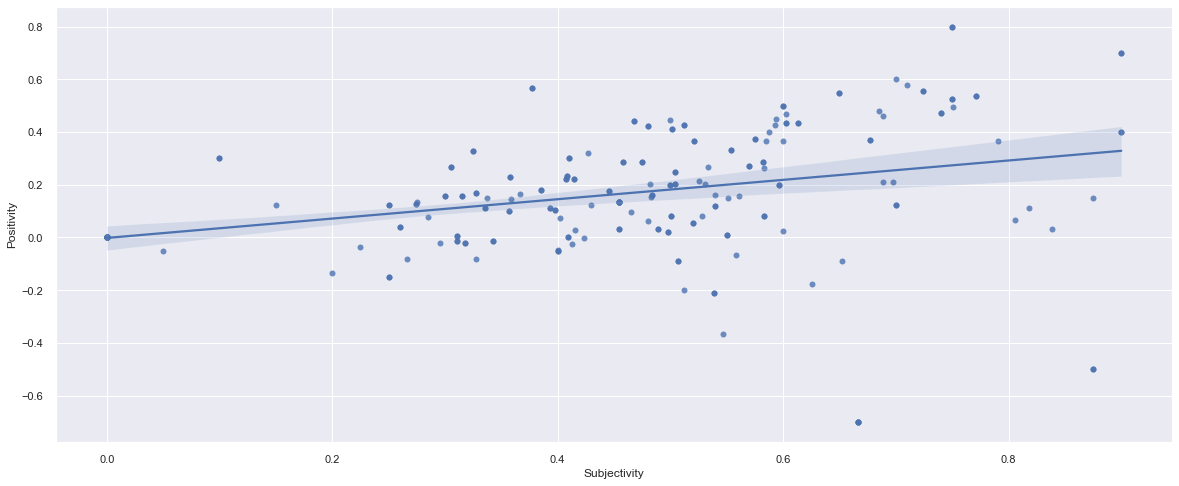

In [191]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=scre)

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/3442315091.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


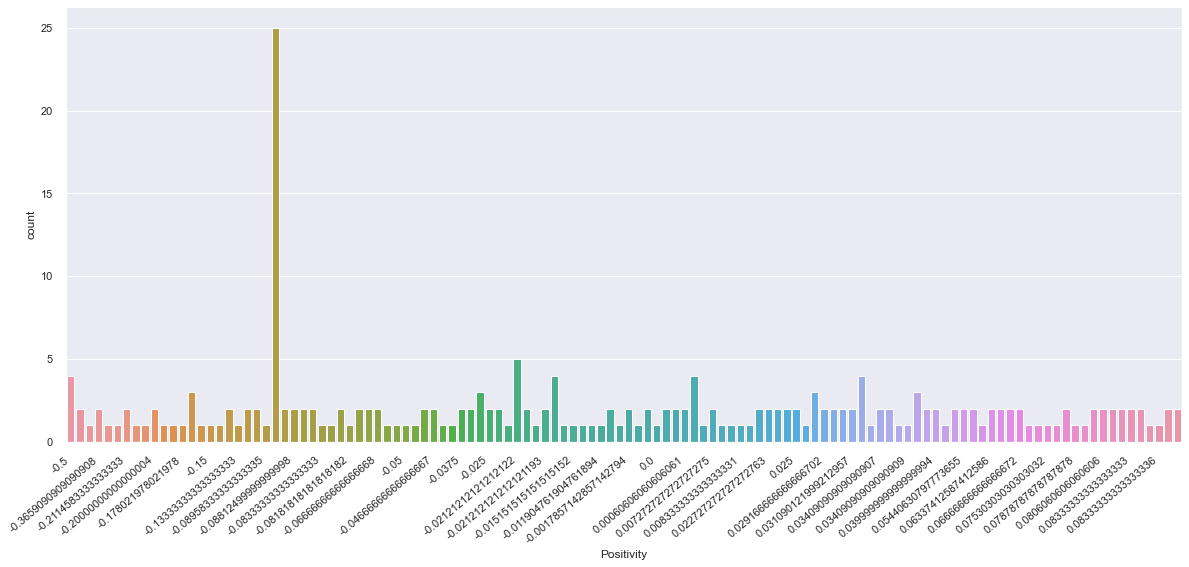

In [192]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(scre['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/3186739303.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


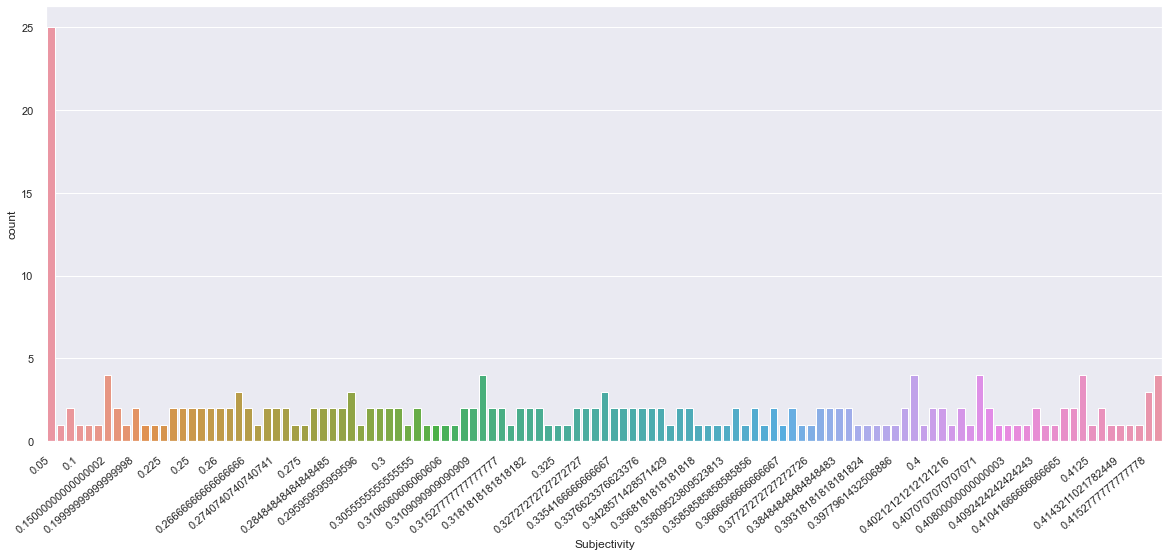

In [193]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(scre['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 7.49990000e+02,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 7.49990000e+02,  1.00000000e+00, -7.00000000e-01,
         6.66666667e-01],
       [ 7.49990000e+02,  5.00000000e+00,  1.12121212e-01,
         3.93181818e-01],
       [ 7.49990000e+02,  1.00000000e+00,  1.55555556e-01,
         3.15277778e-01],
       [ 7.49990000e+02,  3.00000000e+00,  8.33333333e-03,
         5.50000000e-01],
       [ 7.49990000e+02,  5.00000000e+00,  1.25000000e-01,
         2.50000000e-01],
       [ 7.49990000e+02,  1.00000000e+00, -8.81250000e-02,
         5.06875000e-01],
       [ 7.49990000e+02,  3.00000000e+00,  4.34098639e-01,
         6.02947846e-01],
       [ 7.49990000e+02,  5.00000000e+00,  4.22857143e-01,
         4.80000000e-01],
       [ 7.49990000e+02,  1.00000000e+00,  9.98579545e-02,
         3.56818182e-01],
       [ 7.49990000e+02,  1.00000000e+00,  5.44063080e-02,
         5.20470006e-01],
       [ 7.49990000e+02,  1.00000000e+00,  0.00000000e+00,
      

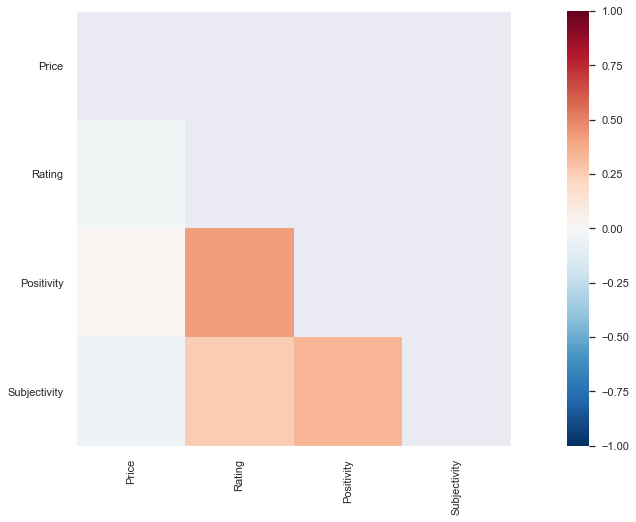

In [194]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = scre[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data


In [195]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(scre['Rating'],scre['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(scre['Subjectivity'],scre['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(scre['Rating'],scre['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.419
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.338
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.255
Subjectivity/Rating Probability is: 0.0


The screen of the iphone was found to have a slightly increased positivity and ubjectivity scores. It appeared that the positivity scores had multiple drops but in more recent years, the positivity of these reviews have increased.

As price increased, positivity had no decrease nor decrease. It was nearly completely steady.

As subjectivity increased, positivity slightly increased along with it. This indicated that the more opinionated people were about the appearance, the more positive those opinions were, albeit not as much as that of other aspects.

The histogram about appearance was very much uniform for positivity and subjectivity with a large emergence at 0. This could very well be because we could not parse through reviews of other languages. This same explanation could hold true for subjectivity too.

Correlation testing found some slight to moderately strong links, most intensely so between positivity and subjectivity at .338. The links between rating and positivity scored .419. Finally, subjectivity and rating scored .255. All three had an associated probability of  0.0.

### Merging the dataframes together again.

In [196]:
#Merging the dataframes in one..
a_df = [appe, batt, came, spee, stor, soft, musi, scre]
a_df = pd.concat(a_df, axis=0, join='inner').reset_index()

In [197]:
a_df.sample(n=2)

index      Item #  Brand  \
499   1165  B07D6TQP6F  Apple   
213    849  B07D6TQP6F  Apple   

                                                  Model  Reviews  Price  \
499  Apple iPhone X, 256GB, Silver - For AT&T (Renewed)      436    0.0   
213  Apple iPhone X, 256GB, Silver - For AT&T (Renewed)      436    0.0   

     Rating       Date  Verified  \
499       1 2019-04-16      True   
213       3 2019-07-25      True   

                                                                                         Review Title  \
499                                        Phone is NOT unlocked for CDMA carriers (Sprint, T-Mobile)   
213  Camera shutter sound won't turn off, even when the phone is muted and all sound settings are off   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Review  \
499                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  phone advertis fulli unlock receiv devic gsm wait 5 day phone receiv devic compat network super disappoint   
213  phone arriv right time great condit charger includ work great howev think phone must korea japan appar illeg take digit photo without audibl shutter click absolut way turn sound even phone mute volum turn way happen everi major applic use camera art student take ton pictur camera primari reason got iphon x took multipl store told either return phone jailbreak rewrit line code affect featur jailbreak void warranti servic appl offer return big hiccup work around take pictur wed librari quiet set ideal make sure countri origin taken consider sell someon product go major featur differ tldr nice phone great condit good price came time particular phone unus anyon like take pictur   

     Helpful                                     Score  Positivity  \
499      1.0  (0.3333333333333333, 0.6666666666666666)    0.333333   
213      7.0  (0.4340986394557823, 0.6029478458049887)    0.434099   

     Subjectivity    Topic  
499      0.666667  Storage  
213      0.602948   Camera

In [198]:
a_df.describe()

index     Reviews       Price      Rating     Helpful  \
count   862.000000  862.000000  862.000000  862.000000  862.000000   
mean    921.426914  327.236659  180.259084    3.402552   19.105568   
std     550.841846  126.560034  319.834022    1.690760   46.090420   
min       0.000000    1.000000    0.000000    1.000000    1.000000   
25%     385.000000  198.000000    0.000000    1.000000    1.000000   
50%     906.000000  436.000000    0.000000    4.000000    3.000000   
75%    1406.750000  436.000000    0.000000    5.000000   11.000000   
max    1790.000000  442.000000  749.990000    5.000000  436.000000   

       Positivity  Subjectivity  
count  862.000000    862.000000  
mean     0.169008      0.454013  
std      0.231707      0.205767  
min     -1.000000      0.000000  
25%      0.024315      0.352110  
50%      0.151299      0.458117  
75%      0.300000      0.582274  
max      1.000000      1.000000

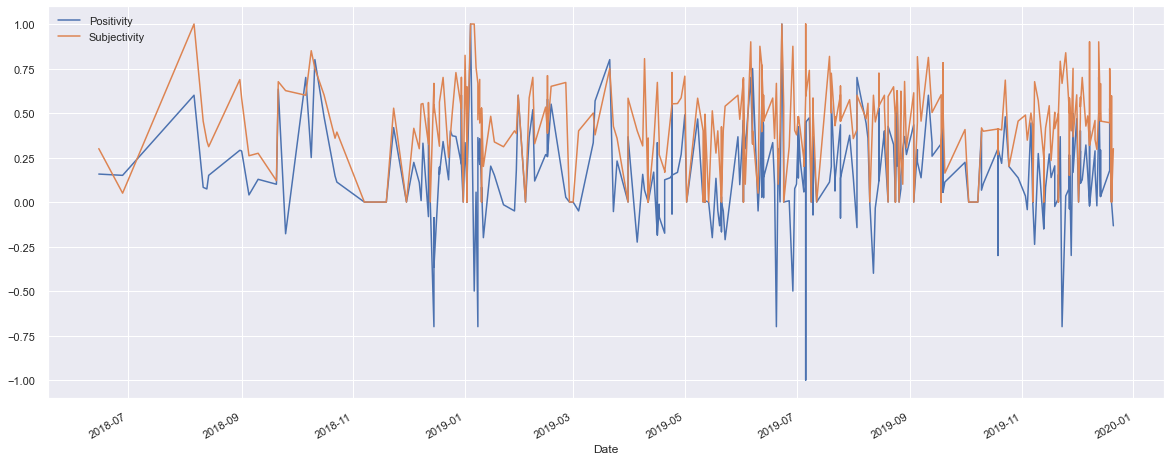

In [199]:
#Time series info
a_df_ts = a_df.plot(x='Date', y=ylist)

<AxesSubplot:xlabel='Date', ylabel='Positivity'>

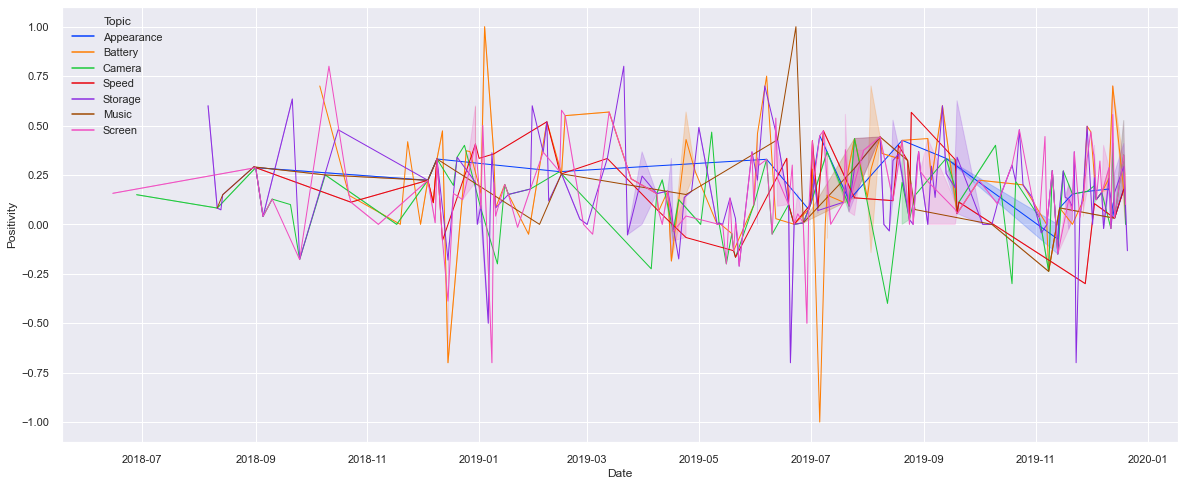

In [200]:
#Time series info
# ylist2 = ['appe','batte','soft','came','musi','spee', 'scre', 'stor']
# a_df_ts = a_df.plot(x='Date', y=ylist2)
sns.lineplot(data=a_df,x='Date',y="Positivity",hue="Topic",palette='bright',lw=1)

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

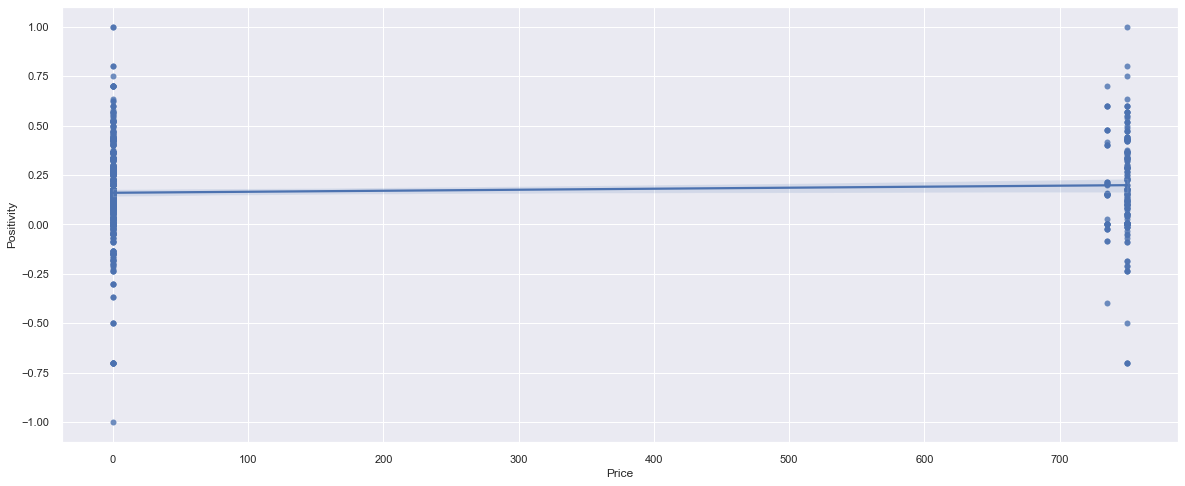

In [201]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Price', ylabel='Subjectivity'>

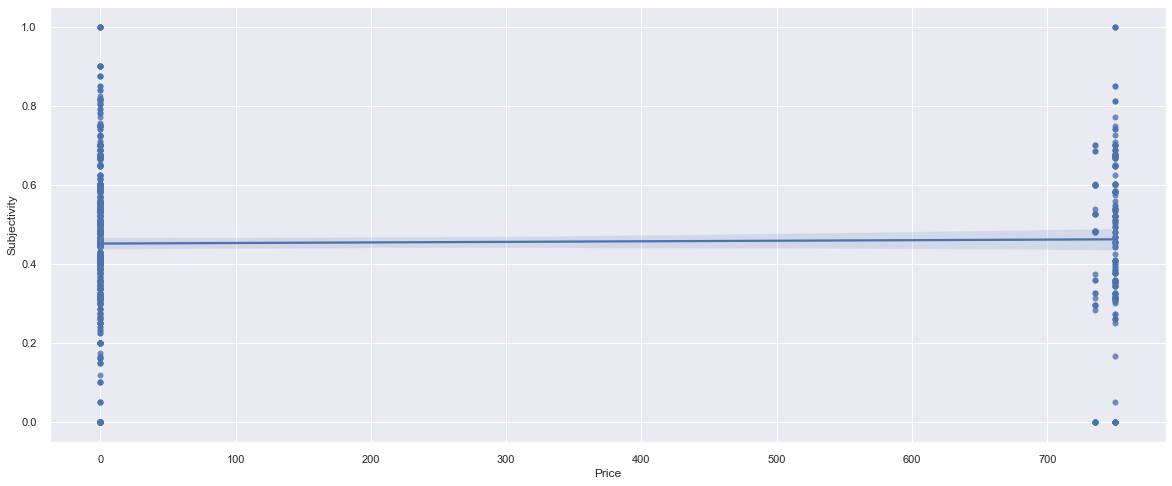

In [202]:
#Linear regression
sns.regplot(x='Price',y="Subjectivity",data=a_df)

<AxesSubplot:xlabel='Subjectivity', ylabel='Positivity'>

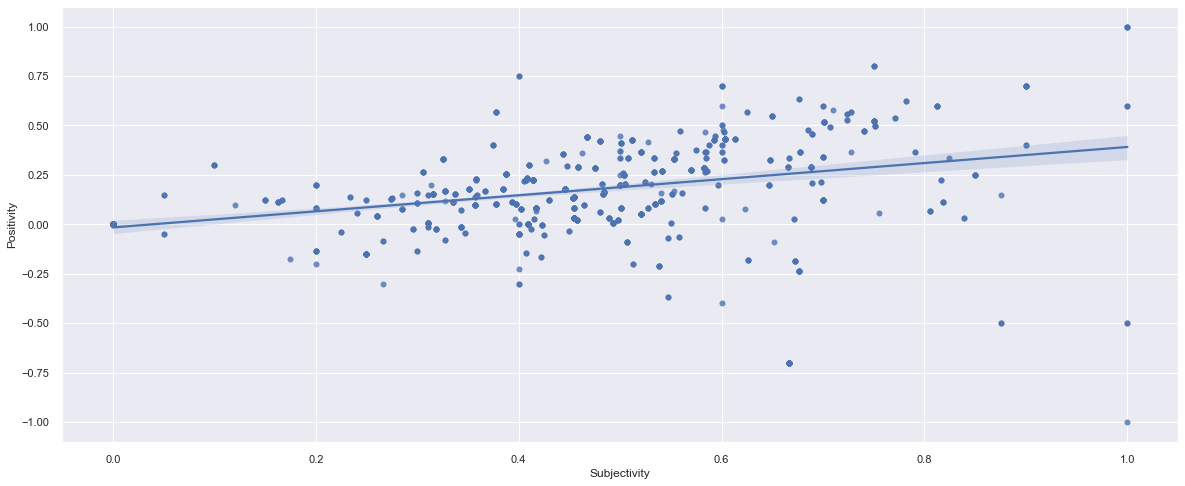

In [203]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=a_df)

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1237994794.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


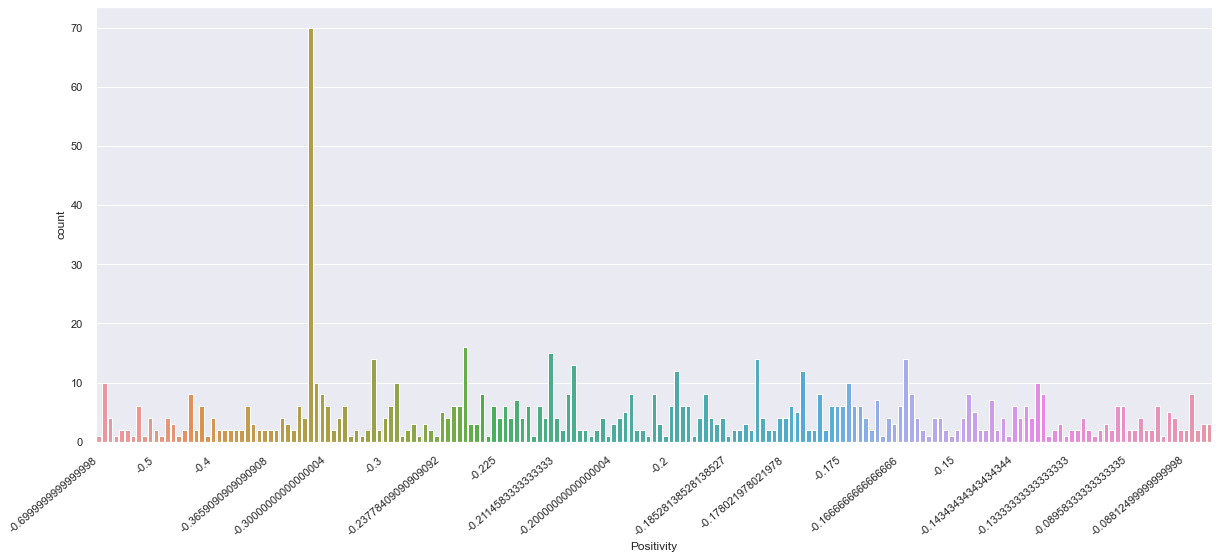

In [204]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(a_df['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

C:\Users\JAGADE~1\AppData\Local\Temp/ipykernel_29280/1876373198.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


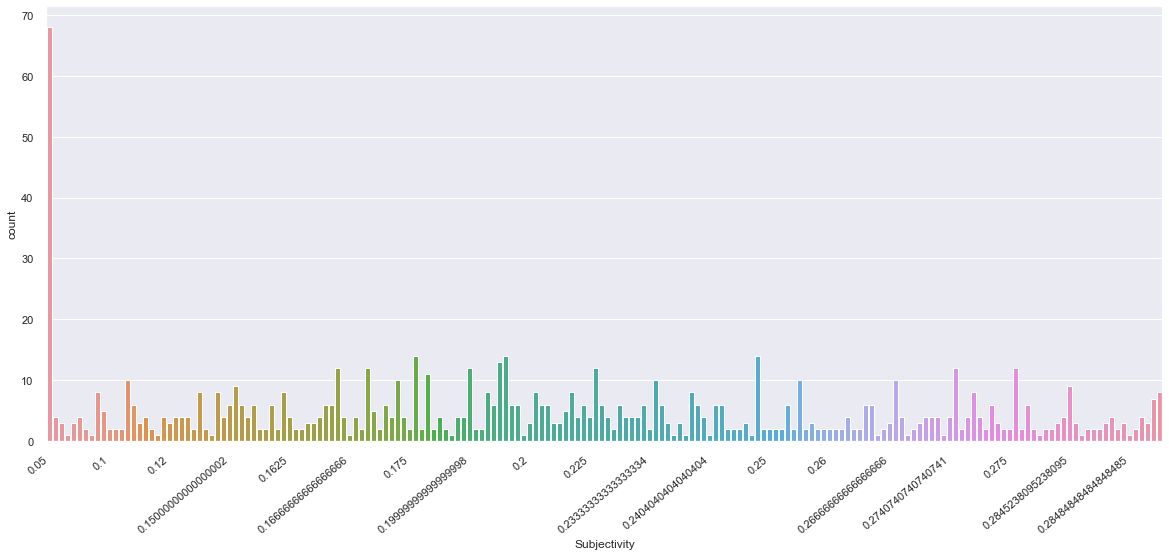

In [205]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(a_df['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 7.49990000e+02,  4.00000000e+00,  3.29166667e-01,
         3.25000000e-01],
       [ 7.49990000e+02,  4.00000000e+00,  1.79004329e-01,
         3.50649351e-01],
       [ 7.49990000e+02,  4.00000000e+00,  2.86964028e-01,
         5.82274273e-01],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e-01,
         5.96296296e-01],
       [ 0.00000000e+00,  5.00000000e+00,  5.56565657e-01,
         7.23737374e-01],
       [ 0.00000000e+00,  1.00000000e+00, -2.12121212e-02,
         3.18181818e-01]])

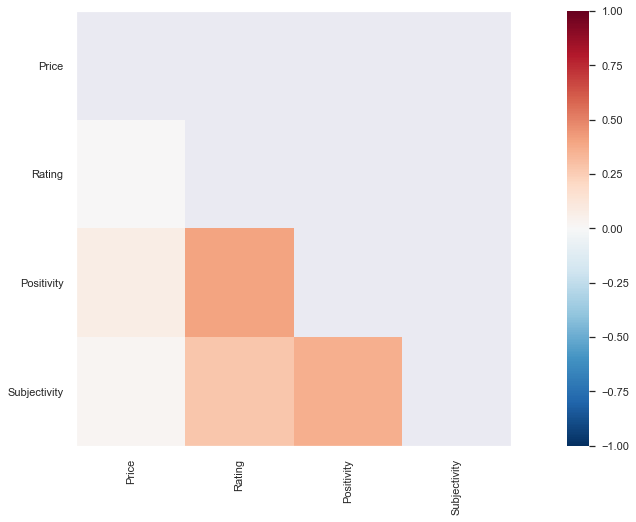

In [206]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = a_df[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data


In [207]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(a_df['Rating'],a_df['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(a_df['Subjectivity'],a_df['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(a_df['Rating'],a_df['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.405
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.362
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.281
Subjectivity/Rating Probability is: 0.0


<AxesSubplot:xlabel='Topic', ylabel='Positivity'>

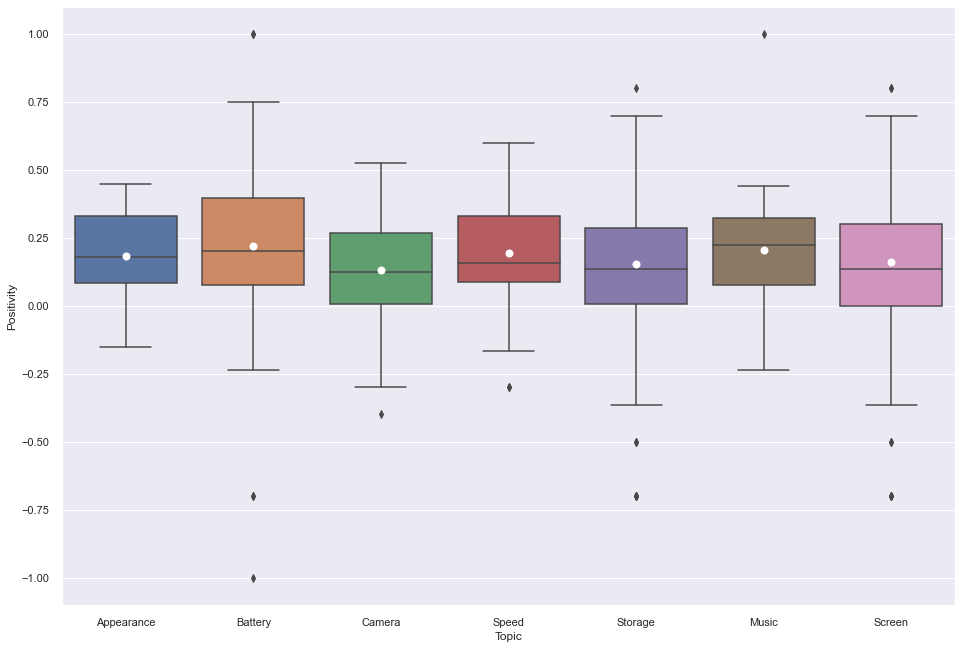

In [208]:
sns.set(rc={'figure.figsize':(16,11)})
sns.boxplot(x="Topic", y='Positivity', data=a_df, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"})

In [209]:
name = ['Appearance','Battery','Camera','Speed','Storage','Software','Music','Screen']
topic = [appe,batt,came,spee,stor,soft,musi,scre]
for x, y in zip(topic,name):
    print ("The Positivity Mean of "+ y + " is: "+ str(round(x['Positivity'].mean(), 3)))

The Positivity Mean of Appearance is: 0.183
The Positivity Mean of Battery is: 0.219
The Positivity Mean of Camera is: 0.132
The Positivity Mean of Speed is: 0.194
The Positivity Mean of Storage is: 0.162
The Positivity Mean of Software is: 0.152
The Positivity Mean of Music is: 0.204
The Positivity Mean of Screen is: 0.161


The merged dataframe of the Apple iPhone was found to have a slightly increased positivity and ubjectivity scores. It appeared that the positivity scores had multiple drops, but has recovered since.

As price increased, positivity had no decrease nor decrease. It was nearly completely steady.

As subjectivity increased, positivity slightly increased along with it. This indicated that the more opinionated people were about the appearance, the more positive those opinions were, albeit not as much as that of other aspects.

The histogram about appearance was very much uniform for positivity and subjectivity with a large emergence at 0. This could very well be because we could not parse through reviews of other languages. This same explanation could hold true for subjectivity too.


when comparing all aspects using box and whisker plots, the speed aspect is rated highest followed by, in order from highest to lowest, battery, appearance, music, storage, screen, software and finally camera with the lowest rated aspect.

### Categorical transformation and hyperparameter tuning

In [210]:
#Get dummies categorical values binary
categorical = ['Topic','Item #']
a_df_cat = pd.get_dummies(a_df[categorical],drop_first=True)
a_df_cat.head()

Topic_Battery  Topic_Camera  Topic_Music  Topic_Screen  Topic_Speed  \
0              0             0            0             0            0   
1              0             0            0             0            0   
2              0             0            0             0            0   
3              0             0            0             0            0   
4              0             0            0             0            0   

   Topic_Storage  Item #_B077578W38  Item #_B0775H5HJW  Item #_B07D6TQP6F  \
0              0                  0                  0                  0   
1              0                  0                  0                  0   
2              0                  0                  0                  0   
3              0                  1                  0                  0   
4              0                  1                  0                  0   

   Item #_B07KFNRQ5S  Item #_B07KKL5KGG  Item #_B07P6Y8L3F  Item #_B07RDMLR4V  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Item #_B07RKYQSRB  Item #_B07RT1X4FJ  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0

In [211]:
#Listing the columns
list(a_df_cat.columns)

['Topic_Battery',
 'Topic_Camera',
 'Topic_Music',
 'Topic_Screen',
 'Topic_Speed',
 'Topic_Storage',
 'Item #_B077578W38',
 'Item #_B0775H5HJW',
 'Item #_B07D6TQP6F',
 'Item #_B07KFNRQ5S',
 'Item #_B07KKL5KGG',
 'Item #_B07P6Y8L3F',
 'Item #_B07RDMLR4V',
 'Item #_B07RKYQSRB',
 'Item #_B07RT1X4FJ']

In [212]:
#Getting the list from columns
a_df[list(a_df_cat.columns)] = a_df_cat[list(a_df_cat.columns)]

In [213]:
#Reviewing the new dataset
a_df.sample(n=2)

index      Item #  Brand  \
122   1219  B07KFNRQ5S  Apple   
519   1261  B07KFNRQ5S  Apple   

                                                                 Model  \
122  Apple iPhone Xs Max, 256GB, Space Gray - Fully Unlocked (Renewed)   
519  Apple iPhone Xs Max, 256GB, Space Gray - Fully Unlocked (Renewed)   

     Reviews  Price  Rating       Date  Verified  \
122      230    0.0       1 2019-12-04      True   
519      230    0.0       5 2019-08-10      True   

                                              Review Title  ... Topic_Storage  \
122  Your money spend it how you want but don’t do it here  ...             0   
519                                    Excelente inversión  ...             1   

     Item #_B077578W38 Item #_B0775H5HJW  Item #_B07D6TQP6F  \
122                  0                 0                  0   
519                  0                 0                  0   

     Item #_B07KFNRQ5S Item #_B07KKL5KGG  Item #_B07P6Y8L3F  \
122                  1                 0                  0   
519                  1                 0                  0   

     Item #_B07RDMLR4V  Item #_B07RKYQSRB  Item #_B07RT1X4FJ  
122                  0                  0                  0  
519                  0                  0                  0  

[2 rows x 31 columns]

In [214]:
#Cleaning the new datasets of columns we no longer need.
del a_df['Item #']
del a_df['Model']
del a_df['Review']
del a_df['Topic']
del a_df['index']
del a_df['Date']
a_df.sample(n=2)

Brand  Reviews   Price  Rating  Verified      Review Title  Helpful  \
704  Apple      442    0.00       2      True  Do Not Recommend      2.0   
658  Apple      436  749.99       4      True              GOOD      4.0   

                         Score  Positivity  Subjectivity  ...  Topic_Storage  \
704  (0.3666666666666667, 0.6)    0.366667           0.6  ...              0   
658                 (0.0, 0.0)    0.000000           0.0  ...              0   

     Item #_B077578W38  Item #_B0775H5HJW  Item #_B07D6TQP6F  \
704                  1                  0                  0   
658                  0                  0                  0   

     Item #_B07KFNRQ5S  Item #_B07KKL5KGG  Item #_B07P6Y8L3F  \
704                  0                  0                  0   
658                  0                  0                  0   

     Item #_B07RDMLR4V  Item #_B07RKYQSRB  Item #_B07RT1X4FJ  
704                  0                  0                  0  
658                  0                  0                  0  

[2 rows x 25 columns]

In [215]:
del a_df['Score']
a_df['Price'] = a_df['Price']/a_df['Price'].max()
a_df['Rating'] = a_df['Rating']/a_df['Rating'].max()
a_df.head()

Brand  Reviews  Price  Rating  Verified  \
0  Apple      436    1.0     0.8      True   
1  Apple      436    1.0     0.8      True   
2  Apple      436    1.0     0.8     False   
3  Apple      442    0.0     1.0      True   
4  Apple      442    0.0     0.2      True   

                                                        Review Title  Helpful  \
0                                                               Good      1.0   
1                                   Not perfect but worth the price.      1.0   
2  The Cell Phone Equivalent of a Concept Car, for Better and Worse.     10.0   
3                          So your’re not sure? Be sure. Here’s why.     96.0   
4                                                       No Promises!      7.0   

   Positivity  Subjectivity  Topic_Battery  ...  Topic_Storage  \
0    0.329167      0.325000              0  ...              0   
1    0.179004      0.350649              0  ...              0   
2    0.286964      0.582274              0  ...              0   
3    0.266667      0.533333              0  ...              0   
4    0.075303      0.402121              0  ...              0   

   Item #_B077578W38  Item #_B0775H5HJW  Item #_B07D6TQP6F  Item #_B07KFNRQ5S  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  1                  0                  0                  0   
4                  1                  0                  0                  0   

   Item #_B07KKL5KGG  Item #_B07P6Y8L3F  Item #_B07RDMLR4V  Item #_B07RKYQSRB  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Item #_B07RT1X4FJ  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 24 columns]

In [216]:
#Creating a list and looping through to format.
a_df_list = list(a_df_cat.columns)+['Price',"Rating",'Subjectivity']

for x in a_df_list:
    x = 'a_df["'+x+'"]'

In [217]:
#Creating a linear regression and conerting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[a_df_list], a_df["Positivity"])
coef = regr.coef_.tolist()

In [218]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+y)

Topic_Battery: 0.0008700858977376389
Topic_Camera: -0.04526363276287213
Topic_Music: -0.0007021709941874427
Topic_Screen: -0.019221724181984246
Topic_Speed: -0.042917452157588735
Topic_Storage: -0.0306963845095348
Item #_B077578W38: -7987242714661.004
Item #_B0775H5HJW: -159640486263.5223
Item #_B07D6TQP6F: -7987242714660.91
Item #_B07KFNRQ5S: -7987242714660.963
Item #_B07KKL5KGG: -7987242714660.965
Item #_B07P6Y8L3F: -7987242714661.011
Item #_B07RDMLR4V: -7987242714660.95
Item #_B07RKYQSRB: -7987242714660.898
Item #_B07RT1X4FJ: -7987242714660.953
Price: -7987242714660.92
Rating: 0.22775932561265272
Subjectivity: 0.28989163486185165


In [219]:
max_val=max(coef)
min(coef)

-7987242714661.011

In [220]:
important_features = []

for coe,f_name in zip(coef,a_df_list):
    if abs(coe) > max_val/1000:
        important_features.append(f_name)
        
print(important_features)

['Topic_Battery', 'Topic_Camera', 'Topic_Music', 'Topic_Screen', 'Topic_Speed', 'Topic_Storage', 'Item #_B077578W38', 'Item #_B0775H5HJW', 'Item #_B07D6TQP6F', 'Item #_B07KFNRQ5S', 'Item #_B07KKL5KGG', 'Item #_B07P6Y8L3F', 'Item #_B07RDMLR4V', 'Item #_B07RKYQSRB', 'Item #_B07RT1X4FJ', 'Price', 'Rating', 'Subjectivity']


In [221]:
#Creating a linear regression and conerting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[important_features], a_df["Positivity"])
coef = regr.coef_.tolist()

In [222]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(important_features,coef):
    y=str(y)
    print(x+": "+ y)

Topic_Battery: 0.0008700858977376389
Topic_Camera: -0.04526363276287213
Topic_Music: -0.0007021709941874427
Topic_Screen: -0.019221724181984246
Topic_Speed: -0.042917452157588735
Topic_Storage: -0.0306963845095348
Item #_B077578W38: -7987242714661.004
Item #_B0775H5HJW: -159640486263.5223
Item #_B07D6TQP6F: -7987242714660.91
Item #_B07KFNRQ5S: -7987242714660.963
Item #_B07KKL5KGG: -7987242714660.965
Item #_B07P6Y8L3F: -7987242714661.011
Item #_B07RDMLR4V: -7987242714660.95
Item #_B07RKYQSRB: -7987242714660.898
Item #_B07RT1X4FJ: -7987242714660.953
Price: -7987242714660.92
Rating: 0.22775932561265272
Subjectivity: 0.28989163486185165


In [223]:
lasso_model = Lasso(alpha=.001)
lasso_model.fit(a_df[a_df_list],a_df['Positivity'])

coef = lasso_model.coef_.tolist()
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+ y)

Topic_Battery: 0.012430483147159024
Topic_Camera: -0.01848119793291892
Topic_Music: 0.0
Topic_Screen: 0.0
Topic_Speed: -0.005762941805195695
Topic_Storage: -0.0076525790250389645
Item #_B077578W38: -0.03990226847739102
Item #_B0775H5HJW: -0.0
Item #_B07D6TQP6F: 0.03180860602844577
Item #_B07KFNRQ5S: -0.0
Item #_B07KKL5KGG: -0.0
Item #_B07P6Y8L3F: -0.0
Item #_B07RDMLR4V: -0.0
Item #_B07RKYQSRB: 0.0
Item #_B07RT1X4FJ: -0.0
Price: 0.029070634424550018
Rating: 0.2223749166793043
Subjectivity: 0.2764455808018468


<AxesSubplot:xlabel='Item #_B077578W38', ylabel='Positivity'>

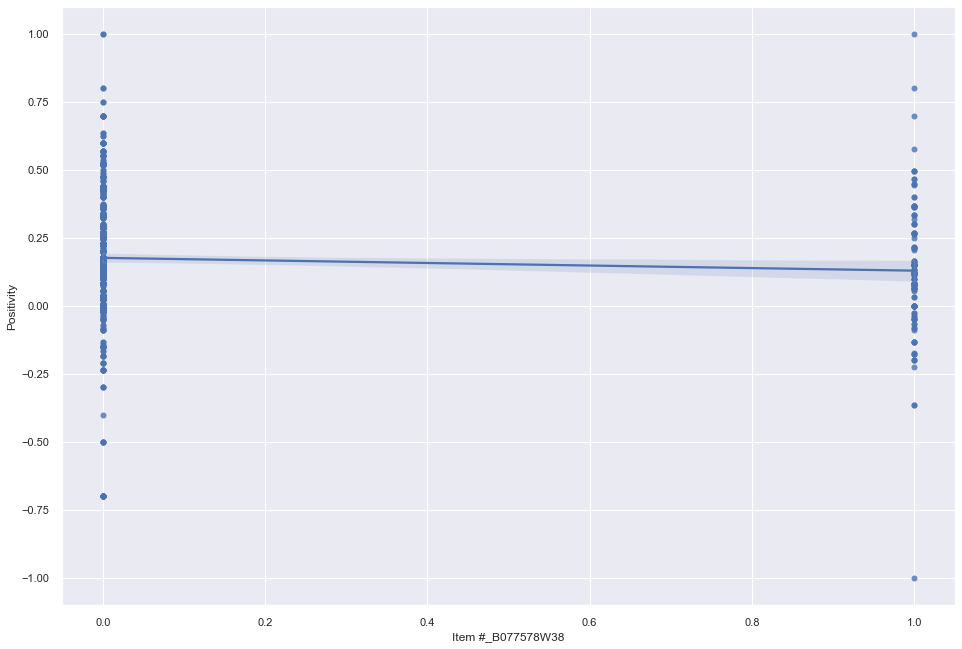

In [224]:
#Linear regression
sns.regplot(x='Item #_B077578W38',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Item #_B0775H5HJW', ylabel='Positivity'>

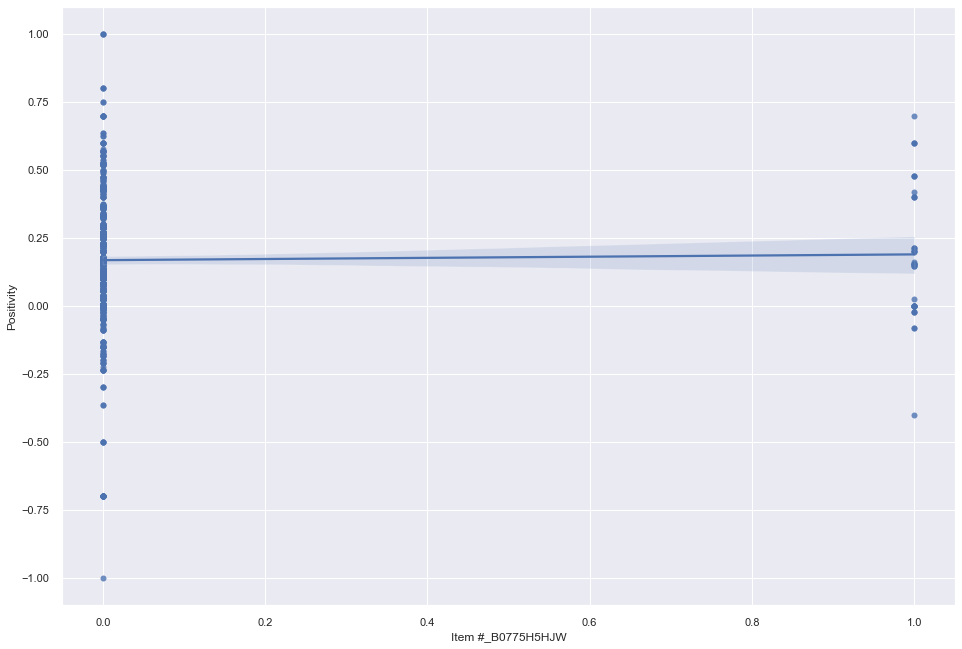

In [225]:
#Linear regression
sns.regplot(x='Item #_B0775H5HJW',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Item #_B07D6TQP6F', ylabel='Positivity'>

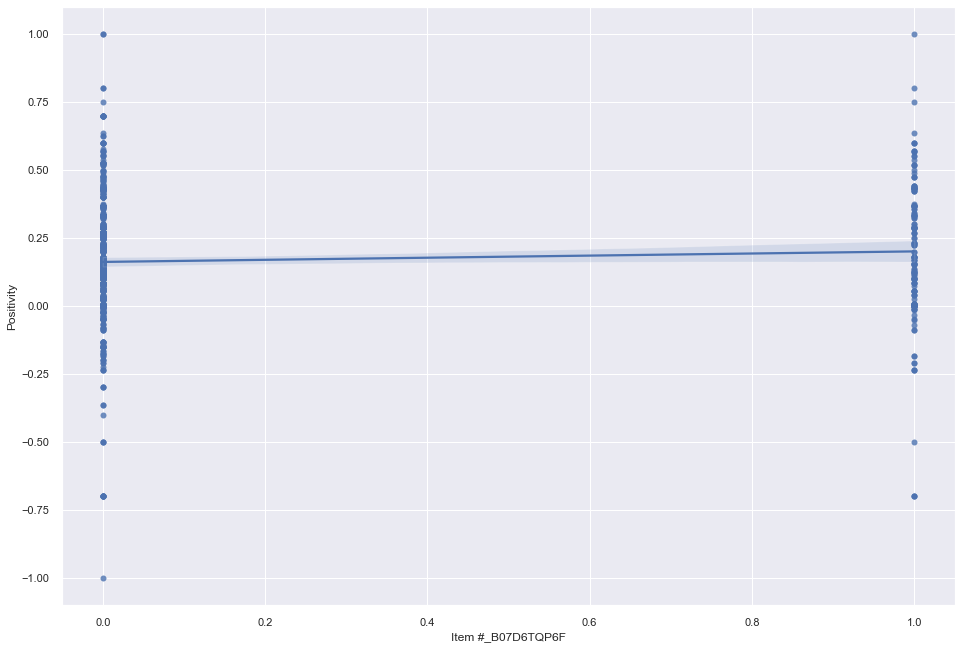

In [226]:
#Linear regression
sns.regplot(x='Item #_B07D6TQP6F',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Item #_B07KFNRQ5S', ylabel='Positivity'>

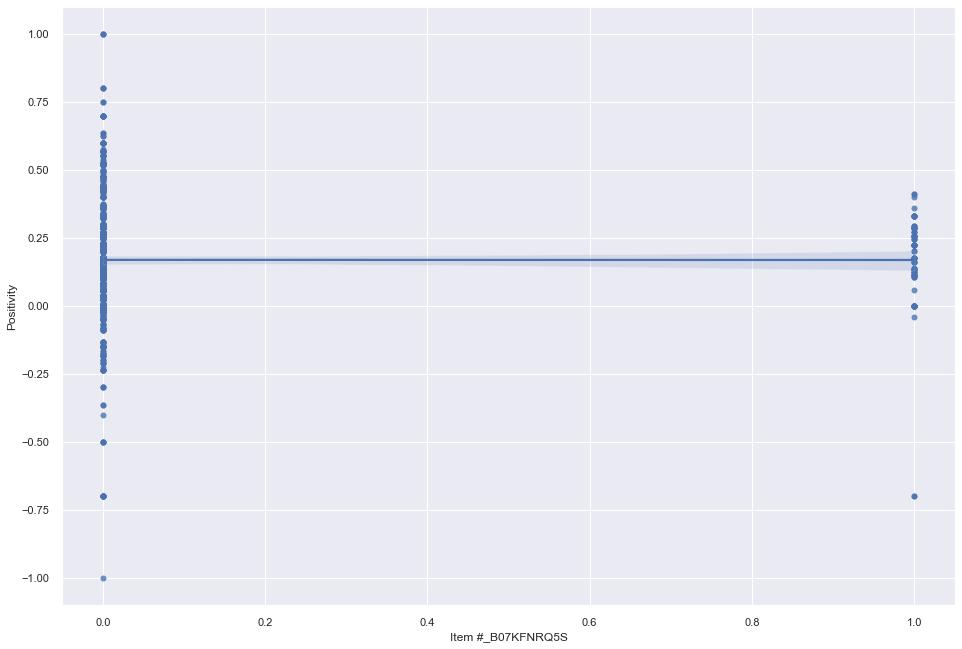

In [227]:
#Linear regression
sns.regplot(x='Item #_B07KFNRQ5S',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Item #_B07KKL5KGG', ylabel='Positivity'>

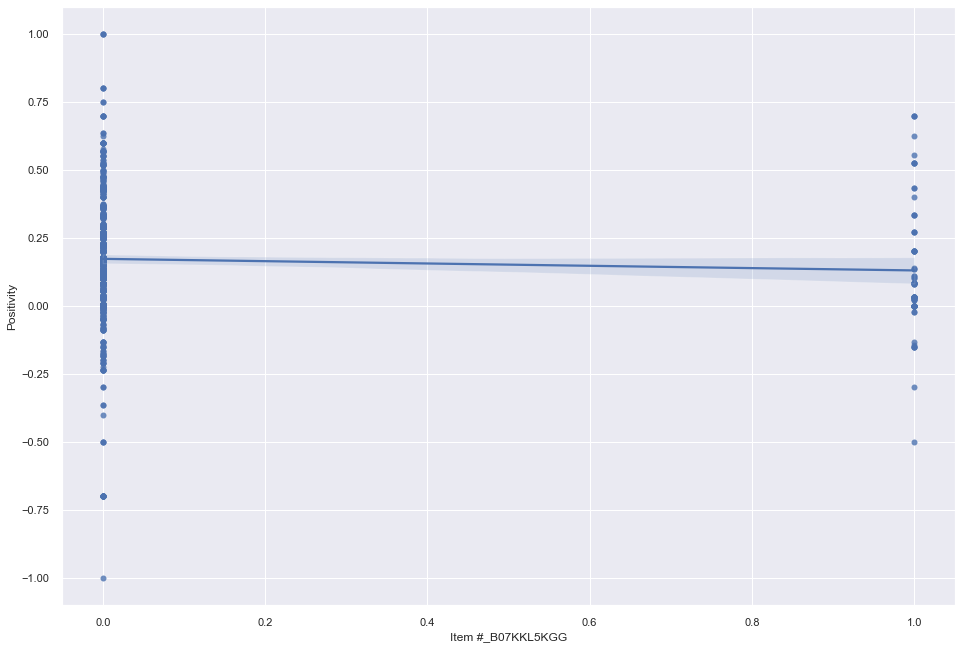

In [228]:
#Linear regression
sns.regplot(x='Item #_B07KKL5KGG',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Item #_B07P6Y8L3F', ylabel='Positivity'>

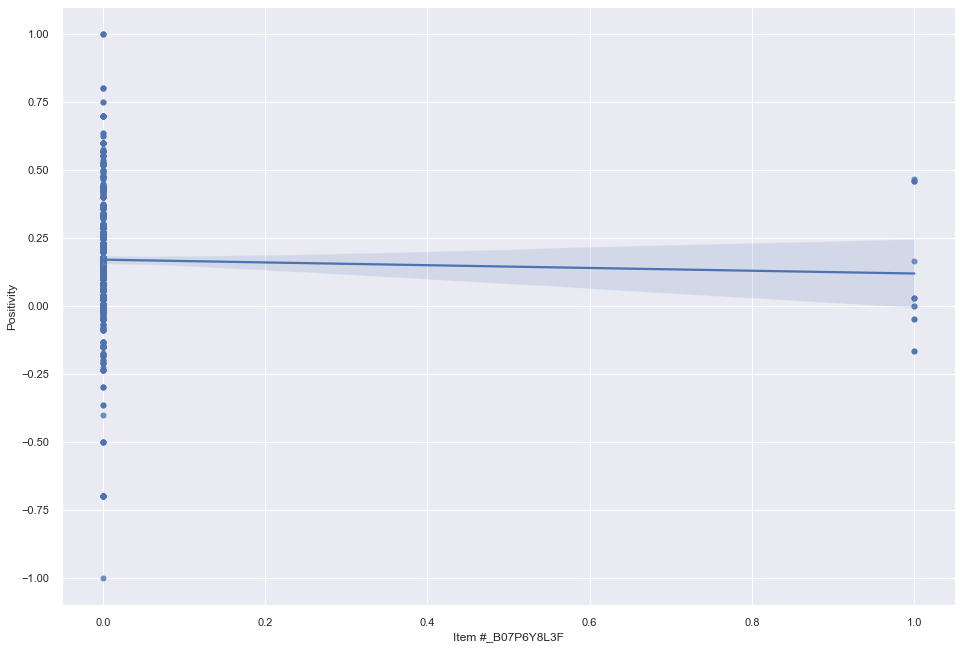

In [229]:
#Linear regression
sns.regplot(x='Item #_B07P6Y8L3F',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Item #_B07RDMLR4V', ylabel='Positivity'>

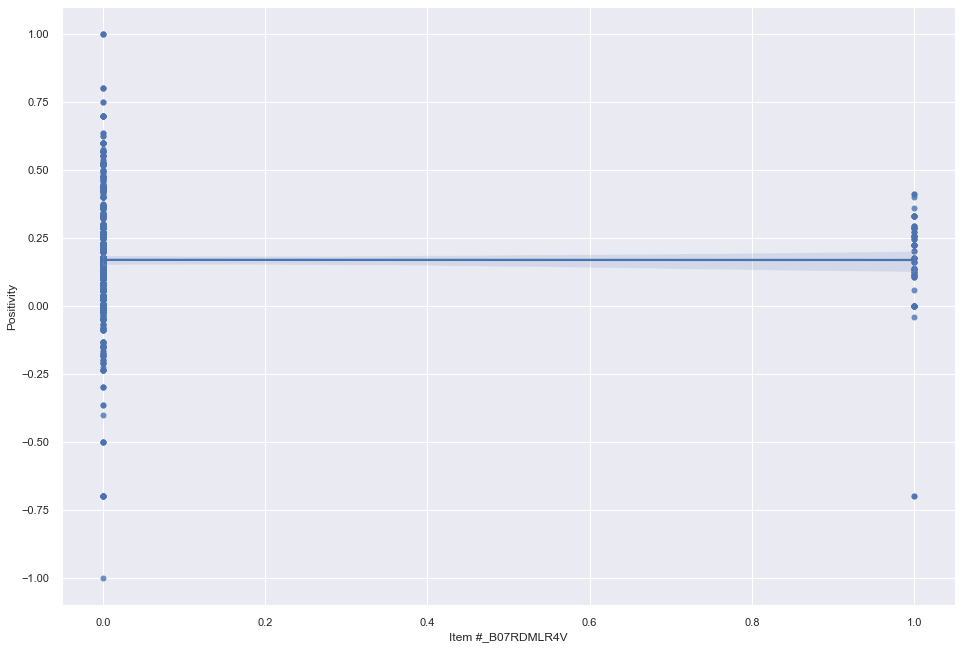

In [230]:
#Linear regression
sns.regplot(x='Item #_B07RDMLR4V',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Item #_B07RKYQSRB', ylabel='Positivity'>

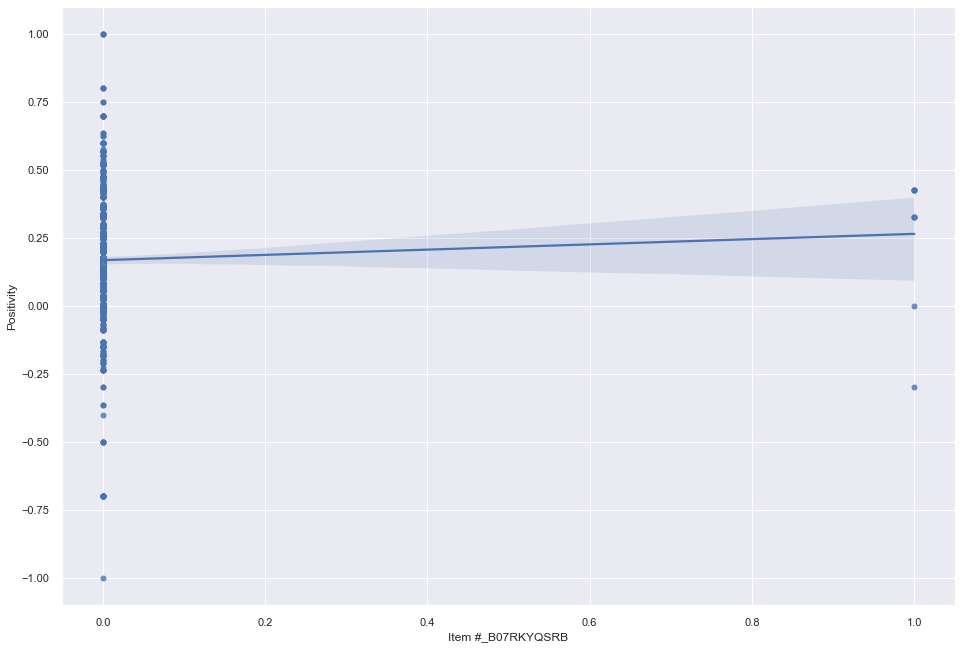

In [231]:
#Linear regression
sns.regplot(x='Item #_B07RKYQSRB',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Item #_B07RT1X4FJ', ylabel='Positivity'>

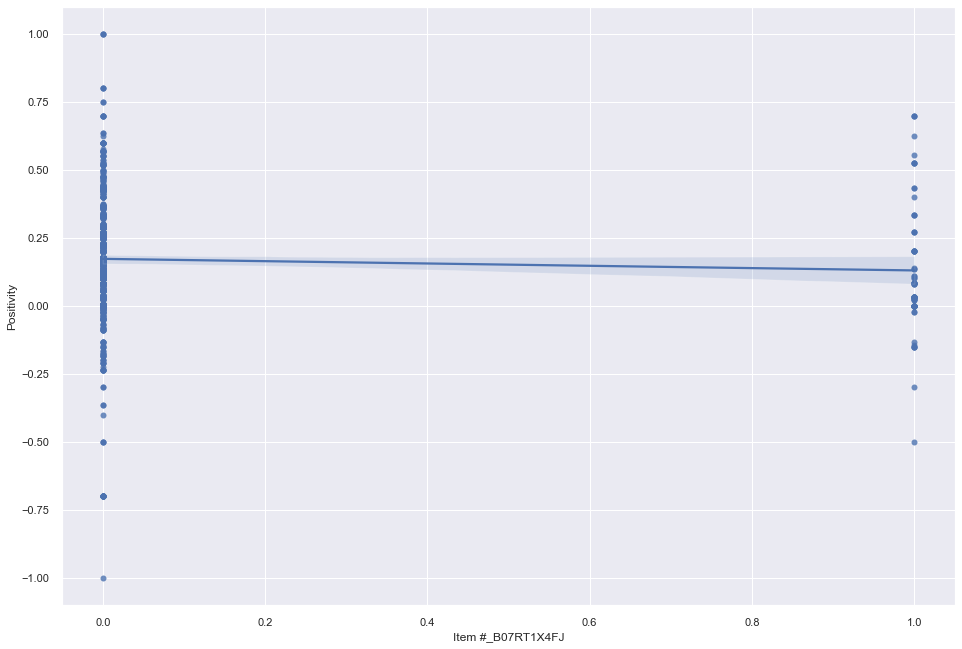

In [232]:
#Linear regression
sns.regplot(x='Item #_B07RT1X4FJ',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Topic_Storage', ylabel='Positivity'>

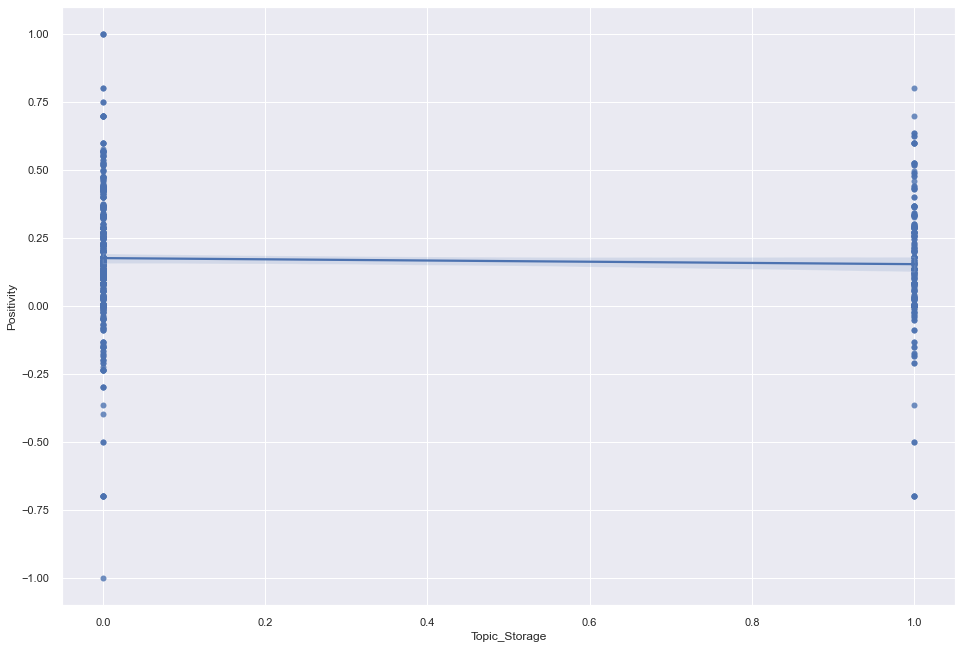

In [233]:
#Linear regression
sns.regplot(x='Topic_Storage',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Topic_Battery', ylabel='Positivity'>

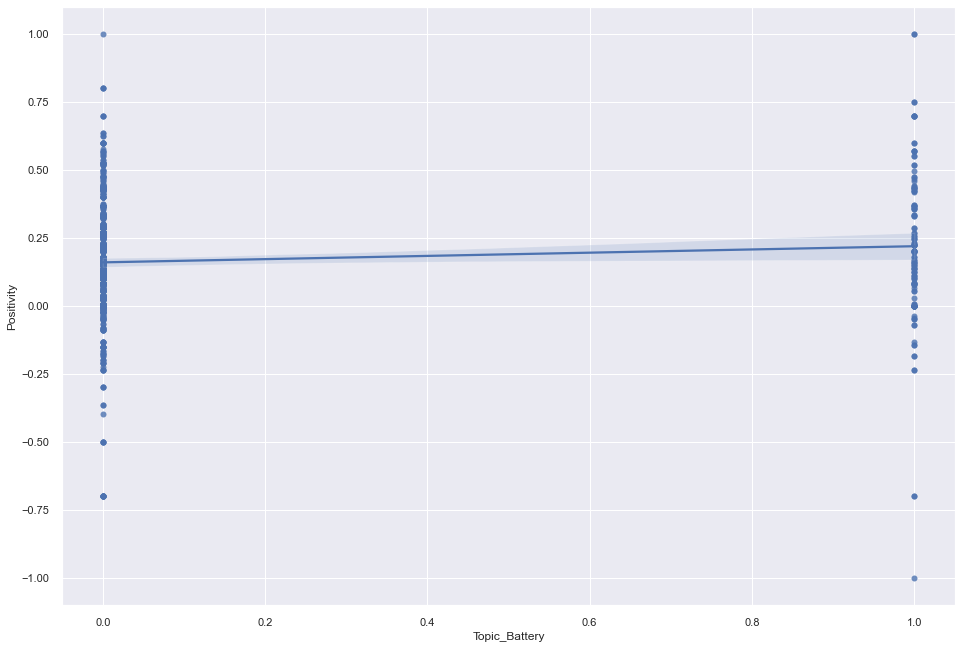

In [234]:
#Linear regression
sns.regplot(x='Topic_Battery',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Price', ylabel='Positivity'>

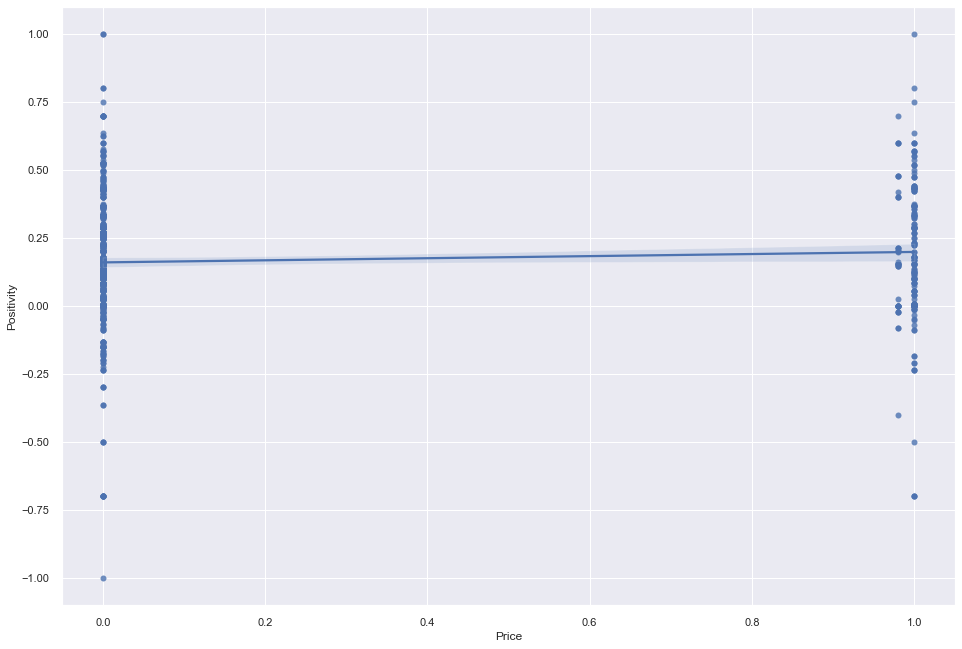

In [235]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Rating', ylabel='Positivity'>

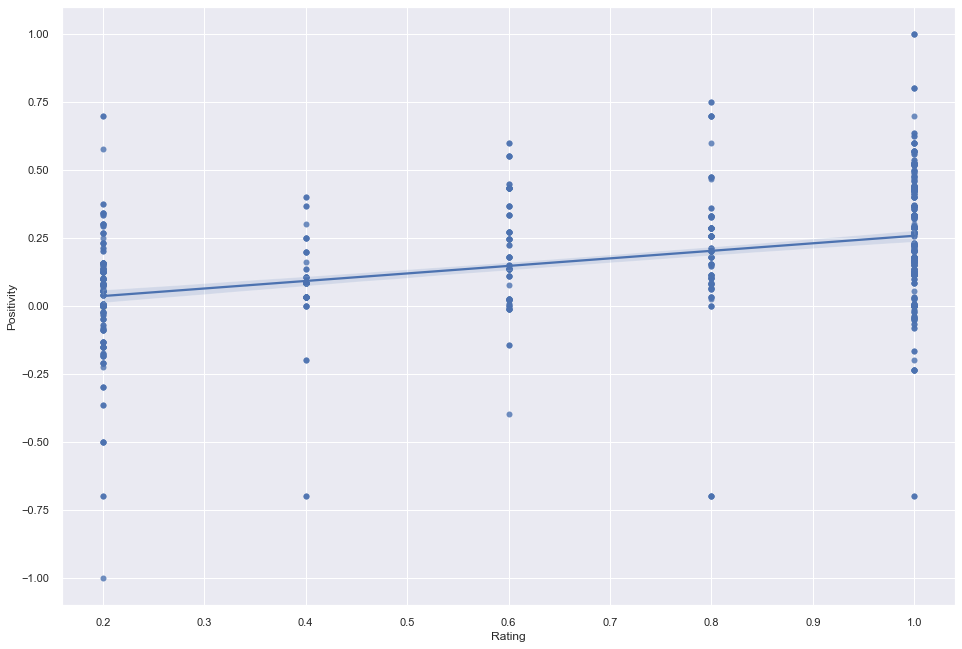

In [236]:
#Linear regression
sns.regplot(x='Rating',y="Positivity",data=a_df)

<AxesSubplot:xlabel='Subjectivity', ylabel='Positivity'>

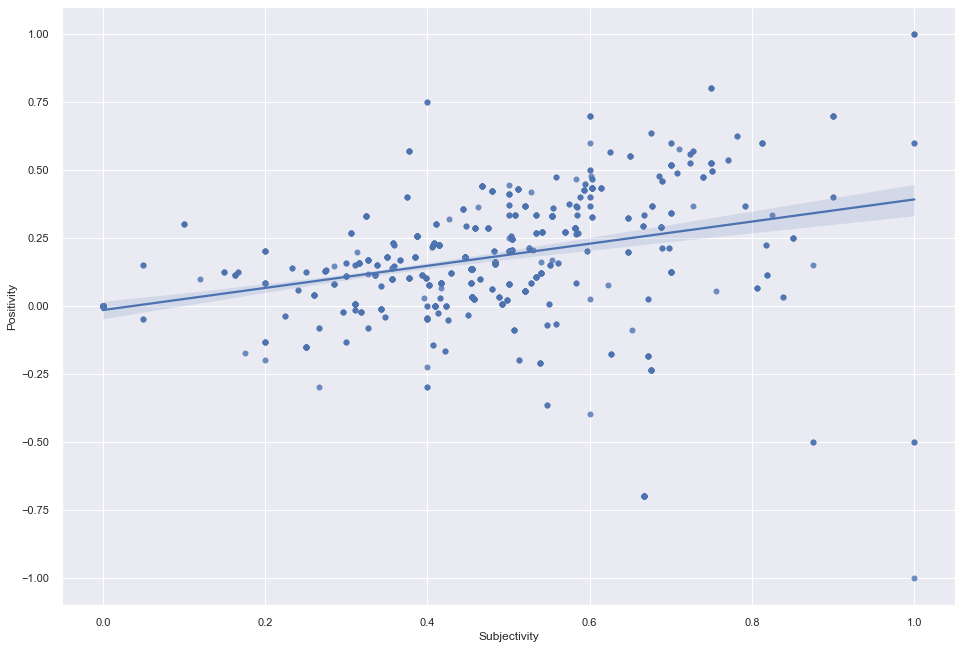

In [237]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=a_df)

In [238]:
LR = LogisticRegression(a_df_list)
LR

LogisticRegression(penalty=['Topic_Battery', 'Topic_Camera', 'Topic_Music',
                            'Topic_Screen', 'Topic_Speed', 'Topic_Storage',
                            'Item #_B077578W38', 'Item #_B0775H5HJW',
                            'Item #_B07D6TQP6F', 'Item #_B07KFNRQ5S',
                            'Item #_B07KKL5KGG', 'Item #_B07P6Y8L3F',
                            'Item #_B07RDMLR4V', 'Item #_B07RKYQSRB',
                            'Item #_B07RT1X4FJ', 'Price', 'Rating',
                            'Subjectivity'])

In this section, we used the dummies feature of Pandas to convert each row to a 1 or 0 based on if it fits that category. I created a list of all of the variables from the dummies. I then cleaned the dataframe from columns no longer used.

After that, I normalized the data by dividing the price and rating by the maximum value in that column. When the information was normalized and linear regression was completed.

After linear regression was completed, I normalized the data further by dividing the coefficients by the maximum value. At that point, I created a new list of important features where feature reduction was completed to isolate the features that were outliers and focused on the item numbers that made a difference in the rating aspect.

Finally, Lasso Regression was completed to regularize the data.

It was then at this point when linear regression was recompleted with all of the features that did not have a zero value, because it isolated all meaningful differences.

# Conclusion

The analysis on the topic of the Amazon review of the Apple iPhones was good. We found that overall, there is a modest increase over time from most topics as they increase, but an area that deserves the most amount of attention moving forward is that of the camera. However, it should be noted that within the last year of reviews, the biggest drop of review positivity scores come from both music and storage.

One fact that was consistent throughout all analysis is that almost always, an increase of subjectivity correlated with high positivity rankings. This means that if we can excite all customers about the iPhones that it would translate to higher customer satisfaction. 

This contrasts from the least popular aspect, the camera, which had a very lower average helpful rating. The scores appear to be steady as of recently, although the recent subjectivity scores from the last year appear to be positive, which could indicate that the positivity scores will increase should be steady with subjectivity. This prediction is based off a prediction rating of roughly .4, which is generally considered moderate in nature, especially given the p value of less than .001.



## End